### Developing a Multi-Class Ordinal Logistic Regression Model for 2021 Kaggle Survey Competition

###  Developed BY Keyan Ahmadi 

###  Step 1:  Data Cleaning

In [1]:
# First Loading All Important Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import scipy.stats as stats
import warnings
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn import metrics 

In [2]:
# Printing the current version of Python:
print(sys.version)

3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]


In [3]:
warnings.filterwarnings('ignore')

In [4]:
# Loading the clean_kaggle_data file into Jupyter 

# loading in the CSV file and converting it to a pandas dataframe
clean_kaggle_data = pd.read_csv('clean_kaggle_data_2021.csv', low_memory=False) 
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 400
#Printing the first 5 rows to see if the file is being read properly
clean_kaggle_data.head() 

Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   
1                                 910                        50-54   
2                                 784                        50-54   
3                                 924                        22-24   
4                                 575                        45-49   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                      India   
2                                  Indonesia   
3                                   Pakistan   
4                                     Mexico   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                  Bachelor’s degree   
2                                    Master’s degree   
3                                    Master’s degree   
4                                    Doctoral degree   

                                                  Q5  \
0  Select the title most similar to your current ...   
1                                              Other   
2                            Program/Project Manager   
3                                  Software Engineer   
4                                 Research Scientist   

                                                  Q6  \
0  For how many years have you been writing code ...   
1                                         5-10 years   
2                                          20+ years   
3                                          1-3 years   
4                                          20+ years   

                                           Q7_Part_1  \
0  What programming languages do you use on a reg...   
1                                             Python   
2                                                NaN   
3                                             Python   
4                                             Python   

                                           Q7_Part_2  \
0  What programming languages do you use on a reg...   
1                                                  R   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                           Q7_Part_3  \
0  What programming languages do you use on a reg...   
1                                                NaN   
2                                                SQL   
3                                                NaN   
4                                                NaN   

                                           Q7_Part_4  \
0  What programming languages do you use on a reg...   
1                                                NaN   
2                                                  C   
3                                                NaN   
4                                                NaN   

                                           Q7_Part_5  \
0  What programming languages do you use on a reg...   
1                                                NaN   
2                                                C++   
3                                                C++   
4                                                NaN   

                                           Q7_Part_6  \
0  What programming languages do you use on a reg...   
1                                                NaN   
2                                               Java   
3                                               Java   
4                                            

In [5]:
# Finding the amount of rows and columns in the dataframe
clean_kaggle_data.shape 

(15392, 371)

In [6]:
# Dropping the row with the question discription of the dataframe as this row provides no 
# useful inoformation to our model
clean_kaggle_data = clean_kaggle_data.iloc[1:]
clean_kaggle_data.reset_index(inplace=True,drop=True)
clean_kaggle_data.head()

Time from Start to Finish (seconds)     Q1   Q2         Q3  \
0                                 910  50-54  Man      India   
1                                 784  50-54  Man  Indonesia   
2                                 924  22-24  Man   Pakistan   
3                                 575  45-49  Man     Mexico   
4                                 781  45-49  Man      India   

                  Q4                       Q5          Q6 Q7_Part_1 Q7_Part_2  \
0  Bachelor’s degree                    Other  5-10 years    Python         R   
1    Master’s degree  Program/Project Manager   20+ years       NaN       NaN   
2    Master’s degree        Software Engineer   1-3 years    Python       NaN   
3    Doctoral degree       Research Scientist   20+ years    Python       NaN   
4    Doctoral degree                    Other   < 1 years    Python       NaN   

  Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6 Q7_Part_7 Q7_Part_8 Q7_Part_9  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       SQL         C       C++      Java       NaN       NaN       NaN   
2       NaN       NaN       C++      Java       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN         C       NaN       NaN       NaN       NaN       NaN   

  Q7_Part_10 Q7_Part_11 Q7_Part_12 Q7_OTHER      Q8 Q9_Part_1 Q9_Part_2  \
0        NaN        NaN        NaN      NaN  Python       NaN       NaN   
1        NaN        NaN        NaN      NaN  Python       NaN       NaN   
2        NaN        NaN        NaN      NaN  Python       NaN       NaN   
3        NaN        NaN        NaN      NaN  Python       NaN       NaN   
4        NaN     MATLAB        NaN      NaN  Python       NaN       NaN   

  Q9_Part_3 Q9_Part_4  Q9_Part_5   Q9_Part_6      Q9_Part_7 Q9_Part_8  \
0       NaN       NaN        NaN         NaN            NaN       NaN   
1       NaN       NaN        NaN         NaN    Notepad++         NaN   
2       NaN       NaN   PyCharm          NaN            NaN       NaN   
3       NaN       NaN        NaN    Spyder              NaN       NaN   
4       NaN       NaN        NaN    Spyder              NaN       NaN   

         Q9_Part_9 Q9_Part_10         Q9_Part_11 Q9_Part_12 Q9_OTHER  \
0    Vim / Emacs          NaN                NaN        NaN      NaN   
1              NaN        NaN   Jupyter Notebook        NaN      NaN   
2              NaN        NaN   Jupyter Notebook        NaN    Other   
3              NaN        NaN   Jupyter Notebook        NaN      NaN   
4              NaN    MATLAB    Jupyter Notebook        NaN      NaN   

          Q10_Part_1       Q10_Part_2 Q10_Part_3 Q10_Part_4 Q10_Part_5  \
0                NaN  Colab Notebooks        NaN        NaN        NaN   
1   Kaggle Notebooks  Colab Notebooks        NaN        NaN        NaN   
2   Kaggle Notebooks              NaN        NaN        NaN        NaN   
3                NaN  Colab Notebooks        NaN        NaN        NaN   
4                NaN              NaN        NaN        NaN        NaN   

  Q10_Part_6 Q10_Part_7 Q10_Part_8 Q10_Part_9 Q10_Part_10  \
0        NaN        NaN        NaN        NaN         NaN   
1        NaN        NaN        NaN        NaN         NaN   
2        NaN        NaN        NaN        NaN         NaN   
3        NaN        NaN        NaN        NaN         NaN   
4        NaN        NaN        NaN        NaN         NaN   

            Q10_Part_11 Q10_Part_12 Q10_Part_13 Q10_Part_14 Q10_Part_15  \
0                   NaN         NaN         NaN         NaN         NaN   
1                   NaN         NaN         NaN         NaN         NaN   
2                   NaN         NaN         NaN         NaN         NaN   
3                   NaN         NaN         NaN         NaN         NaN   
4  Google Cloud Datalab         NaN         NaN         NaN         NaN   

  Q10_Part_16 Q10_OTHER                                                Q11  \
0         NaN  

In [7]:
# Seeing the column names 
clean_kaggle_data.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_5', 'Q38_B_Part_6', 'Q38_B_Part_7', 'Q38_B_Part_8',
       'Q38_B_Part_9', 'Q38_B_Part_10', 'Q38_B_Part_11', 'Q38_B_OTHER',
       'Q25_Encoded', 'Q25_buckets'],
      dtype='object', length=371)

In [8]:
# Dropping the column "Time from start to Finish (seconds)" from the dataframe as this column
# Provides no useful information to our model and will only introduce noise 
clean_kaggle_data = clean_kaggle_data.drop(['Time from Start to Finish (seconds)'], axis=1)

In [9]:
# Seeing how many null values are in each column
clean_kaggle_data.isnull().sum(axis=0)

Q1                   0
Q2                   0
Q3                   0
Q4                   0
Q5                   0
Q6                   0
Q7_Part_1         2924
Q7_Part_2        11985
Q7_Part_3         8293
Q7_Part_4        13355
Q7_Part_5        12901
Q7_Part_6        12911
Q7_Part_7        12817
Q7_Part_8        15194
Q7_Part_9        15218
Q7_Part_10       13714
Q7_Part_11       13834
Q7_Part_12       15212
Q7_OTHER         13501
Q8                 961
Q9_Part_1        11863
Q9_Part_2        12345
Q9_Part_3        13047
Q9_Part_4         9784
Q9_Part_5        11204
Q9_Part_6        13146
Q9_Part_7        12741
Q9_Part_8        13822
Q9_Part_9        14193
Q9_Part_10       14286
Q9_Part_11        5927
Q9_Part_12       15101
Q9_OTHER         14507
Q10_Part_1        9940
Q10_Part_2        9719
Q10_Part_3       14648
Q10_Part_4       15258
Q10_Part_5       14377
Q10_Part_6       15281
Q10_Part_7       14757
Q10_Part_8       14801
Q10_Part_9       15135
Q10_Part_10      14125
Q10_Part_11

#### All the features that have "Part" in there name, have been one-hot-encoded, so I will replace the "NaN" entries with 0. Also I will replace the string element in each column with the number 1. It should be noted that we have to feed our model numerical data for the ML algorithms to work and thats why I will be replacing the the string with value 1.

In [10]:
pd.set_option('mode.chained_assignment', None)

Going through each survey questions (each feature)

In [11]:
#Q7:
# changing all the strings to 1 in each column for the different parts of the question
for i in range (1, 13):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q7_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q7_Part_'+str(i)].iloc[j] = 1

# Replacing all the NaN values with zero
for i in range (1, 13):
    clean_kaggle_data['Q7_Part_'+str(i)] = clean_kaggle_data['Q7_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q7_OTHER'] = clean_kaggle_data['Q7_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q7_OTHER'] == 'Other','Q7_OTHER'] = 1
clean_kaggle_data['Q7_OTHER'] = clean_kaggle_data['Q7_OTHER'].astype(str).astype(int)

In [12]:
# self Check: Seeing if the strings have been correctly converted to 1's
clean_kaggle_data['Q9_Part_1'].value_counts()

Jupyter (JupyterLab, Jupyter Notebooks, etc)     3528
Name: Q9_Part_1, dtype: int64

In [13]:
#Q9:
# changing all the strings to 1 in each column for the different parts of the question
for i in range (1, 13):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q9_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q9_Part_'+str(i)].iloc[j] = 1

# Replacing all the NaN values with zero
for i in range (1, 13):
    clean_kaggle_data['Q9_Part_'+str(i)] = clean_kaggle_data['Q9_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q9_OTHER'] = clean_kaggle_data['Q9_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q9_OTHER'] == 'Other', 'Q9_OTHER'] = 1
clean_kaggle_data['Q9_OTHER'] = clean_kaggle_data['Q9_OTHER'].astype(str).astype(int)

In [14]:
# self Check: Seeing if the strings have been correctly converted to 1's
clean_kaggle_data['Q9_Part_1'].value_counts()

0    11863
1     3528
Name: Q9_Part_1, dtype: int64

In [15]:
#Q10:
# changing all the strings to 1 in each column for the different parts of the question
for i in range (1, 17):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q10_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q10_Part_'+str(i)].iloc[j] = 1

# Replacing all the NaN values with zero
for i in range (1, 17):
    clean_kaggle_data['Q10_Part_'+str(i)] = clean_kaggle_data['Q10_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q10_OTHER'] = clean_kaggle_data['Q10_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q10_OTHER'] == 'Other','Q10_OTHER'] = 1
clean_kaggle_data['Q10_OTHER'] = clean_kaggle_data['Q10_OTHER'].astype(str).astype(int)

In [16]:
#Q12:
# changing all the strings to 1 in each column for the different parts of the question
for i in range (1, 6):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q12_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q12_Part_'+str(i)].iloc[j] = 1

# Replacing all the NaN values with zero
for i in range (1, 6):
    clean_kaggle_data['Q12_Part_'+str(i)] = clean_kaggle_data['Q12_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q12_OTHER'] = clean_kaggle_data['Q12_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q12_OTHER'] == 'Other','Q12_OTHER'] = 1
clean_kaggle_data['Q12_OTHER'] = clean_kaggle_data['Q12_OTHER'].astype(str).astype(int)

In [17]:
#Q14:
# changing all the strings to 1 in each column for the different parts of the question
for i in range (1, 12):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q14_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q14_Part_'+str(i)].iloc[j] = 1

# Replacing all the NaN values with zero    
for i in range (1, 12):
    clean_kaggle_data['Q14_Part_'+str(i)] = clean_kaggle_data['Q14_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q14_OTHER'] = clean_kaggle_data['Q14_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q14_OTHER'] == 'Other','Q14_OTHER'] = 1
clean_kaggle_data['Q14_OTHER'] = clean_kaggle_data['Q14_OTHER'].astype(str).astype(int)

In [18]:
#Q16:
for i in range (1, 18):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q16_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q16_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 18):
    clean_kaggle_data['Q16_Part_'+str(i)] = clean_kaggle_data['Q16_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q16_OTHER'] = clean_kaggle_data['Q16_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q16_OTHER'] == 'Other','Q16_OTHER'] = 1
clean_kaggle_data['Q16_OTHER'] = clean_kaggle_data['Q16_OTHER'].astype(str).astype(int)

In [19]:
#Q17:
for i in range (1, 12):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q17_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q17_Part_'+str(i)].iloc[j] = 1

for i in range (1, 12):
    clean_kaggle_data['Q17_Part_'+str(i)] = clean_kaggle_data['Q17_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q17_OTHER'] = clean_kaggle_data['Q17_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q17_OTHER'] == 'Other','Q17_OTHER'] = 1
clean_kaggle_data['Q17_OTHER'] = clean_kaggle_data['Q17_OTHER'].astype(str).astype(int)

In [20]:
#Q18:
for i in range (1, 7):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q18_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q18_Part_'+str(i)].iloc[j] = 1
    
for i in range (1, 7):
    clean_kaggle_data['Q18_Part_'+str(i)] = clean_kaggle_data['Q18_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q18_OTHER'] = clean_kaggle_data['Q18_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q18_OTHER'] == 'Other','Q18_OTHER'] = 1
clean_kaggle_data['Q18_OTHER'] = clean_kaggle_data['Q18_OTHER'].astype(str).astype(int)

In [21]:
#Q19:
for i in range (1, 6):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q19_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q19_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 6):
    clean_kaggle_data['Q19_Part_'+str(i)] = clean_kaggle_data['Q19_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q19_OTHER'] = clean_kaggle_data['Q19_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q19_OTHER'] == 'Other','Q19_OTHER'] = 1
clean_kaggle_data['Q19_OTHER'] = clean_kaggle_data['Q19_OTHER'].astype(str).astype(int)

In [22]:
#Q24:
for i in range (1, 8):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q24_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q24_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 8):
    clean_kaggle_data['Q24_Part_'+str(i)] = clean_kaggle_data['Q24_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q24_OTHER'] = clean_kaggle_data['Q24_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q24_OTHER'] == 'Other','Q24_OTHER'] = 1
clean_kaggle_data['Q24_OTHER'] = clean_kaggle_data['Q24_OTHER'].astype(str).astype(int)

In [23]:
#Q27:
for i in range (1, 12):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q27_A_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q27_A_Part_'+str(i)].iloc[j] = 1

for i in range (1, 12):
    clean_kaggle_data['Q27_A_Part_'+str(i)] = clean_kaggle_data['Q27_A_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q27_A_OTHER'] = clean_kaggle_data['Q27_A_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q27_A_OTHER'] == 'Other','Q27_A_OTHER'] = 1
clean_kaggle_data['Q27_A_OTHER'] = clean_kaggle_data['Q27_A_OTHER'].astype(str).astype(int)

In [24]:
#Q29:
for i in range (1, 5):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q29_A_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q29_A_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 5):
    clean_kaggle_data['Q29_A_Part_'+str(i)] = clean_kaggle_data['Q29_A_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q29_A_OTHER'] = clean_kaggle_data['Q29_A_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q29_A_OTHER'] == 'Other','Q29_A_OTHER'] = 1
clean_kaggle_data['Q29_A_OTHER'] = clean_kaggle_data['Q29_A_OTHER'].astype(str).astype(int)

In [25]:
#Q30:
for i in range (1, 8):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q30_A_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q30_A_Part_'+str(i)].iloc[j] = 1
    
for i in range (1, 8):
    clean_kaggle_data['Q30_A_Part_'+str(i)] = clean_kaggle_data['Q30_A_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q30_A_OTHER'] = clean_kaggle_data['Q30_A_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q30_A_OTHER'] == 'Other','Q30_A_OTHER'] = 1
clean_kaggle_data['Q30_A_OTHER'] = clean_kaggle_data['Q30_A_OTHER'].astype(str).astype(int)

In [26]:
#Q31:
for i in range (1, 10):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q31_A_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q31_A_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 10):
    clean_kaggle_data['Q31_A_Part_'+str(i)] = clean_kaggle_data['Q31_A_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q31_A_OTHER'] = clean_kaggle_data['Q31_A_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q31_A_OTHER'] == 'Other','Q31_A_OTHER'] = 1
clean_kaggle_data['Q31_A_OTHER'] = clean_kaggle_data['Q31_A_OTHER'].astype(str).astype(int)

In [27]:
#Q32:
for i in range (1, 21):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q32_A_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q32_A_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 21):
    clean_kaggle_data['Q32_A_Part_'+str(i)] = clean_kaggle_data['Q32_A_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q32_A_OTHER'] = clean_kaggle_data['Q32_A_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q32_A_OTHER'] == 'Other','Q32_A_OTHER'] = 1
clean_kaggle_data['Q32_A_OTHER'] = clean_kaggle_data['Q32_A_OTHER'].astype(str).astype(int)

In [28]:
#Q34:
for i in range (1, 17):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q34_A_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q34_A_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 17):
    clean_kaggle_data['Q34_A_Part_'+str(i)] = clean_kaggle_data['Q34_A_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q34_A_OTHER'] = clean_kaggle_data['Q34_A_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q34_A_OTHER'] == 'Other','Q34_A_OTHER'] = 1
clean_kaggle_data['Q34_A_OTHER'] = clean_kaggle_data['Q34_A_OTHER'].astype(str).astype(int)

In [29]:
#Q36:
for i in range (1, 8):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q36_A_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q36_A_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 8):
    clean_kaggle_data['Q36_A_Part_'+str(i)] = clean_kaggle_data['Q36_A_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q36_A_OTHER'] = clean_kaggle_data['Q36_A_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q36_A_OTHER'] == 'Other','Q36_A_OTHER'] = 1
clean_kaggle_data['Q36_A_OTHER'] = clean_kaggle_data['Q36_A_OTHER'].astype(str).astype(int)

In [30]:
#Q37:
for i in range (1, 8):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q37_A_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q37_A_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 8):
    clean_kaggle_data['Q37_A_Part_'+str(i)] = clean_kaggle_data['Q37_A_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q37_A_OTHER'] = clean_kaggle_data['Q37_A_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q37_A_OTHER'] == 'Other','Q37_A_OTHER'] = 1
clean_kaggle_data['Q37_A_OTHER'] = clean_kaggle_data['Q37_A_OTHER'].astype(str).astype(int)

In [31]:
#Q38:
for i in range (1, 12):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q38_A_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q38_A_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 12):
    clean_kaggle_data['Q38_A_Part_'+str(i)] = clean_kaggle_data['Q38_A_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q38_A_OTHER'] = clean_kaggle_data['Q38_A_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q38_A_OTHER'] == 'Other','Q38_A_OTHER'] = 1
clean_kaggle_data['Q38_A_OTHER'] = clean_kaggle_data['Q38_A_OTHER'].astype(str).astype(int)

In [32]:
#Q39:
for i in range (1, 10):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q39_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q39_Part_'+str(i)].iloc[j] = 1
    
for i in range (1, 10):
    clean_kaggle_data['Q39_Part_'+str(i)] = clean_kaggle_data['Q39_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q39_OTHER'] = clean_kaggle_data['Q39_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q39_OTHER'] == 'Other','Q39_OTHER'] = 1
clean_kaggle_data['Q39_OTHER'] = clean_kaggle_data['Q39_OTHER'].astype(str).astype(int)

In [33]:
#Q40:
for i in range (1, 12):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q40_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q40_Part_'+str(i)].iloc[j] = 1
    
for i in range (1, 12):
    clean_kaggle_data['Q40_Part_'+str(i)] = clean_kaggle_data['Q40_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q40_OTHER'] = clean_kaggle_data['Q40_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q40_OTHER'] == 'Other','Q40_OTHER'] = 1
clean_kaggle_data['Q40_OTHER'] = clean_kaggle_data['Q40_OTHER'].astype(str).astype(int)

In [34]:
#Q42:
for i in range (1, 12):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q42_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q42_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 12):
    clean_kaggle_data['Q42_Part_'+str(i)] = clean_kaggle_data['Q42_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q42_OTHER'] = clean_kaggle_data['Q42_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q42_OTHER'] == 'Other','Q42_OTHER'] = 1
clean_kaggle_data['Q42_OTHER'] = clean_kaggle_data['Q42_OTHER'].astype(str).astype(int)

In [35]:
#Q27_B:
for i in range (1, 12):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q27_B_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q27_B_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 12):
    clean_kaggle_data['Q27_B_Part_'+str(i)] = clean_kaggle_data['Q27_B_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q27_B_OTHER'] = clean_kaggle_data['Q27_B_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q27_B_OTHER'] == 'Other','Q27_B_OTHER'] = 1
clean_kaggle_data['Q27_B_OTHER'] = clean_kaggle_data['Q27_B_OTHER'].astype(str).astype(int)

In [36]:
#Q29_B:
for i in range (1, 5):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q29_B_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q29_B_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 5):
    clean_kaggle_data['Q29_B_Part_'+str(i)] = clean_kaggle_data['Q29_B_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q29_B_OTHER'] = clean_kaggle_data['Q29_B_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q29_B_OTHER'] == 'Other','Q29_B_OTHER'] = 1
clean_kaggle_data['Q29_B_OTHER'] = clean_kaggle_data['Q29_B_OTHER'].astype(str).astype(int)

In [37]:
#Q30_B:
for i in range (1, 8):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q30_B_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q30_B_Part_'+str(i)].iloc[j] = 1

for i in range (1, 8):
    clean_kaggle_data['Q30_B_Part_'+str(i)] = clean_kaggle_data['Q30_B_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q30_B_OTHER'] = clean_kaggle_data['Q30_B_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q30_B_OTHER'] == 'Other','Q30_B_OTHER'] = 1
clean_kaggle_data['Q30_B_OTHER'] = clean_kaggle_data['Q30_B_OTHER'].astype(str).astype(int)

In [38]:
#Q31_B:
for i in range (1, 10):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q31_B_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q31_B_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 10):
    clean_kaggle_data['Q31_B_Part_'+str(i)] = clean_kaggle_data['Q31_B_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q31_B_OTHER'] = clean_kaggle_data['Q31_B_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q31_B_OTHER'] == 'Other','Q31_B_OTHER'] = 1
clean_kaggle_data['Q31_B_OTHER'] = clean_kaggle_data['Q31_B_OTHER'].astype(str).astype(int)

In [39]:
#Q32_B:
for i in range (1, 21):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q32_B_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q32_B_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 21):
    clean_kaggle_data['Q32_B_Part_'+str(i)] = clean_kaggle_data['Q32_B_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q32_B_OTHER'] = clean_kaggle_data['Q32_B_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q32_B_OTHER'] == 'Other','Q32_B_OTHER'] = 1
clean_kaggle_data['Q32_B_OTHER'] = clean_kaggle_data['Q32_B_OTHER'].astype(str).astype(int)

In [40]:
#Q34_B:
for i in range (1, 17):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q34_B_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q34_B_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 17):
    clean_kaggle_data['Q34_B_Part_'+str(i)] = clean_kaggle_data['Q34_B_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q34_B_OTHER'] = clean_kaggle_data['Q34_B_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q34_B_OTHER'] == 'Other','Q34_B_OTHER'] = 1
clean_kaggle_data['Q34_B_OTHER'] = clean_kaggle_data['Q34_B_OTHER'].astype(str).astype(int)

In [41]:
#Q36_B:
for i in range (1, 8):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q36_B_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q36_B_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 8):
    clean_kaggle_data['Q36_B_Part_'+str(i)] = clean_kaggle_data['Q36_B_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q36_B_OTHER'] = clean_kaggle_data['Q36_B_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q36_B_OTHER'] == 'Other', 'Q36_B_OTHER'] = 1
clean_kaggle_data['Q36_B_OTHER'] = clean_kaggle_data['Q36_B_OTHER'].astype(str).astype(int)

In [42]:
#Q37_B:
for i in range (1, 8):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q37_B_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q37_B_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 8):
    clean_kaggle_data['Q37_B_Part_'+str(i)] = clean_kaggle_data['Q37_B_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q37_B_OTHER'] = clean_kaggle_data['Q37_B_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q37_B_OTHER'] == 'Other','Q37_B_OTHER'] = 1
clean_kaggle_data['Q37_B_OTHER'] = clean_kaggle_data['Q37_B_OTHER'].astype(str).astype(int)

In [43]:
#Self Check
clean_kaggle_data['Q38_B_Part_8'].value_counts()

 ClearML     474
Name: Q38_B_Part_8, dtype: int64

In [44]:
#Q38_B:
for i in range (1, 12):
    for j in range (0, clean_kaggle_data.shape[0]):
        if type(clean_kaggle_data['Q38_B_Part_'+str(i)].iloc[j]) == str:
            clean_kaggle_data['Q38_B_Part_'+str(i)].iloc[j] = 1
            
for i in range (1, 12):
    clean_kaggle_data['Q38_B_Part_'+str(i)] = clean_kaggle_data['Q38_B_Part_'+str(i)].fillna(0)

clean_kaggle_data['Q38_B_OTHER'] = clean_kaggle_data['Q38_B_OTHER'].fillna(0)
clean_kaggle_data.loc[clean_kaggle_data['Q38_B_OTHER'] == 'Other','Q38_B_OTHER'] = 1
clean_kaggle_data['Q38_B_OTHER'] = clean_kaggle_data['Q38_B_OTHER'].astype(str).astype(int)

In [45]:
#Self Check
clean_kaggle_data['Q38_B_Part_8'].value_counts()

0    14917
1      474
Name: Q38_B_Part_8, dtype: int64

In [46]:
# Seeing what features still have null values 
clean_kaggle_data.columns[clean_kaggle_data.isnull().sum(axis=0)>1].tolist()

['Q8', 'Q11', 'Q13', 'Q15', 'Q26', 'Q28', 'Q33', 'Q35', 'Q41']

In [47]:
clean_kaggle_data.shape #Self Check

(15391, 370)

In [48]:
# Defining a Function that drops the columns if they have more than the threshold % Nan Values
def Drop_Feature_Col (DF_NAME, THRESHOLD):
    
    DF_NAME_NEW  = DF_NAME.copy()
    index_list = []
    for i in range (0, len(DF_NAME.columns.tolist())):
        C_Null = DF_NAME_NEW.iloc[:,i].isna().sum()
        #print (DF_NAME_NEW.columns.tolist()[i])
        if (C_Null/DF_NAME.shape[0])*100 >= 80:
            index_list.append(i)
    DF_NAME_NEW = DF_NAME_NEW.drop(DF_NAME_NEW.columns[index_list], axis=1)
    
    return (DF_NAME_NEW)

In [49]:
# Removing the features with more than 80% Nan Values 
DF = Drop_Feature_Col(clean_kaggle_data,80)
print("DataFrame Shape after dropping Columns:", DF.shape)
# These columns/features get deleted because the vast majority of the cells are Nan and if we
# impute these Nan Values we actually increase the error in our model

DataFrame Shape after dropping Columns: (15391, 369)


In [50]:
DF.columns[DF.isnull().sum(axis=0)>1].tolist()

['Q8', 'Q11', 'Q13', 'Q15', 'Q26', 'Q28', 'Q33', 'Q41']

#### Replacing the NaN value by looking at each feature individually 

#### Q8: What program language would you recommend an aspiring data scientist to learn first?

In [51]:
DF['Q8'].unique() # Finding the unique inputs 

array(['Python', 'SQL', 'R', 'MATLAB', 'C', 'Javascript', 'C++', 'Julia',
       nan, 'Other', 'Java', 'Bash', 'Swift', 'None'], dtype=object)

Text(0, 0.5, 'Frequency')

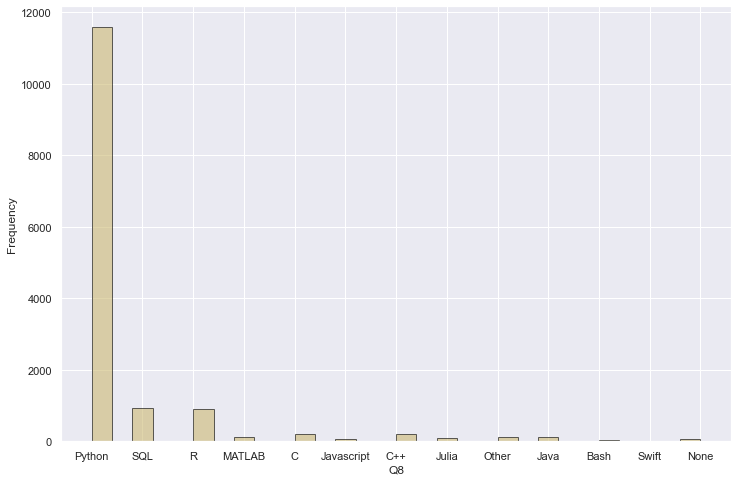

In [52]:
# Plotting the histogram to inspect the distribution of the enteries 
sns.set(style="darkgrid")
hist1 = DF['Q8'].hist(color="y", edgecolor="black" , alpha = 0.6, bins = 30, figsize = (12,8))
plt.xlabel ('Q8')
plt.ylabel ('Frequency')

In [53]:
DF['Q8'].value_counts(normalize=True)

Python        0.802911
SQL           0.065073
R             0.062647
C             0.013583
C++           0.013583
MATLAB        0.008940
Java          0.008455
Other         0.007346
Julia         0.006791
Javascript    0.004782
None          0.003812
Bash          0.001594
Swift         0.000485
Name: Q8, dtype: float64

In [54]:
DF['Q8'].replace({"MATLAB": "Other", "Java": "Other", "Julia": "Other", "Javascript": "Other",\
                 "None": "Other", "Bash": "Other",  "Swift": "Other" }, inplace=True)
# Since there isnt much of MATLAB, Java, Julia, Javascript, None, Bash, and Swift inputs 
# (less than 1%) I will replace all of them with others, as is makes for better model development 

In [55]:
# Filling Q8 with mode as it has the highest probability of being the actual value based on
# the histogram above
DF['Q8'].fillna(DF['Q8'].mode()[0],inplace=True)

#### Q11: What type of computing platform do you use most often for your data science projects?



In [56]:
DF['Q11'].unique()

array(['A laptop',
       'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)',
       'A personal computer / desktop',
       'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)',
       'Other', nan, 'None'], dtype=object)

In [57]:
# Changing the inputted element names for better visualization
DF['Q11'].replace({"A laptop": "laptop", "A personal computer / desktop": "Personal Computer",\
                   "A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)": "DL Workstation",\
                   "A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)": \
                   "Cloud Platform"}, inplace=True)

Text(0, 0.5, 'Frequency')

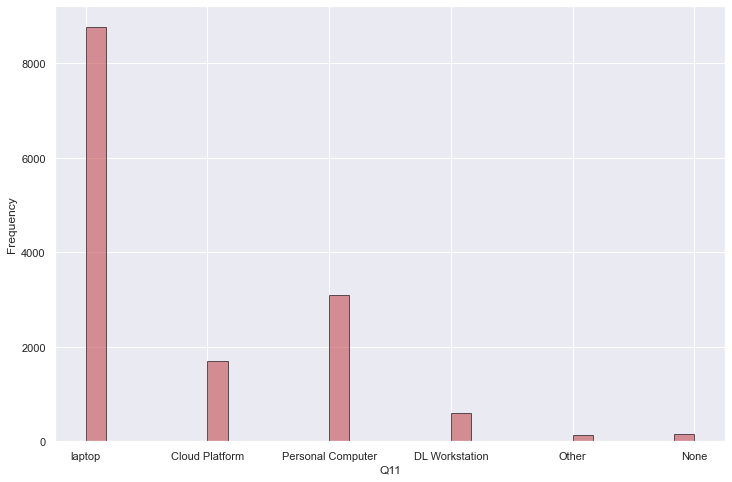

In [58]:
hist2 = DF['Q11'].hist(color="r", edgecolor="black" , alpha = 0.6, bins = 30, figsize = (12,8))
plt.xlabel ('Q11')
plt.ylabel ('Frequency')

In [59]:
DF['Q11'].value_counts(normalize=True)

laptop               0.607831
Personal Computer    0.214484
Cloud Platform       0.118157
DL Workstation       0.041095
None                 0.009979
Other                0.008455
Name: Q11, dtype: float64

In [60]:
DF['Q11'].replace({"None": "Other"}, inplace=True)
# Since there isnt much of the "None" inputs (less than 1%)
# I will replace all of them with others, as is makes for better model development 

In [61]:
# Filling Q11 with mode as it has the highest probability of being the actual value
DF['Q11'].fillna(DF['Q11'].mode()[0],inplace=True)

#### Q13: Approximately how many times have you used a TPU (tensor processing unit). 

In [62]:
DF['Q13'].unique()

array(['2-5 times', 'Never', 'More than 25 times', 'Once', '6-25 times',
       nan], dtype=object)

In [63]:
# Changing the inputted element names for better visualization
DF['Q13'].replace({"Once": "1 time",}, inplace=True)

Text(0, 0.5, 'Frequency')

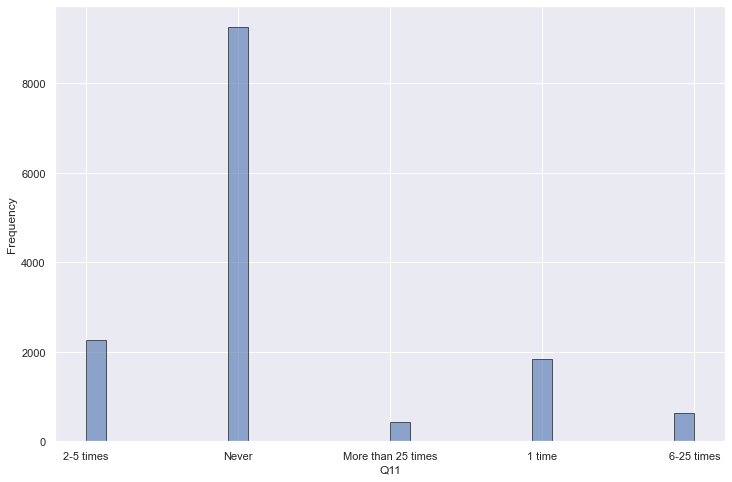

In [64]:
hist3 = DF['Q13'].hist(color="b", edgecolor="black" , alpha = 0.6, bins = 30, figsize = (12,8))
plt.xlabel ('Q11')
plt.ylabel ('Frequency')

In [65]:
DF['Q13'].value_counts(normalize=True)

Never                 0.641372
2-5 times             0.157173
1 time                0.127512
6-25 times            0.043313
More than 25 times    0.030631
Name: Q13, dtype: float64

In [66]:
# Filling Q13 with mode as it has the highest probability of being the actual value
DF['Q13'].fillna(DF['Q13'].mode()[0],inplace=True)

#### Q15: For how many years have you used machine learning methods?

In [67]:
DF['Q15'].unique() # Finding the unique elements of Q15

array(['5-10 years', 'Under 1 year',
       'I do not use machine learning methods', '10-20 years',
       '2-3 years', '1-2 years', '4-5 years', '3-4 years',
       '20 or more years', nan], dtype=object)

In [68]:
# Changing the inputted element names for better visualization
DF['Q15'].replace({"I do not use machine learning methods": "0 years"}, inplace=True)

Text(0, 0.5, 'Frequency')

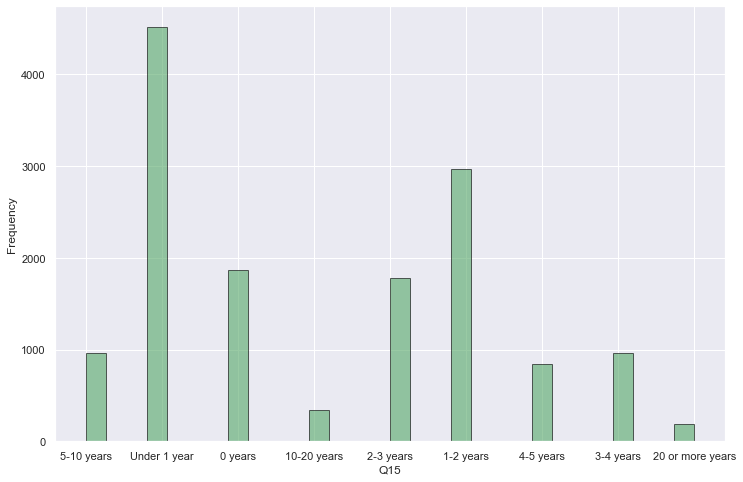

In [69]:
hist4 = DF['Q15'].hist(color="g", edgecolor="black" , alpha = 0.6, bins = 30, figsize = (12,8))
plt.xlabel ('Q15')
plt.ylabel ('Frequency')

In [70]:
DF['Q15'].value_counts(normalize=True)

Under 1 year        0.312821
1-2 years           0.205821
0 years             0.129383
2-3 years           0.123631
3-4 years           0.067013
5-10 years          0.066528
4-5 years           0.058559
10-20 years         0.023493
20 or more years    0.012751
Name: Q15, dtype: float64

In [71]:
# Based on the distribution, I cant tell what value would be the best replacement for the 
# the NaN value and hence I will replace the NaN value with "Unknown"

In [72]:
DF.Q15 = DF.Q15.fillna('Unknown')

#### Q26: Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?

In [73]:
DF['Q26'].unique() # Finding the unique elements of Q26

array(['$100-$999', '$0 ($USD)', '$1000-$9,999', '$1-$99',
       '$100,000 or more ($USD)', '$10,000-$99,999', nan], dtype=object)

Text(0, 0.5, 'Frequency')

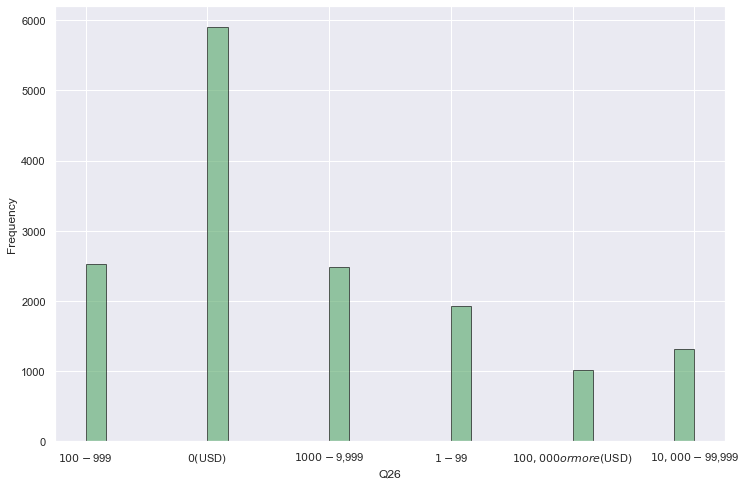

In [74]:
hist5 = DF['Q26'].hist(color="g", edgecolor="black" , alpha = 0.6, bins = 30, figsize = (12,8))
plt.xlabel ('Q26')
plt.ylabel ('Frequency')

In [75]:
DF['Q26'].value_counts(normalize=True)

$0 ($USD)                  0.388790
$100-$999                  0.166897
$1000-$9,999               0.164065
$1-$99                     0.127050
$10,000-$99,999            0.086215
$100,000 or more ($USD)    0.066983
Name: Q26, dtype: float64

In [76]:
# Filling Q26 with mode as it has the highest probability of being the actual value
DF['Q26'].fillna(DF['Q26'].mode()[0],inplace=True)

#### Q28: Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)

In [77]:
DF['Q28'].unique() # Finding the unique elements 

array([nan, ' Google Cloud Platform (GCP) ', ' SAP Cloud ',
       ' Microsoft Azure ',
       'They all had a similarly enjoyable developer experience',
       ' Amazon Web Services (AWS) ', ' Oracle Cloud ', ' Alibaba Cloud ',
       'None were satisfactory', ' IBM Cloud / Red Hat ',
       ' Salesforce Cloud ', 'Other', ' Tencent Cloud ', ' VMware Cloud '],
      dtype=object)

In [78]:
# Changing the inputted element names for better visualization
DF['Q28'].replace({"They all had a similarly enjoyable developer experience" : "All the Same", " Google Cloud Platform (GCP) " : "GCP" ," Amazon Web Services (AWS) ": "AWS"},inplace=True)

Text(0, 0.5, 'Frequency')

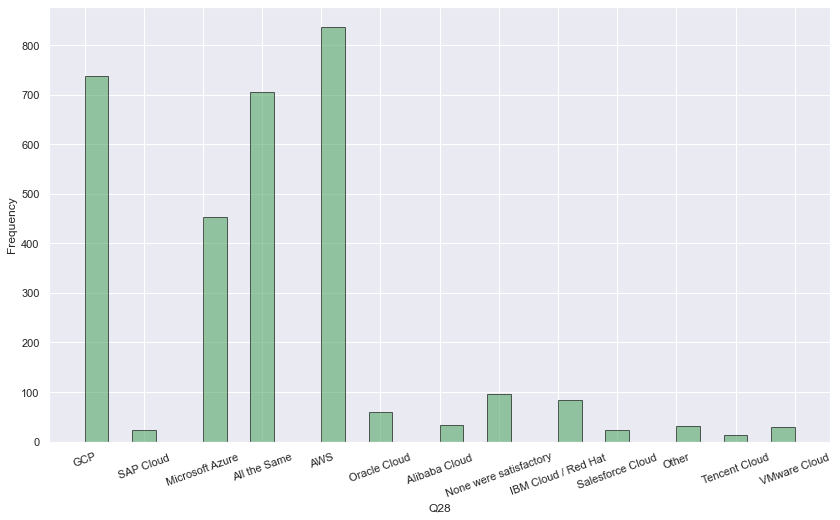

In [79]:
hist6 = DF['Q28'].hist(color="g", edgecolor="black" , alpha = 0.6, bins = 30, figsize = (14,8))
plt.xticks(rotation=20)
plt.xlabel ('Q28')
plt.ylabel ('Frequency')

In [80]:
DF['Q28'].replace({" VMware Cloud ": "Other", " SAP Cloud ": "Other", " Salesforce Cloud ": \
                   "Other", " Tencent Cloud ":"Other"}, inplace=True)
# Since there isnt much of "VMware Cloud", "SAP Cloud", "Salesforce Cloud ", "Tencent Cloud" 
# inputs (less than 1%), I will replace all of them with others, as is makes for better model 
# development 

In [81]:
# Seeing the null value in Q28
DF['Q28'].isnull().sum()

12264

In [82]:
# Finding the % of the null Value 
print("Null % of Q28", (DF['Q28'].isnull().sum()/DF.shape[0])*100)

Null % of Q28 79.68293158339289


In [83]:
# since approximately 80% of the data is missing, I will not impute the NaN values and instead
# I will drop the feature
DF = DF.drop(['Q28'], axis=1) 

#### Q33: Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?

In [84]:
DF['Q33'].unique() # Finding the unique elements

array([nan, 'MySQL ', 'IBM Db2 ', 'PostgreSQL ',
       'Google Cloud Firestore ', 'Oracle Database ',
       'Microsoft SQL Server ', 'Microsoft Azure SQL Database ',
       'Snowflake ', 'MongoDB ', 'Google Cloud BigQuery ',
       'Amazon DynamoDB ', 'SQLite ', 'Amazon RDS ', 'Amazon Redshift ',
       'Google Cloud BigTable ', 'Google Cloud SQL ',
       'Microsoft Azure Cosmos DB ', 'Other', 'Amazon Aurora ',
       'Google Cloud Spanner '], dtype=object)

Text(0, 0.5, 'Frequency')

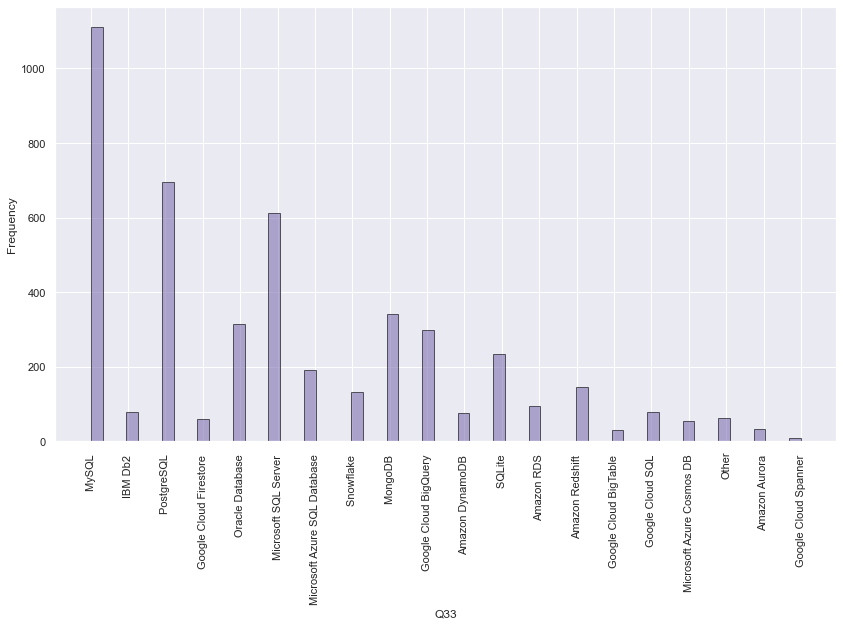

In [85]:
hist7 = DF['Q33'].hist(color="m", edgecolor="black" , alpha = 0.6, bins = 60, figsize = (14,8))
plt.xticks(rotation=90)
plt.xlabel ('Q33')
plt.ylabel ('Frequency')

In [86]:
DF['Q33'].value_counts(normalize=True)

MySQL                            0.238402
PostgreSQL                       0.149055
Microsoft SQL Server             0.131229
MongoDB                          0.073454
Oracle Database                  0.067869
Google Cloud BigQuery            0.064003
SQLite                           0.050473
Microsoft Azure SQL Database     0.041022
Amazon Redshift                  0.031357
Snowflake                        0.028351
Amazon RDS                       0.020189
Google Cloud SQL                 0.016967
IBM Db2                          0.016753
Amazon DynamoDB                  0.016538
Other                            0.013746
Google Cloud Firestore           0.012887
Microsoft Azure Cosmos DB        0.011598
Amazon Aurora                    0.007302
Google Cloud BigTable            0.006658
Google Cloud Spanner             0.002148
Name: Q33, dtype: float64

In [87]:
DF['Q33'].replace({"Amazon Aurora ": "Other",  'Google Cloud BigTable ': "Other", \
                   'Google Cloud Spanner ': "Other"}, inplace=True)
# Since there isnt much of "Amazon Aurora", "Google Cloud BigTable", "Google Cloud Spanner"
# inputs (less than 1%), I will replace all of them with others, as is makes for better model 
# development 

In [88]:
# Seeing the null value in Q28
DF['Q33'].isnull().sum()

10735

In [89]:
# Finding the % of the null Value 
print("Null % of Q33", (DF['Q33'].isnull().sum()/DF.shape[0])*100)

Null % of Q33 69.74855434994477


In [90]:
# since approximately 70% of the data is missing, I will not impute the NaN values and instead
# I will drop the feature
DF = DF.drop(['Q33'], axis=1) 

#### Q41: What is the primary tool that you use at work or school to analyze data? (Include text response)

In [91]:
DF['Q41'].unique() # Finding the unique elements 

array(['Local development environments (RStudio, JupyterLab, etc.)',
       'Advanced statistical software (SPSS, SAS, etc.)',
       'Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       nan, 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
       'Other'], dtype=object)

In [92]:
# Finding the counts of the column 
DF['Q41'].value_counts()

Local development environments (RStudio, JupyterLab, etc.)              5146
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       4967
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)     994
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                 836
Advanced statistical software (SPSS, SAS, etc.)                          746
Other                                                                    737
Name: Q41, dtype: int64

In [93]:
DF['Q41'].value_counts(normalize=True)

Local development environments (RStudio, JupyterLab, etc.)              0.383286
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.369954
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.074035
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.062267
Advanced statistical software (SPSS, SAS, etc.)                         0.055564
Other                                                                   0.054893
Name: Q41, dtype: float64

In [94]:
# Filling Q41 with mode as it has the highest probability of being the actual value
DF['Q41'].fillna(DF['Q41'].mode()[0],inplace=True)

In [95]:
# Self-check: There should be no columns with NaN values
DF.isnull().sum(axis=0)

Q1               0
Q2               0
Q3               0
Q4               0
Q5               0
Q6               0
Q7_Part_1        0
Q7_Part_2        0
Q7_Part_3        0
Q7_Part_4        0
Q7_Part_5        0
Q7_Part_6        0
Q7_Part_7        0
Q7_Part_8        0
Q7_Part_9        0
Q7_Part_10       0
Q7_Part_11       0
Q7_Part_12       0
Q7_OTHER         0
Q8               0
Q9_Part_1        0
Q9_Part_2        0
Q9_Part_3        0
Q9_Part_4        0
Q9_Part_5        0
Q9_Part_6        0
Q9_Part_7        0
Q9_Part_8        0
Q9_Part_9        0
Q9_Part_10       0
Q9_Part_11       0
Q9_Part_12       0
Q9_OTHER         0
Q10_Part_1       0
Q10_Part_2       0
Q10_Part_3       0
Q10_Part_4       0
Q10_Part_5       0
Q10_Part_6       0
Q10_Part_7       0
Q10_Part_8       0
Q10_Part_9       0
Q10_Part_10      0
Q10_Part_11      0
Q10_Part_12      0
Q10_Part_13      0
Q10_Part_14      0
Q10_Part_15      0
Q10_Part_16      0
Q10_OTHER        0
Q11              0
Q12_Part_1       0
Q12_Part_2  

In [96]:
# Finding data types for all the features in the DataFrame
DF.dtypes

Q1                object
Q2                object
Q3                object
Q4                object
Q5                object
Q6                object
Q7_Part_1          int64
Q7_Part_2          int64
Q7_Part_3          int64
Q7_Part_4          int64
Q7_Part_5          int64
Q7_Part_6          int64
Q7_Part_7          int64
Q7_Part_8          int64
Q7_Part_9          int64
Q7_Part_10         int64
Q7_Part_11         int64
Q7_Part_12         int64
Q7_OTHER           int64
Q8                object
Q9_Part_1          int64
Q9_Part_2          int64
Q9_Part_3          int64
Q9_Part_4          int64
Q9_Part_5          int64
Q9_Part_6          int64
Q9_Part_7          int64
Q9_Part_8          int64
Q9_Part_9          int64
Q9_Part_10         int64
Q9_Part_11         int64
Q9_Part_12         int64
Q9_OTHER           int64
Q10_Part_1         int64
Q10_Part_2         int64
Q10_Part_3         int64
Q10_Part_4         int64
Q10_Part_5         int64
Q10_Part_6         int64
Q10_Part_7         int64


#### Converting Categorical varibles to numerical Variables 

##### To work with machine learning models we need to convert all categorical variables to numerical values and so if we have categorical variables we need to encode them.

#### The encoding will either be by one-hot-encoding for Nominal Categorical variables (categorical variables that have no no intrinsic order) or label encoding for Ordinal Categorical variables (categorical variables that have an order like education Bachelor < Masters < PHD)

In [97]:
# Q1:
print("Q1 Unique Elements: \n", DF['Q1'].unique())
print("Amount of Unique Enteries in Q1 is:", len(DF['Q1'].unique()))

# I am considering Age as Ordinal Categorical variable

# Creating a list with the order of age with the leftmost being the lowest importance and 
# the right most being the highest importance 
Age = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59', '60-69','70+']

# Imorting relavent library 
from sklearn.preprocessing import OrdinalEncoder 

Ordi_En = OrdinalEncoder(categories = [Age])
Ordi_En.fit(DF[["Q1"]])

Q1 Unique Elements: 
 ['50-54' '22-24' '45-49' '30-34' '40-44' '35-39' '18-21' '70+' '25-29'
 '55-59' '60-69']
Amount of Unique Enteries in Q1 is: 11


OrdinalEncoder(categories=[['18-21', '22-24', '25-29', '30-34', '35-39',
                            '40-44', '45-49', '50-54', '55-59', '60-69',
                            '70+']])

In [98]:
DF_Age = pd.DataFrame(Ordi_En.transform(DF[["Q1"]]), columns=['Age'])
DF_Age.head()

Age
0  7.0
1  7.0
2  1.0
3  6.0
4  6.0

In [99]:
DF = DF.drop(['Q1'], axis=1)  # Droppping the Age column as DF_Age is being added to the original dataframe
DF = pd.concat([DF, DF_Age], axis=1)
DF.head()

Q2         Q3                 Q4                       Q5          Q6  \
0  Man      India  Bachelor’s degree                    Other  5-10 years   
1  Man  Indonesia    Master’s degree  Program/Project Manager   20+ years   
2  Man   Pakistan    Master’s degree        Software Engineer   1-3 years   
3  Man     Mexico    Doctoral degree       Research Scientist   20+ years   
4  Man      India    Doctoral degree                    Other   < 1 years   

   Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER      Q8  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  \
0         0  Python          0          0          0          0          0   
1         0  Python          0          0          0          0          0   
2         0  Python          0          0          0          0          1   
3         0  Python          0          0          0          0          0   
4         0  Python          0          0          0          0          0   

   Q9_Part_6  Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  \
0          0          0          0          1           0           0   
1          0          1          0          0           0           1   
2          0          0          0          0           0           1   
3          1          0          0          0           0           1   
4          1          0          0          0           1           1   

   Q9_Part_12  Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  \
0           0         0           0           1           0           0   
1           0         0           1           1           0           0   
2           0         1           1           0           0           0   
3           0         0           0           1           0           0   
4           0         0           0           0           0           0   

   Q10_Part_5  Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  \
0           0           0           0           0           0            0   
1           0           0           0           0           0            0   
2           0           0           0           0           0            0   
3           0           0           0           0           0            0   
4           0           0           0           0           0            0   

   Q10_Part_11  Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            1            0            0            0            0   

   Q10_Part_16  Q10_OTHER             Q11  Q12_Part_1  Q12_Part_2  Q12_Part_3  \
0            0          0          laptop           0           1           0   
1            0          0  Cloud Platform           0           0           0   
2            0          0          laptop           0           0           0   
3            0          0  Cloud Platform           1           0           0   
4            0 

In [100]:
# Q2:
print("Q2 Unique Elements:", DF['Q2'].unique())
print("Amount of Unique Enteries in Q2 is:", len(DF['Q2'].unique()))
DF['Q2'].value_counts(normalize=True)

Q2 Unique Elements: ['Man' 'Woman' 'Prefer not to say' 'Nonbinary' 'Prefer to self-describe']
Amount of Unique Enteries in Q2 is: 5


Man                        0.821389
Woman                      0.161263
Prefer not to say          0.012735
Nonbinary                  0.003054
Prefer to self-describe    0.001559
Name: Q2, dtype: float64

In [101]:
DF['Q2'].replace({"Nonbinary": "Other", "Prefer to self-describe":"Other"}, inplace=True)
# Since the features above (Nonbinary ,Prefer to self-describe ) are less than 1%, I will 
# replace them with others, as is makes for better model development (Reducing the Dimensions)

In [102]:
# I am considering Q2 (Gender) as Nominal Categorical variable (no intrinsic ordering)

# Imorting relavent library 
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder(sparse = False)
one.fit(DF[["Q2"]])
one.transform(DF[["Q2"]])

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [103]:
one.get_feature_names() # Finding the names of all the one hot encode columns 

array(['x0_Man', 'x0_Other', 'x0_Prefer not to say', 'x0_Woman'],
      dtype=object)

In [104]:
DF_Gender = pd.DataFrame(one.transform(DF[["Q2"]]), columns = one.get_feature_names())
DF_Gender.rename(columns = {'x0_Man': 'Man' , "x0_Woman": "Woman", "x0_Prefer not to say":\
                            "Prefer not to say", "x0_Other": "Other"}, inplace = True)

DF_Gender.head()

Man  Other  Prefer not to say  Woman
0  1.0    0.0                0.0    0.0
1  1.0    0.0                0.0    0.0
2  1.0    0.0                0.0    0.0
3  1.0    0.0                0.0    0.0
4  1.0    0.0                0.0    0.0

In [105]:
DF = DF.drop(['Q2'], axis=1)  # Droppping the Age column as DF_Gender is being added to the original dataframe
DF = pd.concat([DF, DF_Gender], axis=1)
DF.head()

Q3                 Q4                       Q5          Q6  \
0      India  Bachelor’s degree                    Other  5-10 years   
1  Indonesia    Master’s degree  Program/Project Manager   20+ years   
2   Pakistan    Master’s degree        Software Engineer   1-3 years   
3     Mexico    Doctoral degree       Research Scientist   20+ years   
4      India    Doctoral degree                    Other   < 1 years   

   Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER      Q8  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  \
0         0  Python          0          0          0          0          0   
1         0  Python          0          0          0          0          0   
2         0  Python          0          0          0          0          1   
3         0  Python          0          0          0          0          0   
4         0  Python          0          0          0          0          0   

   Q9_Part_6  Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  \
0          0          0          0          1           0           0   
1          0          1          0          0           0           1   
2          0          0          0          0           0           1   
3          1          0          0          0           0           1   
4          1          0          0          0           1           1   

   Q9_Part_12  Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  \
0           0         0           0           1           0           0   
1           0         0           1           1           0           0   
2           0         1           1           0           0           0   
3           0         0           0           1           0           0   
4           0         0           0           0           0           0   

   Q10_Part_5  Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  \
0           0           0           0           0           0            0   
1           0           0           0           0           0            0   
2           0           0           0           0           0            0   
3           0           0           0           0           0            0   
4           0           0           0           0           0            0   

   Q10_Part_11  Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            1            0            0            0            0   

   Q10_Part_16  Q10_OTHER             Q11  Q12_Part_1  Q12_Part_2  Q12_Part_3  \
0            0          0          laptop           0           1           0   
1            0          0  Cloud Platform           0           0           0   
2            0          0          laptop           0           0           0   
3            0          0  Cloud Platform           1           0           0   
4            0          0  Cloud Platform          

In [106]:
#Q3: 
print("Q3 Unique Elements:", DF['Q3'].unique())
print("Amount of Unique Enteries in Q3 is:", len(DF['Q3'].unique()))
DF['Q3'].value_counts(normalize=True)

Q3 Unique Elements: ['India' 'Indonesia' 'Pakistan' 'Mexico' 'Turkey' 'Australia' 'Nigeria'
 'Greece' 'Belgium' 'Egypt' 'Singapore' 'Brazil' 'Poland'
 'Iran, Islamic Republic of...' 'Japan' 'Italy' 'United States of America'
 'Viet Nam' 'Israel' 'China' 'South Africa' 'Other' 'Bangladesh' 'Russia'
 'United Kingdom of Great Britain and Northern Ireland' 'France' 'Tunisia'
 'Argentina' 'I do not wish to disclose my location' 'Colombia' 'Sweden'
 'Chile' 'Saudi Arabia' 'Spain' 'Morocco' 'Austria' 'Kenya' 'Canada'
 'Ireland' 'Portugal' 'Hong Kong (S.A.R.)' 'Ukraine' 'Denmark' 'Germany'
 'South Korea' 'Sri Lanka' 'Netherlands' 'Ghana' 'Malaysia' 'Thailand'
 'Nepal' 'Taiwan' 'Switzerland' 'Peru' 'United Arab Emirates'
 'Philippines' 'Algeria' 'Ethiopia' 'Romania' 'Iraq' 'Ecuador'
 'Kazakhstan' 'Uganda' 'Norway' 'Belarus' 'Czech Republic']
Amount of Unique Enteries in Q3 is: 66


India                                                   0.219349
United States of America                                0.119875
Other                                                   0.054058
Japan                                                   0.042362
Brazil                                                  0.035345
Russia                                                  0.032746
Nigeria                                                 0.028133
China                                                   0.023845
United Kingdom of Great Britain and Northern Ireland    0.023585
Spain                                                   0.022156
Germany                                                 0.020921
Pakistan                                                0.019297
Turkey                                                  0.018647
Egypt                                                   0.018517
France                                                  0.018387
Indonesia                

In [107]:
# Renaming some elements 
DF['Q3'].replace({"United States of America": "America", "United Kingdom of Great Britain and Northern Ireland":"United Kingdom"}, inplace=True)

Q3 has 66 different Categories. One hot encoding this will cause alot of noise (increase dimension) of the model. To avoid this, I will limit my one hot encoding to the top 10 most frequent labels of the variable. This is done in referenced to Kaggle, the winning solution of the KDD 2009 cup followed this principal.

In [108]:
# Finding the counts of all the counteries entered
Top_10_Country = DF.Q3.value_counts().sort_values(ascending=False).head(10).index.tolist()
Top_10_Country

['India',
 'America',
 'Other',
 'Japan',
 'Brazil',
 'Russia',
 'Nigeria',
 'China',
 'United Kingdom',
 'Spain']

In [109]:
# Creating the One Hot Vector in the original dataframe
for i in Top_10_Country:
    DF[i]= np.where (DF['Q3']==i, 1, 0)
    
DF[Top_10_Country].head(10)
DF = DF.drop(['Q3'], axis=1) # Droping column Q3
DF.head()

Q4                       Q5          Q6  Q7_Part_1  \
0  Bachelor’s degree                    Other  5-10 years          1   
1    Master’s degree  Program/Project Manager   20+ years          0   
2    Master’s degree        Software Engineer   1-3 years          1   
3    Doctoral degree       Research Scientist   20+ years          1   
4    Doctoral degree                    Other   < 1 years          1   

   Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  Q7_Part_7  \
0          1          0          0          0          0          0   
1          0          1          1          1          1          0   
2          0          0          0          1          1          0   
3          0          0          0          0          0          0   
4          0          0          1          0          0          0   

   Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  Q7_OTHER      Q8  \
0          0          0           0           0           0         0  Python   
1          0          0           0           0           0         0  Python   
2          0          0           0           0           0         0  Python   
3          0          0           0           0           0         0  Python   
4          0          0           0           1           0         0  Python   

   Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          1          0   
3          0          0          0          0          0          1   
4          0          0          0          0          0          1   

   Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
0          0          0          1           0           0           0   
1          1          0          0           0           1           0   
2          0          0          0           0           1           0   
3          0          0          0           0           1           0   
4          0          0          0           1           1           0   

   Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
0         0           0           1           0           0           0   
1         0           1           1           0           0           0   
2         1           1           0           0           0           0   
3         0           0           1           0           0           0   
4         0           0           0           0           0           0   

   Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  Q10_Part_11  \
0           0           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            1   

   Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER  \
0            0            0            0            0            0          0   
1            0            0            0            0            0          0   
2            0            0            0            0            0          0   
3            0            0            0            0            0          0   
4            0            0            0            0            0          0   

              Q11  Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  \
0          laptop           0           1           0           0           0   
1  Cloud Platform           0           0           0           0           1   
2          laptop           0           0           0           0           0   
3  Cloud Platform           1           0           0         

In [110]:
#Q4: 
print("Q4 Unique Elements:", DF['Q4'].unique())
print("Amount of Unique Enteries in Q4 is:", len(DF['Q4'].unique()))
DF['Q4'].value_counts(normalize=True)

Q4 Unique Elements: ['Bachelor’s degree' 'Master’s degree' 'Doctoral degree'
 'I prefer not to answer' 'No formal education past high school'
 'Some college/university study without earning a bachelor’s degree'
 'Professional doctorate']
Amount of Unique Enteries in Q4 is: 7


Master’s degree                                                      0.441752
Bachelor’s degree                                                    0.310376
Doctoral degree                                                      0.144045
Some college/university study without earning a bachelor’s degree    0.048470
I prefer not to answer                                               0.021701
Professional doctorate                                               0.018842
No formal education past high school                                 0.014814
Name: Q4, dtype: float64

In [111]:
# Renaming some elements 
DF['Q4'].replace({"Some college/university study without earning a bachelor’s degree" : "University study without earning degree"}, inplace=True)

In [112]:
# I am considering Q4 (Education) as Ordinal Categorical variable

# Creating a list with the order of age with the leftmost being the lowest importance and 
# the right most being the highest importance 
Edu = ['I prefer not to answer','No formal education past high school',\
       'University study without earning degree','Bachelor’s degree','Master’s degree',\
       'Professional doctorate','Doctoral degree']

Ordi_En_1 = OrdinalEncoder(categories = [Edu])
Ordi_En_1.fit(DF[["Q4"]])

OrdinalEncoder(categories=[['I prefer not to answer',
                            'No formal education past high school',
                            'University study without earning degree',
                            'Bachelor’s degree', 'Master’s degree',
                            'Professional doctorate', 'Doctoral degree']])

In [113]:
DF_Edu = pd.DataFrame(Ordi_En_1.transform(DF[["Q4"]]), columns=['Education'])
DF_Edu.head(10)

Education
0        3.0
1        4.0
2        4.0
3        6.0
4        6.0
5        3.0
6        0.0
7        6.0
8        4.0
9        3.0

In [114]:
DF = DF.drop(['Q4'], axis=1)  # Droppping the Age column as DF_Edu is being added to the original dataframe
DF = pd.concat([DF, DF_Edu], axis=1)
DF.head()

Q5          Q6  Q7_Part_1  Q7_Part_2  Q7_Part_3  \
0                    Other  5-10 years          1          1          0   
1  Program/Project Manager   20+ years          0          0          1   
2        Software Engineer   1-3 years          1          0          0   
3       Research Scientist   20+ years          1          0          0   
4                    Other   < 1 years          1          0          0   

   Q7_Part_4  Q7_Part_5  Q7_Part_6  Q7_Part_7  Q7_Part_8  Q7_Part_9  \
0          0          0          0          0          0          0   
1          1          1          1          0          0          0   
2          0          1          1          0          0          0   
3          0          0          0          0          0          0   
4          1          0          0          0          0          0   

   Q7_Part_10  Q7_Part_11  Q7_Part_12  Q7_OTHER      Q8  Q9_Part_1  Q9_Part_2  \
0           0           0           0         0  Python          0          0   
1           0           0           0         0  Python          0          0   
2           0           0           0         0  Python          0          0   
3           0           0           0         0  Python          0          0   
4           0           1           0         0  Python          0          0   

   Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  Q9_Part_7  Q9_Part_8  \
0          0          0          0          0          0          0   
1          0          0          0          0          1          0   
2          0          0          1          0          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  Q9_OTHER  Q10_Part_1  \
0          1           0           0           0         0           0   
1          0           0           1           0         0           1   
2          0           0           1           0         1           1   
3          0           0           1           0         0           0   
4          0           1           1           0         0           0   

   Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  Q10_Part_6  Q10_Part_7  \
0           1           0           0           0           0           0   
1           1           0           0           0           0           0   
2           0           0           0           0           0           0   
3           1           0           0           0           0           0   
4           0           0           0           0           0           0   

   Q10_Part_8  Q10_Part_9  Q10_Part_10  Q10_Part_11  Q10_Part_12  Q10_Part_13  \
0           0           0            0            0            0            0   
1           0           0            0            0            0            0   
2           0           0            0            0            0            0   
3           0           0            0            0            0            0   
4           0           0            0            1            0            0   

   Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER             Q11  \
0            0            0            0          0          laptop   
1            0            0            0          0  Cloud Platform   
2            0            0            0          0          laptop   
3            0            0            0          0  Cloud Platform   
4            0            0            0          0  Cloud Platform   

   Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  \
0           0           1           0           0           0          0   
1           0           0           0           0           1          0   
2           0           0           0           0           0          1   
3           1           0           0           0           0          0   
4           0           0     

In [115]:
#Q5:
print("Q5 Unique Elements:", DF['Q5'].unique())
print("Amount of Unique Enteries in Q5 is:", len(DF['Q5'].unique()))
DF['Q5'].value_counts(normalize=True)

Q5 Unique Elements: ['Other' 'Program/Project Manager' 'Software Engineer'
 'Research Scientist' 'Data Scientist' 'Data Analyst'
 'Machine Learning Engineer' 'Business Analyst' 'Data Engineer'
 'Product Manager' 'Statistician' 'DBA/Database Engineer'
 'Developer Relations/Advocacy']
Amount of Unique Enteries in Q5 is: 13


Data Scientist                  0.210513
Other                           0.143201
Software Engineer               0.137093
Data Analyst                    0.132480
Research Scientist              0.091222
Machine Learning Engineer       0.086219
Business Analyst                0.057501
Program/Project Manager         0.050939
Data Engineer                   0.038789
Product Manager                 0.018517
Statistician                    0.018127
DBA/Database Engineer           0.009811
Developer Relations/Advocacy    0.005588
Name: Q5, dtype: float64

In [116]:
# I am considering Q5 (Job Title) as Nominal Categorical variable (no intrinsic ordering)

one_2 = OneHotEncoder(sparse = False) # initiating the model
one_2.fit(DF[["Q5"]])                 # Fitting the data to the model
one_2.transform(DF[["Q5"]])           # Transforming the data

one_2.get_feature_names()   # getting the feature names

# Making a dataframe of the transformed "Q5" data 
DF_Job_Title = pd.DataFrame(one_2.transform(DF[["Q5"]]), columns = one_2.get_feature_names())

# Renaming the columns for better visualization on the DataFrame column
DF_Job_Title.rename(columns = {'x0_Business Analyst': 'Business Analyst' , \
                               "x0_DBA/Database Engineer": "DBA/Database Engineer", \
                               "x0_Data Analyst":"Data Analyst", "x0_Data Engineer": \
                               "Data Engineer", "x0_Data Scientist":"Data Scientist", \
                               "x0_Developer Relations/Advocacy":"Developer Relations/Advocacy"\
                               , "x0_Machine Learning Engineer":"Machine Learning Engineer",\
                               "x0_Program/Project Manager":"Program/Project Manager",\
                               "x0_Research Scientist":"Research Scientist", \
                               "x0_Software Engineer":"Software Engineer", "x0_Statistician":\
                               "Statistician", "x0_Statistician":"Statistician", "x0_Other":\
                               "Other Job Title", "x0_Product Manager":"Product Manager"},\
                    inplace = True)

DF_Job_Title.head()

Business Analyst  DBA/Database Engineer  Data Analyst  Data Engineer  \
0               0.0                    0.0           0.0            0.0   
1               0.0                    0.0           0.0            0.0   
2               0.0                    0.0           0.0            0.0   
3               0.0                    0.0           0.0            0.0   
4               0.0                    0.0           0.0            0.0   

   Data Scientist  Developer Relations/Advocacy  Machine Learning Engineer  \
0             0.0                           0.0                        0.0   
1             0.0                           0.0                        0.0   
2             0.0                           0.0                        0.0   
3             0.0                           0.0                        0.0   
4             0.0                           0.0                        0.0   

   Other Job Title  Product Manager  Program/Project Manager  \
0              1.0              0.0                      0.0   
1              0.0              0.0                      1.0   
2              0.0              0.0                      0.0   
3              0.0              0.0                      0.0   
4              1.0              0.0                      0.0   

   Research Scientist  Software Engineer  Statistician  
0                 0.0                0.0           0.0  
1                 0.0                0.0           0.0  
2                 0.0                1.0           0.0  
3                 1.0                0.0           0.0  
4                 0.0                0.0           0.0

In [117]:
DF = DF.drop(['Q5'], axis=1)  # Droppping the Q5 column as DF_Job_Title is being added to the original dataframe

# Joining the new dataframe with the orginal dataframe DF
DF = pd.concat([DF, DF_Job_Title], axis=1)
DF.head()

Q6  Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  \
0  5-10 years          1          1          0          0          0   
1   20+ years          0          0          1          1          1   
2   1-3 years          1          0          0          0          1   
3   20+ years          1          0          0          0          0   
4   < 1 years          1          0          0          1          0   

   Q7_Part_6  Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  \
0          0          0          0          0           0           0   
1          1          0          0          0           0           0   
2          1          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           1   

   Q7_Part_12  Q7_OTHER      Q8  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  \
0           0         0  Python          0          0          0          0   
1           0         0  Python          0          0          0          0   
2           0         0  Python          0          0          0          0   
3           0         0  Python          0          0          0          0   
4           0         0  Python          0          0          0          0   

   Q9_Part_5  Q9_Part_6  Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  \
0          0          0          0          0          1           0   
1          0          0          1          0          0           0   
2          1          0          0          0          0           0   
3          0          1          0          0          0           0   
4          0          1          0          0          0           1   

   Q9_Part_11  Q9_Part_12  Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  \
0           0           0         0           0           1           0   
1           1           0         0           1           1           0   
2           1           0         1           1           0           0   
3           1           0         0           0           1           0   
4           1           0         0           0           0           0   

   Q10_Part_4  Q10_Part_5  Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Q10_Part_10  Q10_Part_11  Q10_Part_12  Q10_Part_13  Q10_Part_14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            1            0            0            0   

   Q10_Part_15  Q10_Part_16  Q10_OTHER             Q11  Q12_Part_1  \
0            0            0          0          laptop           0   
1            0            0          0  Cloud Platform           0   
2            0            0          0          laptop           0   
3            0            0          0  Cloud Platform           1   
4            0            0          0  Cloud Platform           0   

   Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  \
0           1           0           0           0          0   
1           0           0           0           1          0   
2           0           0           0           0          1   
3           0           0           0           0          0   
4           0           0           0           1          0   

                  Q13  Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  \
0           2-5 t

In [118]:
# Q6:
print("Q6 Unique Elements:\n", DF['Q6'].unique())
print("")
print("Amount of Unique Enteries in Q6 is:", len(DF['Q6'].unique()))
DF['Q6'].value_counts(normalize=True)

Q6 Unique Elements:
 ['5-10 years' '20+ years' '1-3 years' '< 1 years' '10-20 years'
 '3-5 years' 'I have never written code']

Amount of Unique Enteries in Q6 is: 7


1-3 years                    0.239815
< 1 years                    0.160029
3-5 years                    0.159899
5-10 years                   0.152362
10-20 years                  0.119940
20+ years                    0.105516
I have never written code    0.062439
Name: Q6, dtype: float64

In [119]:
# I am considering Q4 (Educatoin) as Ordinal Categorical variable

# Creating a list with the order of Experiance with the leftmost being the lowest importance and 
# the right most being the highest importance 
Exp = ['I have never written code','< 1 years','1-3 years','3-5 years','5-10 years',\
       '10-20 years','20+ years']

Ordi_En_2 = OrdinalEncoder(categories = [Exp])
Ordi_En_2.fit(DF[["Q6"]])

DF_Exp = pd.DataFrame(Ordi_En_2.transform(DF[["Q6"]]), columns=['Experience'])
DF_Exp.head()

Experience
0         4.0
1         6.0
2         2.0
3         6.0
4         1.0

In [120]:
DF = DF.drop(['Q6'], axis=1)  # Droppping the Q6 column as DF_Edu is being added to the original dataframe
DF = pd.concat([DF, DF_Exp], axis=1)
DF.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER      Q8  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  \
0         0  Python          0          0          0          0          0   
1         0  Python          0          0          0          0          0   
2         0  Python          0          0          0          0          1   
3         0  Python          0          0          0          0          0   
4         0  Python          0          0          0          0          0   

   Q9_Part_6  Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  \
0          0          0          0          1           0           0   
1          0          1          0          0           0           1   
2          0          0          0          0           0           1   
3          1          0          0          0           0           1   
4          1          0          0          0           1           1   

   Q9_Part_12  Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  \
0           0         0           0           1           0           0   
1           0         0           1           1           0           0   
2           0         1           1           0           0           0   
3           0         0           0           1           0           0   
4           0         0           0           0           0           0   

   Q10_Part_5  Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  \
0           0           0           0           0           0            0   
1           0           0           0           0           0            0   
2           0           0           0           0           0            0   
3           0           0           0           0           0            0   
4           0           0           0           0           0            0   

   Q10_Part_11  Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            1            0            0            0            0   

   Q10_Part_16  Q10_OTHER             Q11  Q12_Part_1  Q12_Part_2  Q12_Part_3  \
0            0          0          laptop           0           1           0   
1            0          0  Cloud Platform           0           0           0   
2            0          0          laptop           0           0           0   
3            0          0  Cloud Platform           1           0           0   
4            0          0  Cloud Platform           0           0           0   

   Q12_Part_4  Q12_Part_5  Q12_OTHER                 Q13  Q14_Part_1  \
0           0           0          0           2-5 times           1   
1           0           1          0               Never           1   
2           0           0          1               Never           1   
3           0           0          0  More than 25 times           1   
4           0           1          

In [121]:
# Q8:
print("Q8 Unique Elements:\n", DF['Q8'].unique())
print("")
print("Amount of Unique Enteries in Q8 is:", len(DF['Q8'].unique()))
DF['Q8'].value_counts(normalize=True)

Q8 Unique Elements:
 ['Python' 'SQL' 'R' 'Other' 'C' 'C++']

Amount of Unique Enteries in Q8 is: 6


Python    0.815217
SQL       0.061010
R         0.058736
Other     0.039569
C         0.012735
C++       0.012735
Name: Q8, dtype: float64

In [122]:
# I am considering Q8 (programming language) as Nominal Categorical variable (no intrinsic ordering)

one_3 = OneHotEncoder(sparse = False) # initiating the model
one_3.fit(DF[["Q8"]])                 # Fitting the data to the model
one_3.transform(DF[["Q8"]])           # Transforming the data

one_3.get_feature_names()   # getting the feature names

# Making a dataframe of the transformed "Q8" data 
DF_Prog_Lan = pd.DataFrame(one_3.transform(DF[["Q8"]]), columns = one_3.get_feature_names())

# Renaming the columns for better visualization 
DF_Prog_Lan.rename(columns = {'x0_C': 'C' , "x0_C++": "C++","x0_Other":"Other Languages",\
                              "x0_Python":"Python", "x0_R":"R","x0_SQL":"SQL"},inplace = True)

DF_Prog_Lan.head()

C  C++  Other Languages  Python    R  SQL
0  0.0  0.0              0.0     1.0  0.0  0.0
1  0.0  0.0              0.0     1.0  0.0  0.0
2  0.0  0.0              0.0     1.0  0.0  0.0
3  0.0  0.0              0.0     1.0  0.0  0.0
4  0.0  0.0              0.0     1.0  0.0  0.0

In [123]:
DF = DF.drop(['Q8'], axis=1)  # Droppping the Q8 column as DF_Prog_Lan is being added to the original dataframe

# Joining the new dataframe with the orginal dataframe DF
DF = pd.concat([DF, DF_Prog_Lan], axis=1)
DF.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
0         0          0          0          0          0          0          0   
1         0          0          0          0          0          0          0   
2         0          0          0          0          0          1          0   
3         0          0          0          0          0          0          1   
4         0          0          0          0          0          0          1   

   Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
0          0          0          1           0           0           0   
1          1          0          0           0           1           0   
2          0          0          0           0           1           0   
3          0          0          0           0           1           0   
4          0          0          0           1           1           0   

   Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
0         0           0           1           0           0           0   
1         0           1           1           0           0           0   
2         1           1           0           0           0           0   
3         0           0           1           0           0           0   
4         0           0           0           0           0           0   

   Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  Q10_Part_11  \
0           0           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            1   

   Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER  \
0            0            0            0            0            0          0   
1            0            0            0            0            0          0   
2            0            0            0            0            0          0   
3            0            0            0            0            0          0   
4            0            0            0            0            0          0   

              Q11  Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  \
0          laptop           0           1           0           0           0   
1  Cloud Platform           0           0           0           0           1   
2          laptop           0           0           0           0           0   
3  Cloud Platform           1           0           0           0           0   
4  Cloud Platform           0           0           0           0           1   

   Q12_OTHER                 Q13  Q14_Part_1  Q14_Part_2  Q14_Part_3  \
0          0           2-5 times           1           1           0   
1          0               Never           1           0           0   
2          1               Never           1           0           0   
3          

In [124]:
# Q11:
print("Q11 Unique Elements:\n", DF['Q11'].unique())
print("")
print("Amount of Unique Enteries in Q11 is:", len(DF['Q11'].unique()))
DF['Q11'].value_counts(normalize=True)

Q11 Unique Elements:
 ['laptop' 'Cloud Platform' 'Personal Computer' 'DL Workstation' 'Other']

Amount of Unique Enteries in Q11 is: 5


laptop               0.632318
Personal Computer    0.201092
Cloud Platform       0.110779
DL Workstation       0.038529
Other                0.017283
Name: Q11, dtype: float64

In [125]:
# I am considering Q11 as Nominal Categorical variable (no intrinsic ordering)

one_4 = OneHotEncoder(sparse = False)  # initiating the model
one_4.fit(DF[["Q11"]])                 # Fitting the data to the model
one_4.transform(DF[["Q11"]])           # Transforming the data

one_4.get_feature_names()   # getting the feature names

# Making a dataframe of the transformed "Q8" data 
DF_CP = pd.DataFrame(one_4.transform(DF[["Q11"]]), columns = one_4.get_feature_names())

# Renaming the columns for better visualization 
DF_CP.rename(columns = {'x0_laptop': 'laptop' , "x0_Personal Computer": "Personal Computer",\
                        "x0_Cloud Platform":"Cloud Platform","x0_DL Workstation":"DL Workstation",\
                        "x0_Other":"Other computing platform"},inplace = True)

DF_CP.head()

Cloud Platform  DL Workstation  Other computing platform  \
0             0.0             0.0                       0.0   
1             1.0             0.0                       0.0   
2             0.0             0.0                       0.0   
3             1.0             0.0                       0.0   
4             1.0             0.0                       0.0   

   Personal Computer  laptop  
0                0.0     1.0  
1                0.0     0.0  
2                0.0     1.0  
3                0.0     0.0  
4                0.0     0.0

In [126]:
DF = DF.drop(['Q11'], axis=1)  # Droppping the Q11 column as DF_CP is being added to the original dataframe

# Joining the new dataframe with the orginal dataframe DF
DF = pd.concat([DF, DF_CP], axis=1)
DF.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
0         0          0          0          0          0          0          0   
1         0          0          0          0          0          0          0   
2         0          0          0          0          0          1          0   
3         0          0          0          0          0          0          1   
4         0          0          0          0          0          0          1   

   Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
0          0          0          1           0           0           0   
1          1          0          0           0           1           0   
2          0          0          0           0           1           0   
3          0          0          0           0           1           0   
4          0          0          0           1           1           0   

   Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
0         0           0           1           0           0           0   
1         0           1           1           0           0           0   
2         1           1           0           0           0           0   
3         0           0           1           0           0           0   
4         0           0           0           0           0           0   

   Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  Q10_Part_11  \
0           0           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            1   

   Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER  \
0            0            0            0            0            0          0   
1            0            0            0            0            0          0   
2            0            0            0            0            0          0   
3            0            0            0            0            0          0   
4            0            0            0            0            0          0   

   Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  \
0           0           1           0           0           0          0   
1           0           0           0           0           1          0   
2           0           0           0           0           0          1   
3           1           0           0           0           0          0   
4           0           0           0           0           1          0   

                  Q13  Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  \
0           2-5 times           1           1           0           1   
1               Never           1           0           0           0   
2               Never           1           0           0           0   
3  More than 25 times           1    

In [127]:
# Q13:
print("Q13 Unique Elements:\n", DF['Q13'].unique())
print("")
print("Amount of Unique Enteries in Q13 is:", len(DF['Q13'].unique()))
DF['Q13'].value_counts(normalize=True)

Q13 Unique Elements:
 ['2-5 times' 'Never' 'More than 25 times' '1 time' '6-25 times']

Amount of Unique Enteries in Q13 is: 5


Never                 0.663765
2-5 times             0.147359
1 time                0.119550
6-25 times            0.040608
More than 25 times    0.028718
Name: Q13, dtype: float64

In [128]:
# I am considering Q13 (Educatoin) as Ordinal Categorical variable

# Creating a list with the order of Usage with the leftmost being the lowest Usage and 
# the right most being the highest Usage 

TPU_Exp = ['Never','1 time','2-5 times','6-25 times','3-5 years','More than 25 times']

Ordi_En_3 = OrdinalEncoder(categories = [TPU_Exp])
Ordi_En_3.fit(DF[["Q13"]])

DF_TPU_Exp = pd.DataFrame(Ordi_En_3.transform(DF[["Q13"]]), columns=['TPU Experience'])
DF_TPU_Exp.head()

TPU Experience
0             2.0
1             0.0
2             0.0
3             5.0
4             0.0

In [129]:
# Droppping the Q13 column as DF_TPU_Exp is being added to the original dataframe
DF = DF.drop(['Q13'], axis=1) 

DF = pd.concat([DF, DF_TPU_Exp], axis=1)
DF.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
0         0          0          0          0          0          0          0   
1         0          0          0          0          0          0          0   
2         0          0          0          0          0          1          0   
3         0          0          0          0          0          0          1   
4         0          0          0          0          0          0          1   

   Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
0          0          0          1           0           0           0   
1          1          0          0           0           1           0   
2          0          0          0           0           1           0   
3          0          0          0           0           1           0   
4          0          0          0           1           1           0   

   Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
0         0           0           1           0           0           0   
1         0           1           1           0           0           0   
2         1           1           0           0           0           0   
3         0           0           1           0           0           0   
4         0           0           0           0           0           0   

   Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  Q10_Part_11  \
0           0           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            1   

   Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER  \
0            0            0            0            0            0          0   
1            0            0            0            0            0          0   
2            0            0            0            0            0          0   
3            0            0            0            0            0          0   
4            0            0            0            0            0          0   

   Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  \
0           0           1           0           0           0          0   
1           0           0           0           0           1          0   
2           0           0           0           0           0          1   
3           1           0           0           0           0          0   
4           0           0           0           0           1          0   

   Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  Q14_Part_5  Q14_Part_6  \
0           1           1           0           1           1           0   
1           1           0           0           0           0           0   
2           1           0           0           0           0           0   
3           1        

In [130]:
# Q15: For how many years have you used machine learning methods?
print("Q15 Unique Elements:\n", DF['Q15'].unique())
print("")
print("Amount of Unique Enteries in Q15 is:", len(DF['Q15'].unique()))
DF['Q15'].value_counts(normalize=True)

Q15 Unique Elements:
 ['5-10 years' 'Under 1 year' '0 years' '10-20 years' '2-3 years'
 '1-2 years' '4-5 years' '3-4 years' '20 or more years' 'Unknown']

Amount of Unique Enteries in Q15 is: 10


Under 1 year        0.293288
1-2 years           0.192970
0 years             0.121305
2-3 years           0.115912
3-4 years           0.062829
Unknown             0.062439
5-10 years          0.062374
4-5 years           0.054902
10-20 years         0.022026
20 or more years    0.011955
Name: Q15, dtype: float64

In [131]:
# I am considering Q15 (ML experience) as Ordinal Categorical variable

# Creating a list with the order of experience with the leftmost being the lowest importance and 
# the right most being the highest importance  

# I placed the "Unkown" column approximately in the middle of the importance list. Since I dont 
# know what the actual value is, I belive placing it at the median is the best place. 
ML_Exp = ['0 years','Under 1 year','1-2 years','2-3 years','3-4 years',"Unknown", '4-5 years', "5-10 years","10-20 years", "20 or more years"]

Ordi_En_4 = OrdinalEncoder(categories = [ML_Exp])
Ordi_En_4.fit(DF[["Q15"]])

DF_ML_Exp = pd.DataFrame(Ordi_En_4.transform(DF[["Q15"]]), columns=['ML Experience'])
DF_ML_Exp.head()

ML Experience
0            7.0
1            1.0
2            0.0
3            7.0
4            8.0

In [132]:
DF = DF.drop(['Q15'], axis=1)  # Droppping the Q15 column as DF_ML_Exp is being added to the original dataframe
DF = pd.concat([DF, DF_ML_Exp], axis=1)
DF.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
0         0          0          0          0          0          0          0   
1         0          0          0          0          0          0          0   
2         0          0          0          0          0          1          0   
3         0          0          0          0          0          0          1   
4         0          0          0          0          0          0          1   

   Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
0          0          0          1           0           0           0   
1          1          0          0           0           1           0   
2          0          0          0           0           1           0   
3          0          0          0           0           1           0   
4          0          0          0           1           1           0   

   Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
0         0           0           1           0           0           0   
1         0           1           1           0           0           0   
2         1           1           0           0           0           0   
3         0           0           1           0           0           0   
4         0           0           0           0           0           0   

   Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  Q10_Part_11  \
0           0           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            1   

   Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER  \
0            0            0            0            0            0          0   
1            0            0            0            0            0          0   
2            0            0            0            0            0          0   
3            0            0            0            0            0          0   
4            0            0            0            0            0          0   

   Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  \
0           0           1           0           0           0          0   
1           0           0           0           0           1          0   
2           0           0           0           0           0          1   
3           1           0           0           0           0          0   
4           0           0           0           0           1          0   

   Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  Q14_Part_5  Q14_Part_6  \
0           1           1           0           1           1           0   
1           1           0           0           0           0           0   
2           1           0           0           0           0           0   
3           1        

In [133]:
# Q20: In what industry is your current employer/contract (or your most recent employer if 
# retired)?
print("Q20 Unique Elements:\n", DF['Q20'].unique())
print("")
print("Amount of Unique Enteries in Q20 is:", len(DF['Q20'].unique()))
DF['Q20'].value_counts(normalize=True)

Q20 Unique Elements:
 ['Manufacturing/Fabrication' 'Academics/Education' 'Computers/Technology'
 'Other' 'Shipping/Transportation' 'Energy/Mining'
 'Insurance/Risk Assessment' 'Non-profit/Service' 'Accounting/Finance'
 'Hospitality/Entertainment/Sports' 'Government/Public Service'
 'Online Service/Internet-based Services'
 'Online Business/Internet-based Sales' 'Medical/Pharmaceutical'
 'Retail/Sales' 'Broadcasting/Communications' 'Marketing/CRM'
 'Military/Security/Defense']

Amount of Unique Enteries in Q20 is: 18


Computers/Technology                      0.248587
Academics/Education                       0.194464
Accounting/Finance                        0.089988
Other                                     0.067312
Manufacturing/Fabrication                 0.054447
Medical/Pharmaceutical                    0.048080
Government/Public Service                 0.045416
Online Service/Internet-based Services    0.036320
Energy/Mining                             0.034631
Retail/Sales                              0.033266
Insurance/Risk Assessment                 0.026574
Marketing/CRM                             0.022871
Broadcasting/Communications               0.020726
Shipping/Transportation                   0.019492
Non-profit/Service                        0.017998
Online Business/Internet-based Sales      0.016763
Military/Security/Defense                 0.012410
Hospitality/Entertainment/Sports          0.010656
Name: Q20, dtype: float64

Q20 has 18 different Categories. One hot encoding this will cause alot of noise (increase dimension) of the model. To avoid this, I will limit my one hot encoding to the top 10 most frequesnt labels of the variable. This is done in referenced to kaggle. The winning solution of the KDD 2009 cup followed this principal.

In [134]:
# Finding the counts of all the counteries entered
Top_10_Company = DF.Q20.value_counts().sort_values(ascending=False).head(10).index.tolist()
Top_10_Company

['Computers/Technology',
 'Academics/Education',
 'Accounting/Finance',
 'Other',
 'Manufacturing/Fabrication',
 'Medical/Pharmaceutical',
 'Government/Public Service',
 'Online Service/Internet-based Services',
 'Energy/Mining',
 'Retail/Sales']

In [135]:
# Creating the One Hot Vector 
for i in Top_10_Company:
    DF[i]= np.where (DF['Q20']==i, 1, 0)
    
DF[Top_10_Company].head(10)
DF = DF.drop(['Q20'], axis=1)
DF.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
0         0          0          0          0          0          0          0   
1         0          0          0          0          0          0          0   
2         0          0          0          0          0          1          0   
3         0          0          0          0          0          0          1   
4         0          0          0          0          0          0          1   

   Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
0          0          0          1           0           0           0   
1          1          0          0           0           1           0   
2          0          0          0           0           1           0   
3          0          0          0           0           1           0   
4          0          0          0           1           1           0   

   Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
0         0           0           1           0           0           0   
1         0           1           1           0           0           0   
2         1           1           0           0           0           0   
3         0           0           1           0           0           0   
4         0           0           0           0           0           0   

   Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  Q10_Part_11  \
0           0           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            1   

   Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER  \
0            0            0            0            0            0          0   
1            0            0            0            0            0          0   
2            0            0            0            0            0          0   
3            0            0            0            0            0          0   
4            0            0            0            0            0          0   

   Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  \
0           0           1           0           0           0          0   
1           0           0           0           0           1          0   
2           0           0           0           0           0          1   
3           1           0           0           0           0          0   
4           0           0           0           0           1          0   

   Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  Q14_Part_5  Q14_Part_6  \
0           1           1           0           1           1           0   
1           1           0           0           0           0           0   
2           1           0           0           0           0           0   
3           1        

In [136]:
#Q21: What is the size of the company where you are employed?
print("Q21 Unique Elements:\n", DF['Q21'].unique())
print("")
print("Amount of Unique Enteries in Q21 is:", len(DF['Q21'].unique()))
DF['Q21'].value_counts(normalize=True)

Q21 Unique Elements:
 ['50-249 employees' '1000-9,999 employees' '10,000 or more employees'
 '0-49 employees' '250-999 employees']

Amount of Unique Enteries in Q21 is: 5


0-49 employees              0.304269
10,000 or more employees    0.210253
1000-9,999 employees        0.190241
50-249 employees            0.160873
250-999 employees           0.134364
Name: Q21, dtype: float64

In [137]:
# I am considering Q21 (Company Size) as Ordinal Categorical variable

# Creating a list with the order of experience with the leftmost being the lowest rank and 
# the right most being the highest rank  

Comp_Size = ['0-49 employees','50-249 employees','250-999 employees','1000-9,999 employees','10,000 or more employees']

Ordi_En_5 = OrdinalEncoder(categories = [Comp_Size])
Ordi_En_5.fit(DF[["Q21"]])

DF_Comp_Size = pd.DataFrame(Ordi_En_5.transform(DF[["Q21"]]), columns=['Company Size'])
DF_Comp_Size.head()

Company Size
0           1.0
1           3.0
2           3.0
3           3.0
4           1.0

In [138]:
# Droppping the Q21 column as DF_Comp_Size is being added to the original dataframe
DF = DF.drop(['Q21'], axis=1) 
DF = pd.concat([DF, DF_Comp_Size], axis=1)
DF.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
0         0          0          0          0          0          0          0   
1         0          0          0          0          0          0          0   
2         0          0          0          0          0          1          0   
3         0          0          0          0          0          0          1   
4         0          0          0          0          0          0          1   

   Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
0          0          0          1           0           0           0   
1          1          0          0           0           1           0   
2          0          0          0           0           1           0   
3          0          0          0           0           1           0   
4          0          0          0           1           1           0   

   Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
0         0           0           1           0           0           0   
1         0           1           1           0           0           0   
2         1           1           0           0           0           0   
3         0           0           1           0           0           0   
4         0           0           0           0           0           0   

   Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  Q10_Part_11  \
0           0           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            1   

   Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER  \
0            0            0            0            0            0          0   
1            0            0            0            0            0          0   
2            0            0            0            0            0          0   
3            0            0            0            0            0          0   
4            0            0            0            0            0          0   

   Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  \
0           0           1           0           0           0          0   
1           0           0           0           0           1          0   
2           0           0           0           0           0          1   
3           1           0           0           0           0          0   
4           0           0           0           0           1          0   

   Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  Q14_Part_5  Q14_Part_6  \
0           1           1           0           1           1           0   
1           1           0           0           0           0           0   
2           1           0           0           0           0           0   
3           1        

In [139]:
#Q22: Approximately how many individuals are responsible for data science workloads at your
# place of business?
print("Q22 Unique Elements:\n", DF['Q22'].unique())
print("")
print("Amount of Unique Enteries in Q22 is:", len(DF['Q22'].unique()))
DF['Q22'].value_counts(normalize=True)

Q22 Unique Elements:
 ['3-4' '1-2' '0' '5-9' '10-14' '20+' '15-19']

Amount of Unique Enteries in Q22 is: 7


1-2      0.226301
20+      0.223182
0        0.186862
3-4      0.159379
5-9      0.115782
10-14    0.062179
15-19    0.026314
Name: Q22, dtype: float64

In [140]:
# I am considering Q22 (Data Science Size) as Ordinal Categorical variable

# Creating a list with the order of Data Science individuals at a company with the leftmost 
# being the lowest amount and the right most being the highest amount  

DS_Size = ['0','1-2','3-4','5-9','10-14','15-19','20+']

Ordi_En_6 = OrdinalEncoder(categories = [DS_Size])
Ordi_En_6.fit(DF[["Q22"]])

DF_DS_Size = pd.DataFrame(Ordi_En_6.transform(DF[["Q22"]]),columns=['Amount of DS Employee'])
DF_DS_Size.head()

Amount of DS Employee
0                    2.0
1                    1.0
2                    0.0
3                    0.0
4                    3.0

In [141]:
# Droppping the Q22 column as DF_DS_Size is being added to the original dataframe
DF = DF.drop(['Q22'], axis=1) 
DF = pd.concat([DF, DF_DS_Size], axis=1)
DF.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
0         0          0          0          0          0          0          0   
1         0          0          0          0          0          0          0   
2         0          0          0          0          0          1          0   
3         0          0          0          0          0          0          1   
4         0          0          0          0          0          0          1   

   Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
0          0          0          1           0           0           0   
1          1          0          0           0           1           0   
2          0          0          0           0           1           0   
3          0          0          0           0           1           0   
4          0          0          0           1           1           0   

   Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
0         0           0           1           0           0           0   
1         0           1           1           0           0           0   
2         1           1           0           0           0           0   
3         0           0           1           0           0           0   
4         0           0           0           0           0           0   

   Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  Q10_Part_11  \
0           0           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            1   

   Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER  \
0            0            0            0            0            0          0   
1            0            0            0            0            0          0   
2            0            0            0            0            0          0   
3            0            0            0            0            0          0   
4            0            0            0            0            0          0   

   Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  \
0           0           1           0           0           0          0   
1           0           0           0           0           1          0   
2           0           0           0           0           0          1   
3           1           0           0           0           0          0   
4           0           0           0           0           1          0   

   Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  Q14_Part_5  Q14_Part_6  \
0           1           1           0           1           1           0   
1           1           0           0           0           0           0   
2           1           0           0           0           0           0   
3           1        

In [142]:
#Q23: Does your current employer incorporate machine learning methods into their business?
print("Q23 Unique Elements:\n", DF['Q23'].unique())
print("")
print("Amount of Unique Enteries in Q23 is:", len(DF['Q23'].unique()))
DF['Q23'].value_counts(normalize=True)

Q23 Unique Elements:
 ['No (we do not use ML methods)'
 'We are exploring ML methods (and may one day put a model into production)'
 'I do not know'
 'We use ML methods for generating insights (but do not put working models into production)'
 'We have well established ML methods (i.e., models in production for more than 2 years)'
 'We recently started using ML methods (i.e., models in production for less than 2 years)']

Amount of Unique Enteries in Q23 is: 6


We are exploring ML methods (and may one day put a model into production)                    0.213436
No (we do not use ML methods)                                                                0.205380
I do not know                                                                                0.165681
We have well established ML methods (i.e., models in production for more than 2 years)       0.165421
We recently started using ML methods (i.e., models in production for less than 2 years)      0.142681
We use ML methods for generating insights (but do not put working models into production)    0.107400
Name: Q23, dtype: float64

In [143]:
# I am considering Q23 (incorporate machine learning method) as Ordinal Categorical variable

# Left most lowest rank(0) and right most highest rank (5)
ML_Incorporation = ['No (we do not use ML methods)', 'I do not know','We are exploring ML methods (and may one day put a model into production)','We use ML methods for generating insights (but do not put working models into production)','We recently started using ML methods (i.e., models in production for less than 2 years)','We have well established ML methods (i.e., models in production for more than 2 years)']

Ordi_En_7 = OrdinalEncoder(categories = [ML_Incorporation])
Ordi_En_7.fit(DF[["Q23"]])

DF_ML_Incor = pd.DataFrame(Ordi_En_7.transform(DF[["Q23"]]),columns=['ML Incorporation'])
DF_ML_Incor.head()

ML Incorporation
0               0.0
1               2.0
2               1.0
3               1.0
4               3.0

In [144]:
# Droppping the Q23 column as DF_ML_Incor is being added to the original dataframe
DF = DF.drop(['Q23'], axis=1) 
DF = pd.concat([DF, DF_ML_Incor], axis=1)
DF.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
0         0          0          0          0          0          0          0   
1         0          0          0          0          0          0          0   
2         0          0          0          0          0          1          0   
3         0          0          0          0          0          0          1   
4         0          0          0          0          0          0          1   

   Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
0          0          0          1           0           0           0   
1          1          0          0           0           1           0   
2          0          0          0           0           1           0   
3          0          0          0           0           1           0   
4          0          0          0           1           1           0   

   Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
0         0           0           1           0           0           0   
1         0           1           1           0           0           0   
2         1           1           0           0           0           0   
3         0           0           1           0           0           0   
4         0           0           0           0           0           0   

   Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  Q10_Part_11  \
0           0           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            1   

   Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER  \
0            0            0            0            0            0          0   
1            0            0            0            0            0          0   
2            0            0            0            0            0          0   
3            0            0            0            0            0          0   
4            0            0            0            0            0          0   

   Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  \
0           0           1           0           0           0          0   
1           0           0           0           0           1          0   
2           0           0           0           0           0          1   
3           1           0           0           0           0          0   
4           0           0           0           0           1          0   

   Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  Q14_Part_5  Q14_Part_6  \
0           1           1           0           1           1           0   
1           1           0           0           0           0           0   
2           1           0           0           0           0           0   
3           1        

In [145]:
#Q25: What is your current yearly compensation (approximate $USD)?
print("Q25 Unique Elements:\n", DF['Q25'].unique())
print("")
print("Amount of Unique Enteries in Q25 is:", len(DF['Q25'].unique()))
DF['Q25'].value_counts(normalize=True)

Q25 Unique Elements:
 ['25,000-29,999' '60,000-69,999' '$0-999' '30,000-39,999' '15,000-19,999'
 '70,000-79,999' '2,000-2,999' '10,000-14,999' '5,000-7,499'
 '20,000-24,999' '1,000-1,999' '100,000-124,999' '7,500-9,999'
 '4,000-4,999' '40,000-49,999' '50,000-59,999' '3,000-3,999'
 '300,000-499,999' '200,000-249,999' '125,000-149,999' '250,000-299,999'
 '80,000-89,999' '90,000-99,999' '150,000-199,999' '>$1,000,000'
 '$500,000-999,999']

Amount of Unique Enteries in Q25 is: 26


$0-999              0.218894
1,000-1,999         0.062959
10,000-14,999       0.061724
30,000-39,999       0.048145
100,000-124,999     0.047105
5,000-7,499         0.045416
50,000-59,999       0.045286
40,000-49,999       0.044701
20,000-24,999       0.038139
2,000-2,999         0.037359
15,000-19,999       0.037230
7,500-9,999         0.035865
60,000-69,999       0.035800
25,000-29,999       0.030537
70,000-79,999       0.030147
4,000-4,999         0.029628
150,000-199,999     0.025469
80,000-89,999       0.025404
3,000-3,999         0.024690
125,000-149,999     0.024625
90,000-99,999       0.022741
200,000-249,999     0.011500
300,000-499,999     0.005913
250,000-299,999     0.004873
>$1,000,000         0.003768
$500,000-999,999    0.002079
Name: Q25, dtype: float64

I will drop Column Q25 as this information is already incorporated in Q25_Encoded’ and ‘Q25_buckets. Column ‘Q25_buckets’ (Target Variable for Assignment 2) has been obtained by combining some salary buckets in the column ‘Q25’. Column ‘Q25_Encoded’ has been obtained by label encoding the column ‘Q25_buckets’.

In [146]:
# Droppping the Q25 column 
DF = DF.drop(['Q25'], axis=1) 

In [147]:
#Q26: Approximately how much money have you (or your team) spent on machine learning and/or 
# cloud computing services at home (or at work) in the past 5 years (approximate $USD)

print("Q26 Unique Elements:\n", DF['Q26'].unique())
print("")
print("Amount of Unique Enteries in Q26 is:", len(DF['Q26'].unique()))
DF['Q26'].value_counts(normalize=True)

Q26 Unique Elements:
 ['$100-$999' '$0 ($USD)' '$1000-$9,999' '$1-$99' '$100,000 or more ($USD)'
 '$10,000-$99,999']

Amount of Unique Enteries in Q26 is: 6


$0 ($USD)                  0.397050
$100-$999                  0.164642
$1000-$9,999               0.161848
$1-$99                     0.125333
$10,000-$99,999            0.085050
$100,000 or more ($USD)    0.066078
Name: Q26, dtype: float64

In [148]:
# I am considering Q26 (spendings on machine learning services) as Ordinal Categorical variable

# Left most lowest rank(0) and right most highest rank (5)
ML_Spending = ['$0 ($USD)', '$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','$100,000 or more ($USD)']

Ordi_En_8 = OrdinalEncoder(categories = [ML_Spending])
Ordi_En_8.fit(DF[["Q26"]])

DF_ML_Spending = pd.DataFrame(Ordi_En_8.transform(DF[["Q26"]]),columns=['ML Spending'])
DF_ML_Spending.head()

ML Spending
0          2.0
1          0.0
2          0.0
3          0.0
4          3.0

In [149]:
# Droppping the Q26 column as DF_ML_Spending is being added to the original dataframe
DF = DF.drop(['Q26'], axis=1) 
DF = pd.concat([DF, DF_ML_Spending], axis=1)
DF.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
0         0          0          0          0          0          0          0   
1         0          0          0          0          0          0          0   
2         0          0          0          0          0          1          0   
3         0          0          0          0          0          0          1   
4         0          0          0          0          0          0          1   

   Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
0          0          0          1           0           0           0   
1          1          0          0           0           1           0   
2          0          0          0           0           1           0   
3          0          0          0           0           1           0   
4          0          0          0           1           1           0   

   Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
0         0           0           1           0           0           0   
1         0           1           1           0           0           0   
2         1           1           0           0           0           0   
3         0           0           1           0           0           0   
4         0           0           0           0           0           0   

   Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  Q10_Part_11  \
0           0           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            1   

   Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER  \
0            0            0            0            0            0          0   
1            0            0            0            0            0          0   
2            0            0            0            0            0          0   
3            0            0            0            0            0          0   
4            0            0            0            0            0          0   

   Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  \
0           0           1           0           0           0          0   
1           0           0           0           0           1          0   
2           0           0           0           0           0          1   
3           1           0           0           0           0          0   
4           0           0           0           0           1          0   

   Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  Q14_Part_5  Q14_Part_6  \
0           1           1           0           1           1           0   
1           1           0           0           0           0           0   
2           1           0           0           0           0           0   
3           1        

In [150]:
#Q41: What is the primary tool that you use at work or school to analyze data? 
print("Q41 Unique Elements:\n", DF['Q41'].unique())
print("")
print("Amount of Unique Enteries in Q41 is:", len(DF['Q41'].unique()))
DF['Q41'].value_counts(normalize=True)

Q41 Unique Elements:
 ['Local development environments (RStudio, JupyterLab, etc.)'
 'Advanced statistical software (SPSS, SAS, etc.)'
 'Basic statistical software (Microsoft Excel, Google Sheets, etc.)'
 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)'
 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)' 'Other']

Amount of Unique Enteries in Q41 is: 6


Local development environments (RStudio, JupyterLab, etc.)              0.462023
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.322721
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.064583
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.054317
Advanced statistical software (SPSS, SAS, etc.)                         0.048470
Other                                                                   0.047885
Name: Q41, dtype: float64

In [151]:
# I am considering Q41 as Nominal Categorical variable (no intrinsic ordering)

one_4 = OneHotEncoder(sparse = False) # initiating the model
one_4.fit(DF[["Q41"]])                 # Fitting the data to the model
one_4.transform(DF[["Q41"]])           # Transforming the data

one_4.get_feature_names()   # getting the feature names

# Making a dataframe of the transformed "Q41" data 
DF_41 = pd.DataFrame(one_4.transform(DF[["Q41"]]), columns = one_4.get_feature_names())

# Renaming the columns for better visualization 
DF_41.rename(columns = {'x0_Local development environments (RStudio, JupyterLab, etc.)': 'Local development environments' , "x0_'Advanced statistical software (SPSS, SAS, etc.)": "Advanced statistical software","x0_Other":"Other Tools to Analyze Data", "x0_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)":"Business intelligence software", "x0_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)":"Cloud-based data software & APIs","x0_Advanced statistical software (SPSS, SAS, etc.)":"Advanced statistical software", "x0_Basic statistical software (Microsoft Excel, Google Sheets, etc.)": "Basic statistical software"},inplace = True)

DF_41.head()

Advanced statistical software  Basic statistical software  \
0                            0.0                         0.0   
1                            1.0                         0.0   
2                            0.0                         1.0   
3                            0.0                         0.0   
4                            0.0                         0.0   

   Business intelligence software  Cloud-based data software & APIs  \
0                             0.0                               0.0   
1                             0.0                               0.0   
2                             0.0                               0.0   
3                             0.0                               0.0   
4                             0.0                               0.0   

   Local development environments  Other Tools to Analyze Data  
0                             1.0                          0.0  
1                             0.0                          0.0  
2                             0.0                          0.0  
3                             1.0                          0.0  
4                             1.0                          0.0

In [152]:
DF = DF.drop(['Q41'], axis=1)  # Droppping the Q41 column as DF_41 is being added to the original dataframe

# Joining the new dataframe with the orginal dataframe DF
DF = pd.concat([DF, DF_41], axis=1)
DF.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
0          1          1          0          0          0          0   
1          0          0          1          1          1          1   
2          1          0          0          0          1          1   
3          1          0          0          0          0          0   
4          1          0          0          1          0          0   

   Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           1           0   

   Q7_OTHER  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
0         0          0          0          0          0          0          0   
1         0          0          0          0          0          0          0   
2         0          0          0          0          0          1          0   
3         0          0          0          0          0          0          1   
4         0          0          0          0          0          0          1   

   Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
0          0          0          1           0           0           0   
1          1          0          0           0           1           0   
2          0          0          0           0           1           0   
3          0          0          0           0           1           0   
4          0          0          0           1           1           0   

   Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
0         0           0           1           0           0           0   
1         0           1           1           0           0           0   
2         1           1           0           0           0           0   
3         0           0           1           0           0           0   
4         0           0           0           0           0           0   

   Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  Q10_Part_11  \
0           0           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            1   

   Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER  \
0            0            0            0            0            0          0   
1            0            0            0            0            0          0   
2            0            0            0            0            0          0   
3            0            0            0            0            0          0   
4            0            0            0            0            0          0   

   Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  \
0           0           1           0           0           0          0   
1           0           0           0           0           1          0   
2           0           0           0           0           0          1   
3           1           0           0           0           0          0   
4           0           0           0           0           1          0   

   Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  Q14_Part_5  Q14_Part_6  \
0           1           1           0           1           1           0   
1           1           0           0           0           0           0   
2           1           0           0           0           0           0   
3           1        

In [153]:
DF.dtypes

Q7_Part_1                                   int64
Q7_Part_2                                   int64
Q7_Part_3                                   int64
Q7_Part_4                                   int64
Q7_Part_5                                   int64
Q7_Part_6                                   int64
Q7_Part_7                                   int64
Q7_Part_8                                   int64
Q7_Part_9                                   int64
Q7_Part_10                                  int64
Q7_Part_11                                  int64
Q7_Part_12                                  int64
Q7_OTHER                                    int64
Q9_Part_1                                   int64
Q9_Part_2                                   int64
Q9_Part_3                                   int64
Q9_Part_4                                   int64
Q9_Part_5                                   int64
Q9_Part_6                                   int64
Q9_Part_7                                   int64


In [154]:
# Dropping Q25_buckets as we already have Q25_Encoded which is the label encoding of column
# Q25_buckets. Q25_Encoded is what we will provid to our model as its in numerical form
DF = DF.drop(['Q25_buckets'], axis=1)

### Step 2:   Exploratory Data Analysis and Feature Selection

In [155]:
### Splitting the data  ###
Target = DF[["Q25_Encoded"]].copy()                  # Making a dataframe of just the targets
Features = DF.drop(columns = ["Q25_Encoded"])        # Making a dataframe of just the features

# Importing Relavent Library 
from sklearn.model_selection import train_test_split

# Splitting the data to train and test sets (80% trian & 20% test)
DF_train, DF_test = train_test_split(DF, test_size=0.2, random_state=1) 

In [156]:
# Computing the descriptive statistics for the train data:
DF_train.describe()

Q7_Part_1     Q7_Part_2     Q7_Part_3     Q7_Part_4     Q7_Part_5  \
count  12312.000000  12312.000000  12312.000000  12312.000000  12312.000000   
mean       0.810429      0.221166      0.460445      0.132391      0.161062   
std        0.391978      0.415049      0.498453      0.338929      0.367603   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Q7_Part_6     Q7_Part_7     Q7_Part_8     Q7_Part_9    Q7_Part_10  \
count  12312.000000  12312.000000  12312.000000  12312.000000  12312.000000   
mean       0.160331      0.165367      0.013077      0.011777      0.109162   
std        0.366928      0.371527      0.113608      0.107886      0.311855   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Q7_Part_11    Q7_Part_12      Q7_OTHER     Q9_Part_1     Q9_Part_2  \
count  12312.000000  12312.000000  12312.000000  12312.000000  12312.000000   
mean       0.101121      0.010965      0.120614      0.231075      0.197856   
std        0.301501      0.104142      0.325691      0.421538      0.398399   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Q9_Part_3     Q9_Part_4     Q9_Part_5     Q9_Part_6     Q9_Part_7  \
count  12312.000000  12312.000000  12312.000000  12312.000000  12312.000000   
mean       0.152372      0.364766      0.270793      0.145468      0.172271   
std        0.359395      0.481384      0.444387      0.352586      0.377631   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Q9_Part_8     Q9_Part_9    Q9_Part_10    Q9_Part_11    Q9_Part_12  \
count  12312.000000  12312.000000  12312.000000  12312.000000  12312.000000   
mean       0.103151      0.077567      0.073018      0.617122      0.018194   
std        0.304169      0.267499      0.260177      0.486109      0.133657   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000      0.000000   
75%        0.000000      0.000000      0.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           Q9_OTHER    Q10_Part_1    Q10_Part_2    Q10_Part_3    Q10_Part_4  \
count  12312.000000  12312.000000  12312.000000  12312.000000  12312.000000   
mean       0.056368      0.354695      0.372645      0.050195      0.009097   
std        0.230640      0.478440      0.483528      0.218356      0.094946   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.

<AxesSubplot:xlabel='Q25_Encoded', ylabel='count'>

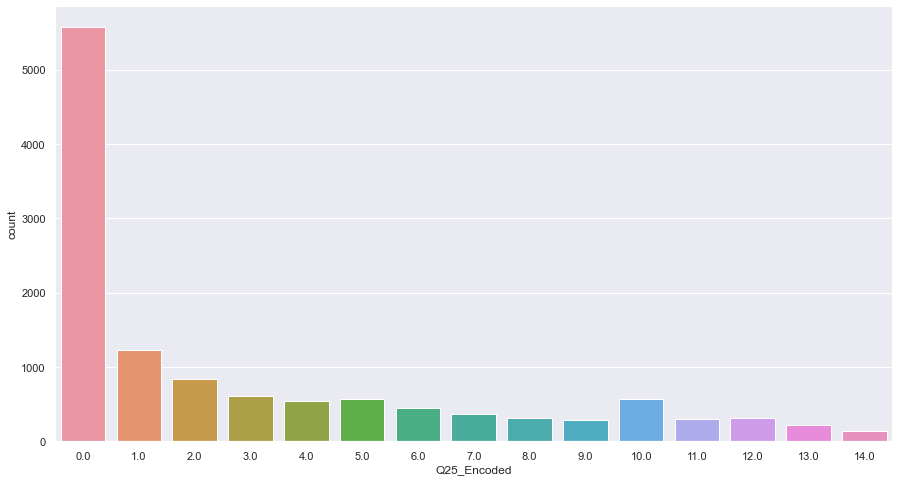

In [157]:
# Visualizing the distribution of our Target Varible in the Train data
plt.figure(figsize = (15,8))
sns.countplot(x='Q25_Encoded',data=DF_train)

we can conclude fromt the above plot, that the data is imbalanced (most data is in salary class 0 which corresponds to 0 to $9,999).  

<AxesSubplot:xlabel='Q25_Encoded', ylabel='count'>

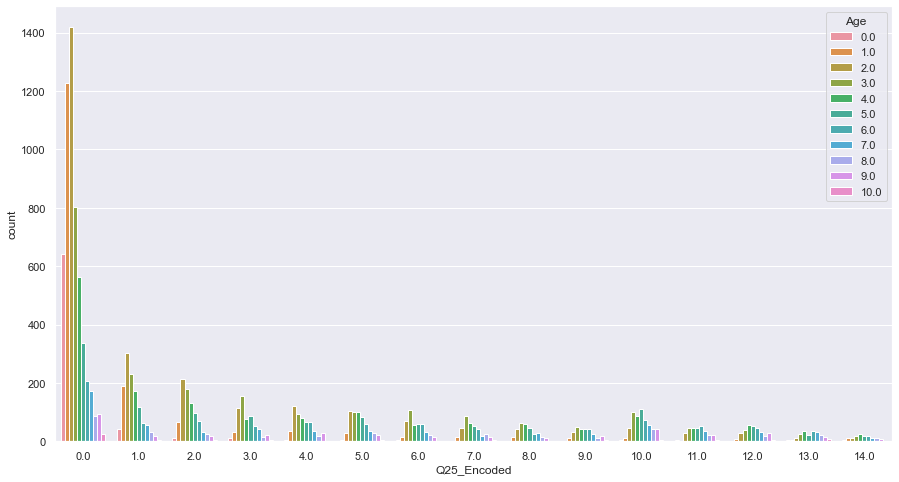

In [158]:
# Visualizing the distribution of our Target Varible in the Train data, seeing the Age and
# their bucket encoded salary 
plt.figure(figsize = (15,8))
sns.countplot(x='Q25_Encoded', hue = "Age", data=DF_train)

<AxesSubplot:xlabel='Q25_Encoded', ylabel='count'>

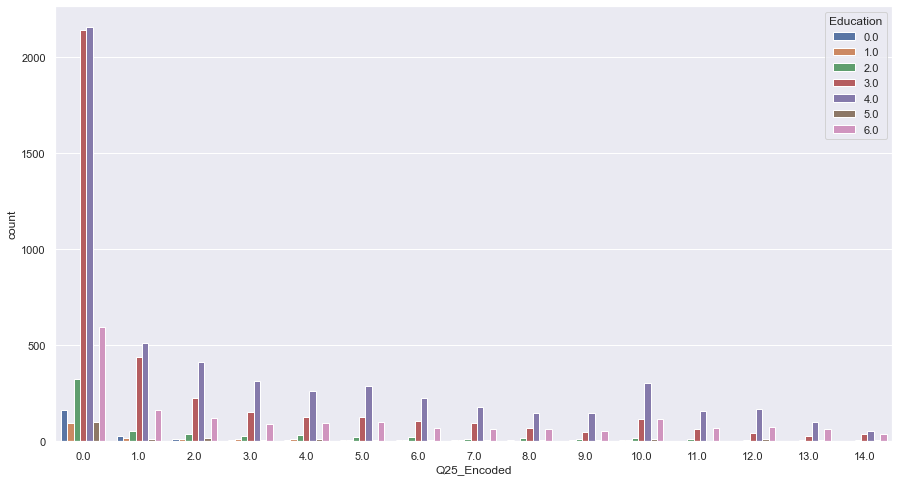

In [159]:
# Visualizing the distribution of our Target Varible in the Train data, seeing the Age and
# their bucket encoded salary 
plt.figure(figsize = (15,8))
sns.countplot(x='Q25_Encoded', hue = "Education", data=DF_train)

<AxesSubplot:xlabel='Education', ylabel='count'>

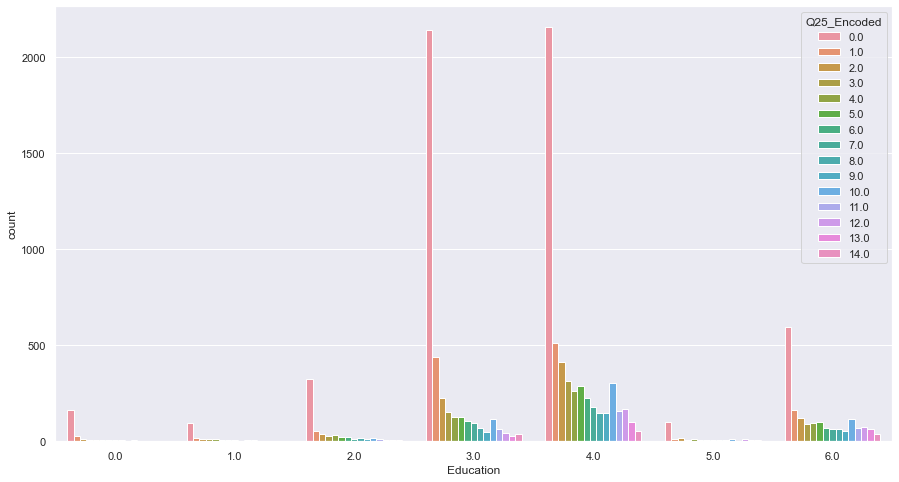

In [160]:
plt.figure(figsize = (15,8))
sns.countplot(x='Education', hue = "Q25_Encoded", data=DF_train)

<AxesSubplot:xlabel='Q25_Encoded', ylabel='count'>

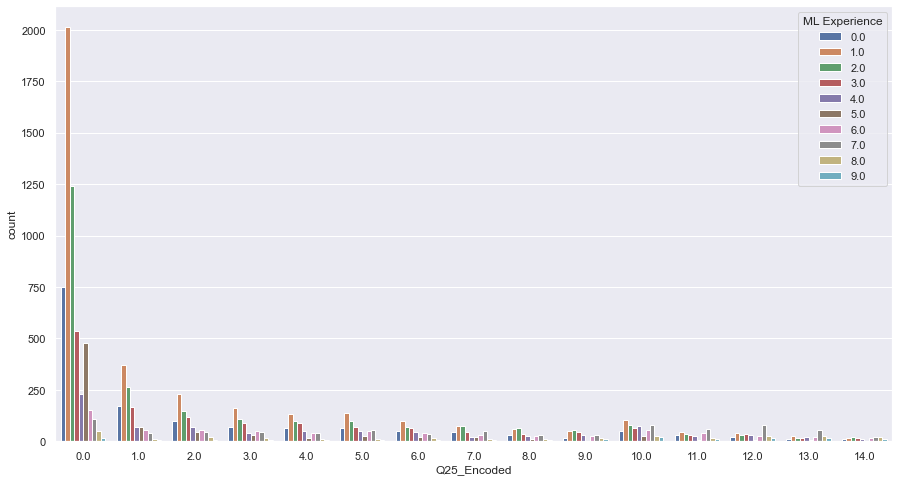

In [161]:
# Visualizing the distribution of our Target Varible in the Train data, seeing the ML exp and
# their bucket encoded salary 
plt.figure(figsize = (15,8))
sns.countplot(x='Q25_Encoded', hue = "ML Experience", data=DF_train)

As there is an increase in salary, the ratio of people with more Machine Learning experience relative to people with little to no Machine Learning experience increases. There is a decrease in number people with little to no Machine Learning experience as you incerease salary. This is expected as in higher salary buckets, people tend to have more Machine Learning experience. 

In [162]:
# The following function selects highly correlated features and removes the 1st feature that is
# highly correlated with any other features

def corr_high_list(DataFrame, limit):
    col_corr = set()                       # All the names of correlated columns
    corr_matrix = DataFrame.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            
            if abs(corr_matrix.iloc[i, j]) > limit: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
                
    return col_corr

Method 1: Picking the top features with respect to correlation to the target variable

In [163]:
# Making a copy of the train dataset
DF_train_corr_table = DF_train.copy()

# Finding highly correlated features with one and another 
# The threshold 75% was recommended by the TA, as he stated in his tutorial if two variables
# have above 75% correlation, it is best practice to disregard one of them. The reason is if 
# two variable have 75% correlation they are including similar information and they wont add 
# any new information to our model
High_Corr_Features = corr_high_list(DF_train_corr_table, 0.75)
len(set(High_Corr_Features))   #Finding the amount of the highly correlated features 

4

In [164]:
# Finding the names of the highly correlated features 
High_Corr_Features

{'Q19_Part_4', 'Q29_B_Part_3', 'Q9_Part_2', 'Woman'}

In [165]:
# Dropping the highly correlated Features from the Training dataframe
DF_train_corr_table = DF_train_corr_table.drop(High_Corr_Features, axis =1)
DF_train_corr_table.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
98             1          0          0          0          0          0   
13048          0          0          0          0          0          0   
10785          1          0          1          0          0          1   
11343          1          1          0          0          0          0   
7285           1          1          1          0          0          1   

       Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
98             0          0          0           1           0           0   
13048          0          0          0           0           0           0   
10785          0          0          0           0           0           0   
11343          0          0          0           1           0           0   
7285           0          1          0           0           0           0   

       Q7_OTHER  Q9_Part_1  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
98            0          0          0          1          0          0   
13048         0          0          0          0          0          0   
10785         0          0          0          0          0          0   
11343         0          1          0          0          0          1   
7285          0          1          1          1          0          1   

       Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
98             0          0          1           0           0           0   
13048          0          0          0           0           0           0   
10785          0          0          0           0           1           0   
11343          0          0          1           0           1           0   
7285           0          0          0           0           1           0   

       Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
98            0           0           0           0           0           0   
13048         0           0           0           0           0           0   
10785         0           0           0           0           0           0   
11343         0           1           0           0           0           0   
7285          0           0           0           1           0           0   

       Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  \
98              0           0           0           0            0   
13048           0           0           0           0            0   
10785           0           0           0           1            0   
11343           0           0           0           0            0   
7285            0           0           1           0            0   

       Q10_Part_11  Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  \
98               0            0            0            0            0   
13048            0            0            0            0            0   
10785            0            0            0            0            0   
11343            0            0            0            0            0   
7285             0            0            0            0            0   

       Q10_Part_16  Q10_OTHER  Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  \
98               1          0           0           0           0           0   
13048            0          0           0           0           0           0   
10785            0          0           0           0           0           1   
11343            0          0           1           0           0           0   
7285             0          0           1           0           0           0   

       Q12_Part_5  Q12_OTHER  Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  \
98              1          0           0           0           0           0   
13048           0          0           0           0           0           0   
10785           0          0           1           1           1           0   
11343           0        

In [166]:
# Dropping columns that have a very close variance
# The number of threshold was selected based on the link the TA provided in Piazza
vt = VarianceThreshold (threshold = 0.001)           # Initiating the model for a threshold of 0.001
vt.fit_transform(DF_train_corr_table)                # Fitting and transforming the train data 

# Finding the names of the remaining features with a varaince greater than 0.001
Feature_list_Var_corr = DF_train_corr_table.columns[vt.get_support()]

print("lenth of the new features", len(Feature_list_Var_corr))

DF_train_corr_VarDrop = DF_train_corr_table [Feature_list_Var_corr]
DF_train_corr_VarDrop.head()

lenth of the new features 398


Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
98             1          0          0          0          0          0   
13048          0          0          0          0          0          0   
10785          1          0          1          0          0          1   
11343          1          1          0          0          0          0   
7285           1          1          1          0          0          1   

       Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
98             0          0          0           1           0           0   
13048          0          0          0           0           0           0   
10785          0          0          0           0           0           0   
11343          0          0          0           1           0           0   
7285           0          1          0           0           0           0   

       Q7_OTHER  Q9_Part_1  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
98            0          0          0          1          0          0   
13048         0          0          0          0          0          0   
10785         0          0          0          0          0          0   
11343         0          1          0          0          0          1   
7285          0          1          1          1          0          1   

       Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
98             0          0          1           0           0           0   
13048          0          0          0           0           0           0   
10785          0          0          0           0           1           0   
11343          0          0          1           0           1           0   
7285           0          0          0           0           1           0   

       Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
98            0           0           0           0           0           0   
13048         0           0           0           0           0           0   
10785         0           0           0           0           0           0   
11343         0           1           0           0           0           0   
7285          0           0           0           1           0           0   

       Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  \
98              0           0           0           0            0   
13048           0           0           0           0            0   
10785           0           0           0           1            0   
11343           0           0           0           0            0   
7285            0           0           1           0            0   

       Q10_Part_11  Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  \
98               0            0            0            0            0   
13048            0            0            0            0            0   
10785            0            0            0            0            0   
11343            0            0            0            0            0   
7285             0            0            0            0            0   

       Q10_Part_16  Q10_OTHER  Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  \
98               1          0           0           0           0           0   
13048            0          0           0           0           0           0   
10785            0          0           0           0           0           1   
11343            0          0           1           0           0           0   
7285             0          0           1           0           0           0   

       Q12_Part_5  Q12_OTHER  Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  \
98              1          0           0           0           0           0   
13048           0          0           0           0           0           0   
10785           0          0           1           1           1           0   
11343           0        

In [167]:
Correlation_Table = DF_train_corr_VarDrop.corr(method='pearson')
Correlation_Table.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
Q7_Part_1   1.000000   0.051028   0.162421   0.071536   0.089587   0.061679   
Q7_Part_2   0.051028   1.000000   0.154778   0.010104  -0.023730  -0.014178   
Q7_Part_3   0.162421   0.154778   1.000000   0.047828   0.030560   0.164361   
Q7_Part_4   0.071536   0.010104   0.047828   1.000000   0.455370   0.240792   
Q7_Part_5   0.089587  -0.023730   0.030560   0.455370   1.000000   0.232490   

           Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  \
Q7_Part_1   0.052970   0.037431   0.008620    0.114814    0.092111   
Q7_Part_2  -0.016485   0.091977   0.018015    0.038126    0.090647   
Q7_Part_3   0.191913   0.025631   0.033586    0.140651   -0.017433   
Q7_Part_4   0.129306   0.028869   0.086199    0.076901    0.193297   
Q7_Part_5   0.135650   0.050704   0.075057    0.064147    0.207025   

           Q7_Part_12  Q7_OTHER  Q9_Part_1  Q9_Part_3  Q9_Part_4  Q9_Part_5  \
Q7_Part_1   -0.217705 -0.098295   0.214498   0.015358   0.190429   0.221050   
Q7_Part_2   -0.056109 -0.035112   0.070468   0.003862  -0.055396  -0.015576   
Q7_Part_3   -0.097268  0.076173   0.102458   0.112543   0.131057   0.089065   
Q7_Part_4   -0.041131  0.003973   0.015548   0.141127   0.092816   0.044551   
Q7_Part_5   -0.046135 -0.008262   0.020851   0.207103   0.127457   0.071611   

           Q9_Part_6  Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  \
Q7_Part_1   0.154881   0.030774   0.081588   0.079049    0.037773    0.440519   
Q7_Part_2   0.084309   0.051776   0.018735  -0.005278    0.049775    0.034454   
Q7_Part_3   0.045453   0.167174   0.088526   0.039156   -0.044433    0.143996   
Q7_Part_4   0.077412   0.100400   0.048743   0.077558    0.157498    0.030613   
Q7_Part_5   0.051100   0.104381   0.062077   0.081932    0.164937    0.021477   

           Q9_Part_12  Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  \
Q7_Part_1   -0.176031 -0.017464    0.207407    0.282751    0.058987   
Q7_Part_2   -0.050577 -0.036054    0.016430    0.006188    0.060337   
Q7_Part_3   -0.026994  0.042712    0.065137    0.051726    0.089889   
Q7_Part_4   -0.020900  0.014673    0.059533    0.059770    0.039713   
Q7_Part_5   -0.036500  0.008836    0.059874    0.071311    0.053091   

           Q10_Part_4  Q10_Part_5  Q10_Part_6  Q10_Part_7  Q10_Part_8  \
Q7_Part_1    0.022332    0.080317    0.007361    0.059509    0.061267   
Q7_Part_2    0.021085    0.040143    0.017645    0.045322    0.031490   
Q7_Part_3    0.011036    0.040133    0.008557    0.075224    0.076257   
Q7_Part_4    0.035773    0.033981    0.060786    0.061048    0.023064   
Q7_Part_5    0.030164    0.035476    0.071054    0.063205    0.036240   

           Q10_Part_9  Q10_Part_10  Q10_Part_11  Q10_Part_12  Q10_Part_13  \
Q7_Part_1    0.027619     0.074025     0.053252     0.060130     0.015543   
Q7_Part_2    0.040362     0.033053     0.057291     0.082198     0.048910   
Q7_Part_3    0.049897     0.063228     0.061898     0.110884     0.064360   
Q7_Part_4    0.041908     0.074929     0.085788    -0.004829     0.024650   
Q7_Part_5    0.040152     0.079669     0.094468    -0.003680     0.025419   

           Q10_Part_14  Q10_Part_15  Q10_Part_16  Q10_OTHER  Q12_Part_1  \
Q7_Part_1     0.026739     0.009457    -0.105129   0.001917    0.207440   
Q7_Part_2     0.027250     0.058936     0.044763   0.012195   -0.001035   
Q7_Part_3     0.016965     0.019482    -0.001925   0.021917    0.017120   
Q7_Part_4     0.021021     0.043964    -0.032095   0.005084    0.102603   
Q7_Part_5     0.031753     0.039510    -0.037283   0.003276    0.149011   

           Q12_Part_2  Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  \
Q7_Part_1    0.119622    0.021439    0.014673    0.019024   0.010485   
Q7_Part_2    0.025457    0.034484    0.024100    0.062299   0.012465   
Q7_Part_3    0.036409    0.020545    0.022995    0.088457   0.017051   
Q7_Part_4    0.091876    0.048616    0.050825   -0.083454   0.037447   
Q7_Part_5    

In [168]:
# Finding the top 15 most correlated features with the targest column 'Q25_Encoded'

# Sorting the dataframe based on column 'Q25_Encoded' from high to low. Slicing the dataframe
# from index 1 as index 0 is just the "Q25_Encoded" itslef. Finally slicing the dataframe for
# only the "Q25_Encoded" column 
Top_15_corr = Correlation_Table.sort_values(by ='Q25_Encoded', ascending = False)[0:16]
Top_15_corr_Q25 = Top_15_corr[['Q25_Encoded']]
Top_15_corr_Q25

Q25_Encoded
Q25_Encoded               1.000000
America                   0.484781
Experience                0.392167
Age                       0.380835
ML Spending               0.354686
ML Experience             0.321618
ML Incorporation          0.277552
Amount of DS Employee     0.255565
Company Size              0.238118
Q30_A_Part_3              0.219987
Q24_Part_3                0.212373
Q27_A_Part_1              0.205256
Q29_A_Part_1              0.202286
Q7_Part_10                0.177286
Education                 0.175132
Q9_Part_9                 0.173482

In [169]:
# Getting the list of the top correlated features 
Top_15_corr_Q25_list = Top_15_corr_Q25.index.values.tolist()
Top_15_corr_Q25_list

['Q25_Encoded',
 'America',
 'Experience',
 'Age',
 'ML Spending',
 'ML Experience',
 'ML Incorporation',
 'Amount of DS Employee',
 'Company Size',
 'Q30_A_Part_3',
 'Q24_Part_3',
 'Q27_A_Part_1',
 'Q29_A_Part_1',
 'Q7_Part_10',
 'Education',
 'Q9_Part_9']

In [170]:
DF_Top_corr = DF_train[Top_15_corr_Q25_list]
DF_Top_corr.head()

Q25_Encoded  America  Experience  Age  ML Spending  ML Experience  \
98             2.0        0         1.0  3.0          0.0            0.0   
13048          0.0        0         0.0  3.0          0.0            5.0   
10785          1.0        0         4.0  2.0          2.0            1.0   
11343          3.0        1         2.0  2.0          4.0            2.0   
7285          11.0        1         2.0  6.0          3.0            2.0   

       ML Incorporation  Amount of DS Employee  Company Size  Q30_A_Part_3  \
98                  1.0                    1.0           1.0             0   
13048               5.0                    3.0           2.0             0   
10785               4.0                    3.0           1.0             1   
11343               4.0                    6.0           4.0             0   
7285                5.0                    6.0           4.0             0   

       Q24_Part_3  Q27_A_Part_1  Q29_A_Part_1  Q7_Part_10  Education  \
98              0             0             0           1        2.0   
13048           1             0             0           0        4.0   
10785           0             1             1           0        4.0   
11343           1             0             0           1        4.0   
7285            1             1             1           0        4.0   

       Q9_Part_9  
98             1  
13048          0  
10785          0  
11343          1  
7285           0

In [171]:
#Self Check
High_Corr_Features = corr_high_list(DF_Top_corr, 0.75)
len(set(High_Corr_Features))

0

<AxesSubplot:>

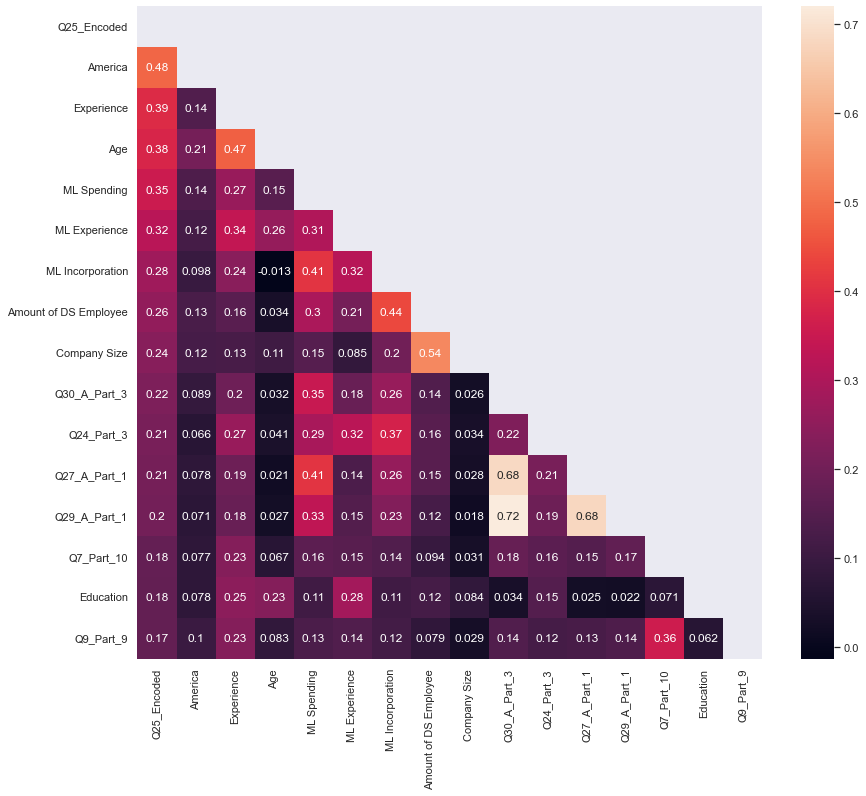

In [172]:
#Heat Map: 
# looking at the correlation between the features and the target variable using seaborn's 
# heatmap function. I masked the upper right triangle as it is identical to the lower left
# triangle. The diagonal is irrelevant as its the correlation of a feature with itself.

mask = np.zeros_like(DF_Top_corr.corr()*-1)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(14,12))
sns.heatmap(DF_Top_corr.corr(), mask=mask, annot=True)

As we can see, none of the features are highly correlated with one another. Correlation for each pair is below 0.75

Method 2: Using Random Forest Classifier 

In [173]:
DF_train.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
98             1          0          0          0          0          0   
13048          0          0          0          0          0          0   
10785          1          0          1          0          0          1   
11343          1          1          0          0          0          0   
7285           1          1          1          0          0          1   

       Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
98             0          0          0           1           0           0   
13048          0          0          0           0           0           0   
10785          0          0          0           0           0           0   
11343          0          0          0           1           0           0   
7285           0          1          0           0           0           0   

       Q7_OTHER  Q9_Part_1  Q9_Part_2  Q9_Part_3  Q9_Part_4  Q9_Part_5  \
98            0          0          0          0          1          0   
13048         0          0          0          0          0          0   
10785         0          0          0          0          0          0   
11343         0          1          1          0          0          0   
7285          0          1          0          1          1          0   

       Q9_Part_6  Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  \
98             0          0          0          1           0           0   
13048          0          0          0          0           0           0   
10785          0          0          0          0           0           1   
11343          1          0          0          1           0           1   
7285           1          0          0          0           0           1   

       Q9_Part_12  Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  \
98              0         0           0           0           0           0   
13048           0         0           0           0           0           0   
10785           0         0           0           0           0           0   
11343           0         0           1           0           0           0   
7285            0         0           0           0           1           0   

       Q10_Part_5  Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  \
98              0           0           0           0           0   
13048           0           0           0           0           0   
10785           0           0           0           0           1   
11343           0           0           0           0           0   
7285            0           0           0           1           0   

       Q10_Part_10  Q10_Part_11  Q10_Part_12  Q10_Part_13  Q10_Part_14  \
98               0            0            0            0            0   
13048            0            0            0            0            0   
10785            0            0            0            0            0   
11343            0            0            0            0            0   
7285             0            0            0            0            0   

       Q10_Part_15  Q10_Part_16  Q10_OTHER  Q12_Part_1  Q12_Part_2  \
98               0            1          0           0           0   
13048            0            0          0           0           0   
10785            0            0          0           0           0   
11343            0            0          0           1           0   
7285             0            0          0           1           0   

       Q12_Part_3  Q12_Part_4  Q12_Part_5  Q12_OTHER  Q14_Part_1  Q14_Part_2  \
98              0           0           1          0           0           0   
13048           0           0           0          0           0           0   
10785           0           1           0          0           1           1   
11343           0           0           0          0           1           0   
7285            0      

In [174]:
# Making a copy of the train dataset
DF_train_tree = DF_train.copy()

# Finding highly correlated features with one and another 
# The threshold 75% was recommended by the TA, as he stated in his tutorial if two variables
# have above 75% correlation, it is best practice to disregard one of them. The reason is if 
# two variable have 75% correlation they are including similar information and they wont add 
# any new information to our model
High_Corr_Features = corr_high_list(DF_train_tree, 0.75)
len(set(High_Corr_Features))   #Finding the amount of the highly correlated features 

4

In [175]:
# Finding the names of the highly correlated features 
High_Corr_Features

{'Q19_Part_4', 'Q29_B_Part_3', 'Q9_Part_2', 'Woman'}

In [176]:
# Dropping the highly correlated Features from the Training dataframe
DF_train_tree = DF_train_tree.drop(High_Corr_Features, axis =1)
DF_train_tree.head()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
98             1          0          0          0          0          0   
13048          0          0          0          0          0          0   
10785          1          0          1          0          0          1   
11343          1          1          0          0          0          0   
7285           1          1          1          0          0          1   

       Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
98             0          0          0           1           0           0   
13048          0          0          0           0           0           0   
10785          0          0          0           0           0           0   
11343          0          0          0           1           0           0   
7285           0          1          0           0           0           0   

       Q7_OTHER  Q9_Part_1  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
98            0          0          0          1          0          0   
13048         0          0          0          0          0          0   
10785         0          0          0          0          0          0   
11343         0          1          0          0          0          1   
7285          0          1          1          1          0          1   

       Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
98             0          0          1           0           0           0   
13048          0          0          0           0           0           0   
10785          0          0          0           0           1           0   
11343          0          0          1           0           1           0   
7285           0          0          0           0           1           0   

       Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
98            0           0           0           0           0           0   
13048         0           0           0           0           0           0   
10785         0           0           0           0           0           0   
11343         0           1           0           0           0           0   
7285          0           0           0           1           0           0   

       Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  \
98              0           0           0           0            0   
13048           0           0           0           0            0   
10785           0           0           0           1            0   
11343           0           0           0           0            0   
7285            0           0           1           0            0   

       Q10_Part_11  Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  \
98               0            0            0            0            0   
13048            0            0            0            0            0   
10785            0            0            0            0            0   
11343            0            0            0            0            0   
7285             0            0            0            0            0   

       Q10_Part_16  Q10_OTHER  Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  \
98               1          0           0           0           0           0   
13048            0          0           0           0           0           0   
10785            0          0           0           0           0           1   
11343            0          0           1           0           0           0   
7285             0          0           1           0           0           0   

       Q12_Part_5  Q12_OTHER  Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  \
98              1          0           0           0           0           0   
13048           0          0           0           0           0           0   
10785           0          0           1           1           1           0   
11343           0        

In [177]:
# Dropping columns that have a very close variance
# The number of threshold was selected based on the link the TA provided in Piazza
vt = VarianceThreshold (threshold = 0.001)     # Initiating the model for a threshold of 0.001
vt.fit_transform(DF_train_tree)                # Fitting and transforming the train data 

# Finding the names of the remaining features with a varaince greater than 0.001
Feature_list_Var = DF_train_tree.columns[vt.get_support()]

print("lenth of the new features", len(Feature_list_Var))

DF_train_tree_VarDrop = DF_train_tree [Feature_list_Var]
DF_train_tree_VarDrop.head()

lenth of the new features 398


Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
98             1          0          0          0          0          0   
13048          0          0          0          0          0          0   
10785          1          0          1          0          0          1   
11343          1          1          0          0          0          0   
7285           1          1          1          0          0          1   

       Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
98             0          0          0           1           0           0   
13048          0          0          0           0           0           0   
10785          0          0          0           0           0           0   
11343          0          0          0           1           0           0   
7285           0          1          0           0           0           0   

       Q7_OTHER  Q9_Part_1  Q9_Part_3  Q9_Part_4  Q9_Part_5  Q9_Part_6  \
98            0          0          0          1          0          0   
13048         0          0          0          0          0          0   
10785         0          0          0          0          0          0   
11343         0          1          0          0          0          1   
7285          0          1          1          1          0          1   

       Q9_Part_7  Q9_Part_8  Q9_Part_9  Q9_Part_10  Q9_Part_11  Q9_Part_12  \
98             0          0          1           0           0           0   
13048          0          0          0           0           0           0   
10785          0          0          0           0           1           0   
11343          0          0          1           0           1           0   
7285           0          0          0           0           1           0   

       Q9_OTHER  Q10_Part_1  Q10_Part_2  Q10_Part_3  Q10_Part_4  Q10_Part_5  \
98            0           0           0           0           0           0   
13048         0           0           0           0           0           0   
10785         0           0           0           0           0           0   
11343         0           1           0           0           0           0   
7285          0           0           0           1           0           0   

       Q10_Part_6  Q10_Part_7  Q10_Part_8  Q10_Part_9  Q10_Part_10  \
98              0           0           0           0            0   
13048           0           0           0           0            0   
10785           0           0           0           1            0   
11343           0           0           0           0            0   
7285            0           0           1           0            0   

       Q10_Part_11  Q10_Part_12  Q10_Part_13  Q10_Part_14  Q10_Part_15  \
98               0            0            0            0            0   
13048            0            0            0            0            0   
10785            0            0            0            0            0   
11343            0            0            0            0            0   
7285             0            0            0            0            0   

       Q10_Part_16  Q10_OTHER  Q12_Part_1  Q12_Part_2  Q12_Part_3  Q12_Part_4  \
98               1          0           0           0           0           0   
13048            0          0           0           0           0           0   
10785            0          0           0           0           0           1   
11343            0          0           1           0           0           0   
7285             0          0           1           0           0           0   

       Q12_Part_5  Q12_OTHER  Q14_Part_1  Q14_Part_2  Q14_Part_3  Q14_Part_4  \
98              1          0           0           0           0           0   
13048           0          0           0           0           0           0   
10785           0          0           1           1           1           0   
11343           0        

Plotting the feature importance for the data for all the feature minus the features that have high correlation and close variance 

Text(0, 0.5, 'Feature Names')

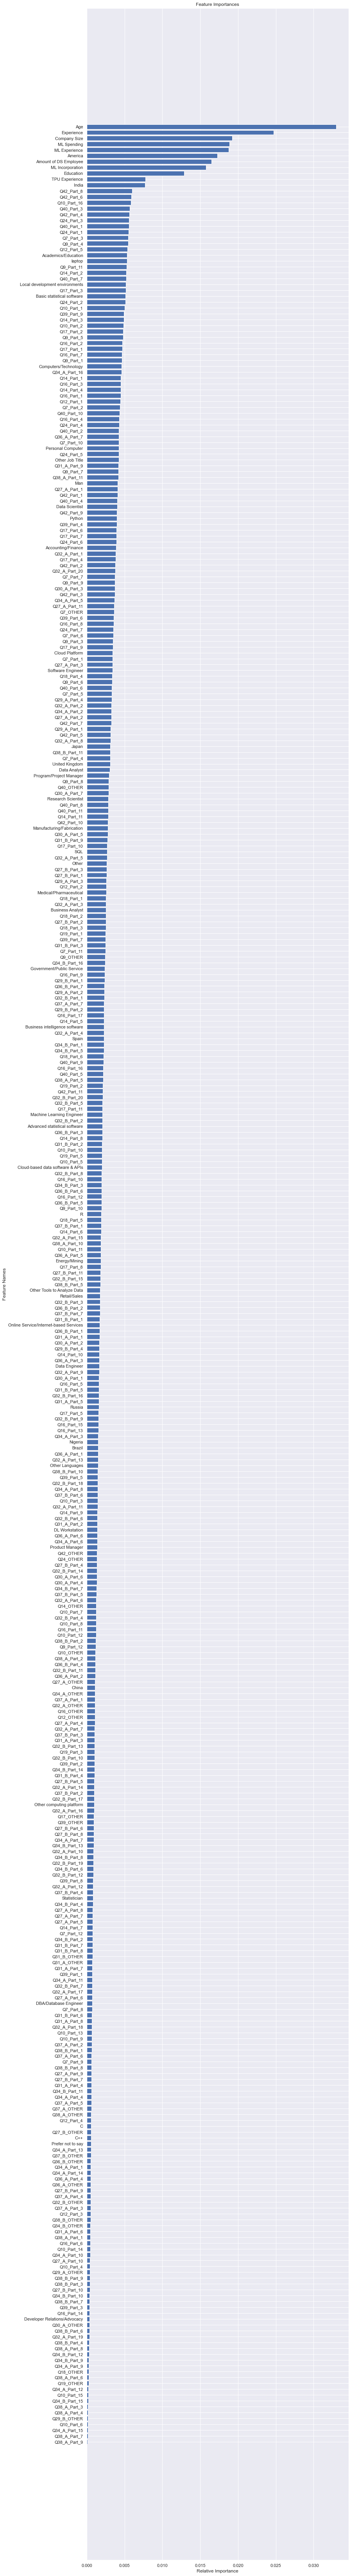

In [178]:
#************* STEP A ******************
# Defining the X and Y
Importance_DF = DF_train_tree_VarDrop.copy()
X = Importance_DF.drop("Q25_Encoded", axis=1)
y = Importance_DF["Q25_Encoded"]

# Defining the model
model_1 = RandomForestClassifier(random_state =1)
# Fitting the model
model_1.fit(X, y)
# Finding the importance of the dataset 
importances = model_1.feature_importances_

# Sorting the feature names in accordance to the importance of the features  
importance_name_sorted = [x for _, x in sorted(zip(importances, np.asarray(X.columns.tolist())))]

# Plotting the Feature Importance for all the variables 
fig,ax = plt.subplots(figsize=(12,120))
plt.barh(importance_name_sorted, np.sort(importances))
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')

In [179]:
# Making the X_train_tree and y_train_tree datasets for the RandomForestClassifier model
X_train_tree = DF_train_tree_VarDrop.drop("Q25_Encoded", axis=1)
y_train_tree = DF_train_tree_VarDrop["Q25_Encoded"]

# spliting the data to train and validation set in order to evaluate the model
X_train_test, X_val_tree, y_train_test, y_val_tree = train_test_split(X_train_tree, y_train_tree, 
                                                                      test_size=(4/17),\
                                                                      random_state=40) 
#Iniating the model
model_tree = RandomForestClassifier(n_estimators = 100, random_state = 1)
# Use RFE to delete the feature with the least importance
# Here I am looping through selecting 1 to 30 important features and finding the accuracy.
# This way I can be sure that the selected number of important features is the optimize amount.
Accuracy_list = []
for i in range (1, 30):
    rfe_tree = RFE(estimator = model_tree, n_features_to_select = i, step = 1) 
    X_train_rfe_tree = rfe_tree.fit_transform(X_train_test, y_train_test)

    # Finding the accurarcy of the model 
    y_pred_rfe = rfe_tree.predict(X_val_tree)
    Accuracy = metrics.accuracy_score(y_pred_rfe, y_val_tree)
    Accuracy_list.append(Accuracy)

print ("Max accuracy is:" , max(Accuracy_list))
print ("The max accuracy corresponds to", (Accuracy_list.index(max(Accuracy_list)))+1,\
       "number of features")

Max accuracy is: 0.44494304452882294
The max accuracy corresponds to 24 number of features


In [180]:
# Finding all the features using the founded optimize number of features from above

rfe_tree = RFE(estimator = model_tree, n_features_to_select = 24, step = 1) 
rfe_tree.fit_transform(X_train_tree, y_train_tree)

# Returns a boolen list with "TRUE" for the top 10 features 
rfe_tree.get_support()

# Finding the number of selected features:
Tree_Feature = [column for column in X_train_tree.columns if column in \
                X_train_tree.columns[rfe_tree.get_support()]]

In [181]:
# Printing the list of the most important features 
Tree_Feature

['Q7_Part_3',
 'Q9_Part_4',
 'Q9_Part_11',
 'Q10_Part_1',
 'Q14_Part_2',
 'Q16_Part_2',
 'Q24_Part_1',
 'Q24_Part_2',
 'Q40_Part_1',
 'Q40_Part_3',
 'Q40_Part_7',
 'Q42_Part_4',
 'Q42_Part_6',
 'Age',
 'America',
 'Education',
 'Experience',
 'TPU Experience',
 'ML Experience',
 'Company Size',
 'Amount of DS Employee',
 'ML Incorporation',
 'ML Spending',
 'Local development environments']

In [182]:
# Finding the index of all the most important features in the DataFrame X (DF before dropping 
# correlation and variance). This is done to find the .feature_importances_ of the most 
# important features from the original ".feature_importances_" in STEP A above. 

All_Col = X.columns.tolist() # Converting all the feature names to a list
idx_Tree_Feature = []

# Finding the index of elements in "Tree_Feature" in dataframe X in Step A (4 lines above)
for i in range(len(All_Col)):
    if All_Col[i] in Tree_Feature:
        idx_Tree_Feature.append(i)

Text(0, 0.5, 'Feature Names')

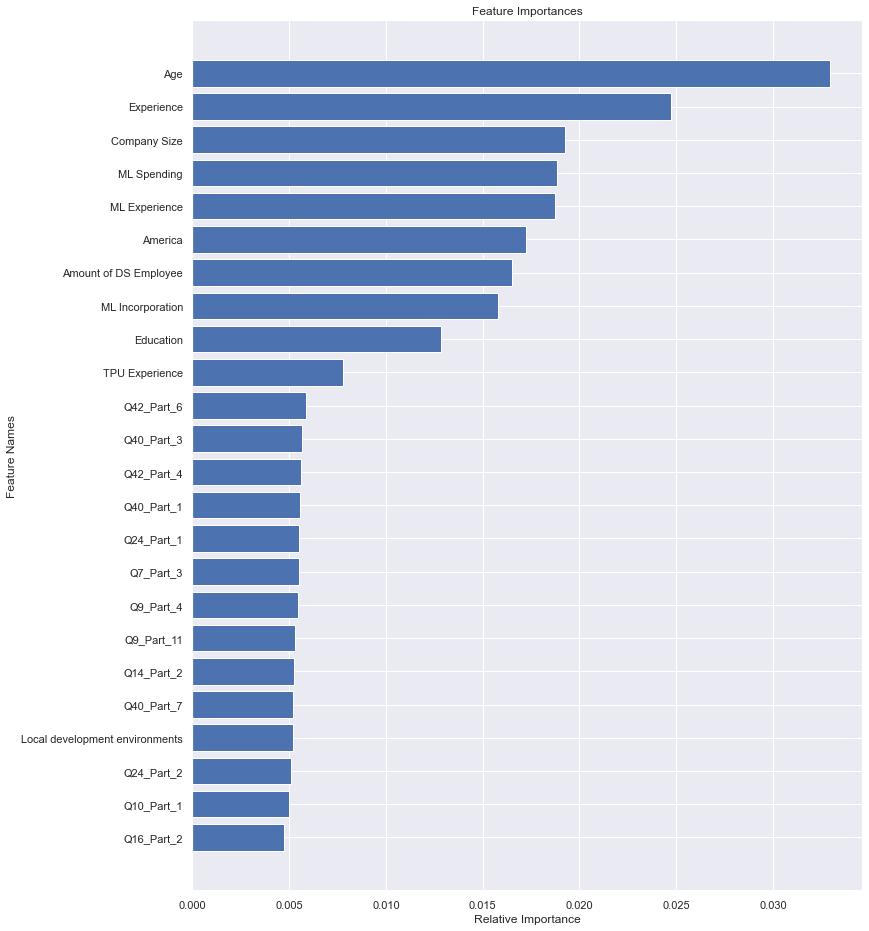

In [183]:
# Plotting the feature importance of the top feature founded by the RFE method

# Defining the model
model_1 = RandomForestClassifier(random_state= 1)
# Fitting the model
model_1.fit(X, y)
# Finding the importance of the dataset 
importances = model_1.feature_importances_
importances_top_features = importances[idx_Tree_Feature]
importance_name = np.asarray(Tree_Feature)

# Sorting the feature names in accordance to the importance of the features  
importance_name_sorted = [x for _, x in sorted(zip(importances_top_features, importance_name))]

fig,ax = plt.subplots(figsize=(12,16))
plt.barh(importance_name_sorted, np.sort(importances_top_features))
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')

In [184]:
Tree_Feature.append("Q25_Encoded")
DF_tree_3 = DF_train[Tree_Feature]
DF_tree_3

Q7_Part_3  Q9_Part_4  Q9_Part_11  Q10_Part_1  Q14_Part_2  Q16_Part_2  \
98             0          1           0           0           0           0   
13048          0          0           0           0           0           0   
10785          1          0           1           0           1           0   
11343          0          0           1           1           0           0   
7285           1          1           1           0           1           1   
...          ...        ...         ...         ...         ...         ...   
905            0          0           1           0           0           0   
5192           0          0           1           0           0           0   
12172          0          1           0           0           0           0   
235            0          1           1           0           0           0   
13349          0          1           1           0           1           0   

       Q24_Part_1  Q24_Part_2  Q40_Part_1  Q40_Part_3  Q40_Part_7  Q42_Part_4  \
98              0           1           0           0           1           1   
13048           0           1           1           0           1           1   
10785           0           1           0           0           0           1   
11343           0           1           0           1           1           1   
7285            1           1           1           0           1           1   
...           ...         ...         ...         ...         ...         ...   
905             0           1           0           1           0           0   
5192            0           0           0           1           0           1   
12172           0           0           0           0           1           0   
235             1           1           0           0           0           0   
13349           1           0           0           1           0           0   

       Q42_Part_6  Age  America  Education  Experience  TPU Experience  \
98              1  3.0        0        2.0         1.0             0.0   
13048           1  3.0        0        4.0         0.0             0.0   
10785           0  2.0        0        4.0         4.0             0.0   
11343           1  2.0        1        4.0         2.0             0.0   
7285            1  6.0        1        4.0         2.0             0.0   
...           ...  ...      ...        ...         ...             ...   
905             0  1.0        0        2.0         2.0             0.0   
5192            0  5.0        1        6.0         6.0             0.0   
12172           0  3.0        0        4.0         2.0             0.0   
235             0  0.0        0        4.0         1.0             1.0   
13349           0  2.0        0        3.0         1.0             0.0   

       ML Experience  Company Size  Amount of DS Employee  ML Incorporation  \
98               0.0           1.0                    1.0               1.0   
13048            5.0           2.0                    3.0               5.0   
10785            1.0           1.0                    3.0               4.0   
11343            2.0           4.0                    6.0               4.0   
7285             2.0           4.0                    6.0               5.0   
...              ...           ...                    ...               ...   
905              2.0           0.0                    1.0               2.0   
5192             3.0           2.0                    3.0               1.0   
12172            0.0           4.0                    0.0               2.0   
235              1.0           1.0                    3.0               2.0   
13349            1.0           1.0                    1.0               2.0   

       ML Spending  Local development environments  Q25_Encoded  
98             0.0                             0.0          2.0  
13048          0.0                             0.0          0.0  
10785          2.0                             0.

<AxesSubplot:>

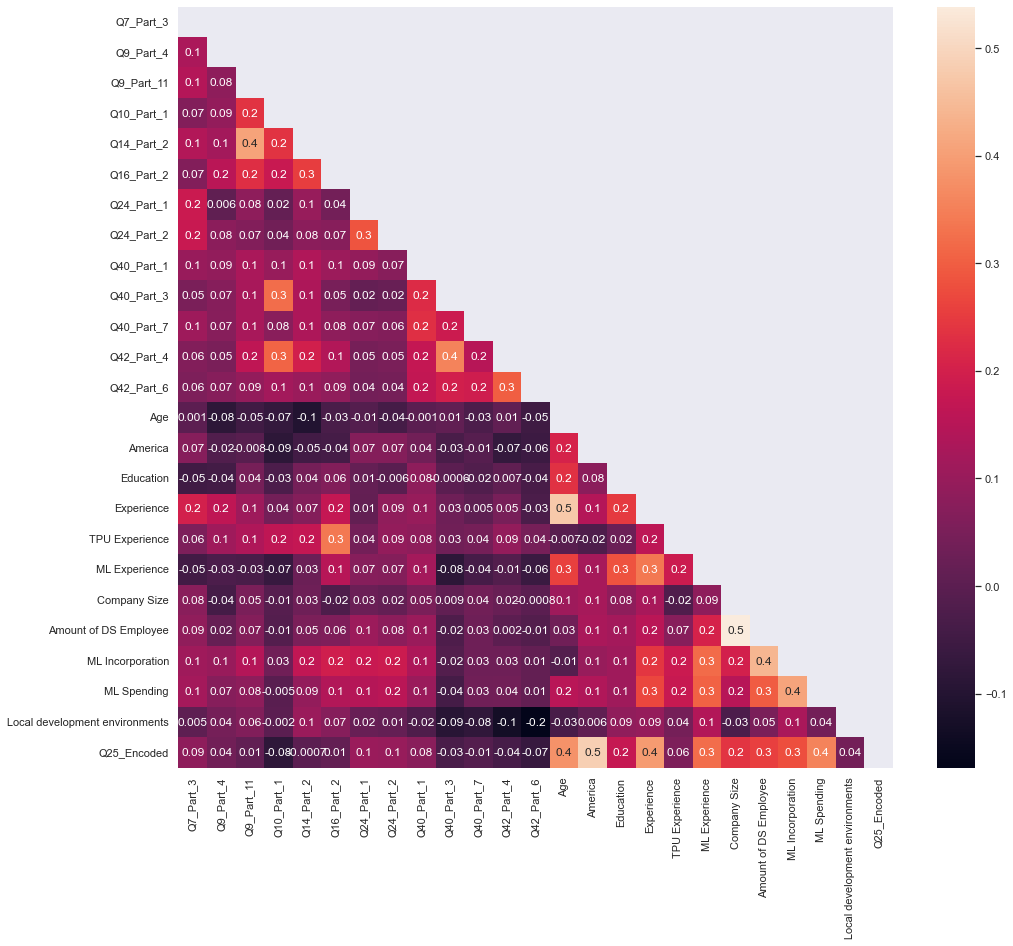

In [185]:
#Heat Map: 
# looking at the correlation between the features and the target variable using seaborn's 
# heatmap function. I masked the upper right triangle as it is identical to the lower left
# triangle. The diagonal is irrelevant as its the correlation of a feature with itself.

mask = np.zeros_like(DF_tree_3.corr()*-1)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(16,14))
sns.heatmap(DF_tree_3.corr(), mask=mask, annot=True, fmt='0.1g')

In [186]:
Method_1_Features = DF_Top_corr.columns.tolist()
print("Method 1 Feature Names:", Method_1_Features)

Method_2_Features = DF_tree_3.columns.tolist()
print("Method 2 Feature Names:", Method_2_Features)

Method 1 Feature Names: ['Q25_Encoded', 'America', 'Experience', 'Age', 'ML Spending', 'ML Experience', 'ML Incorporation', 'Amount of DS Employee', 'Company Size', 'Q30_A_Part_3', 'Q24_Part_3', 'Q27_A_Part_1', 'Q29_A_Part_1', 'Q7_Part_10', 'Education', 'Q9_Part_9']
Method 2 Feature Names: ['Q7_Part_3', 'Q9_Part_4', 'Q9_Part_11', 'Q10_Part_1', 'Q14_Part_2', 'Q16_Part_2', 'Q24_Part_1', 'Q24_Part_2', 'Q40_Part_1', 'Q40_Part_3', 'Q40_Part_7', 'Q42_Part_4', 'Q42_Part_6', 'Age', 'America', 'Education', 'Experience', 'TPU Experience', 'ML Experience', 'Company Size', 'Amount of DS Employee', 'ML Incorporation', 'ML Spending', 'Local development environments', 'Q25_Encoded']


In [187]:
# Combining the unique features from each list 
# The DataFrame containing this amount of features will be considered for the input for the 
# Final DataFrame 
unique = list(set(Method_1_Features + Method_2_Features))
len(unique)

31

In [188]:
Final_Features = DF_train[unique]
Final_Features.head()

Q7_Part_10  Amount of DS Employee  Q29_A_Part_1  Education  America  \
98              1                    1.0             0        2.0        0   
13048           0                    3.0             0        4.0        0   
10785           0                    3.0             1        4.0        0   
11343           1                    6.0             0        4.0        1   
7285            0                    6.0             1        4.0        1   

       Q9_Part_9  Q9_Part_4  Q16_Part_2  Q40_Part_1  Q40_Part_3  Q25_Encoded  \
98             1          1           0           0           0          2.0   
13048          0          0           0           1           0          0.0   
10785          0          0           0           0           0          1.0   
11343          1          0           0           0           1          3.0   
7285           0          1           1           1           0         11.0   

       Q42_Part_4  Local development environments  ML Experience  Q40_Part_7  \
98              1                             0.0            0.0           1   
13048           1                             0.0            5.0           1   
10785           1                             0.0            1.0           0   
11343           1                             1.0            2.0           1   
7285            1                             0.0            2.0           1   

       Q42_Part_6  Experience  Q30_A_Part_3  Company Size  Q14_Part_2  \
98              1         1.0             0           1.0           0   
13048           1         0.0             0           2.0           0   
10785           0         4.0             1           1.0           1   
11343           1         2.0             0           4.0           0   
7285            1         2.0             0           4.0           1   

       TPU Experience  Q7_Part_3  ML Incorporation  Q9_Part_11  Q10_Part_1  \
98                0.0          0               1.0           0           0   
13048             0.0          0               5.0           0           0   
10785             0.0          1               4.0           1           0   
11343             0.0          0               4.0           1           1   
7285              0.0          1               5.0           1           0   

       Q27_A_Part_1  ML Spending  Age  Q24_Part_3  Q24_Part_1  Q24_Part_2  
98                0          0.0  3.0           0           0           1  
13048             0          0.0  3.0           1           0           1  
10785             1          2.0  2.0           0           0           1  
11343             0          4.0  2.0           1           0           1  
7285              1          3.0  6.0           1           1           1

In [189]:
Final_Features.shape

(12312, 31)

In [190]:
# Self Check
High_Corr_Features = corr_high_list(Final_Features, 0.75)
len(set(High_Corr_Features))   #Finding the amount of the highly correlated features 

0

<AxesSubplot:>

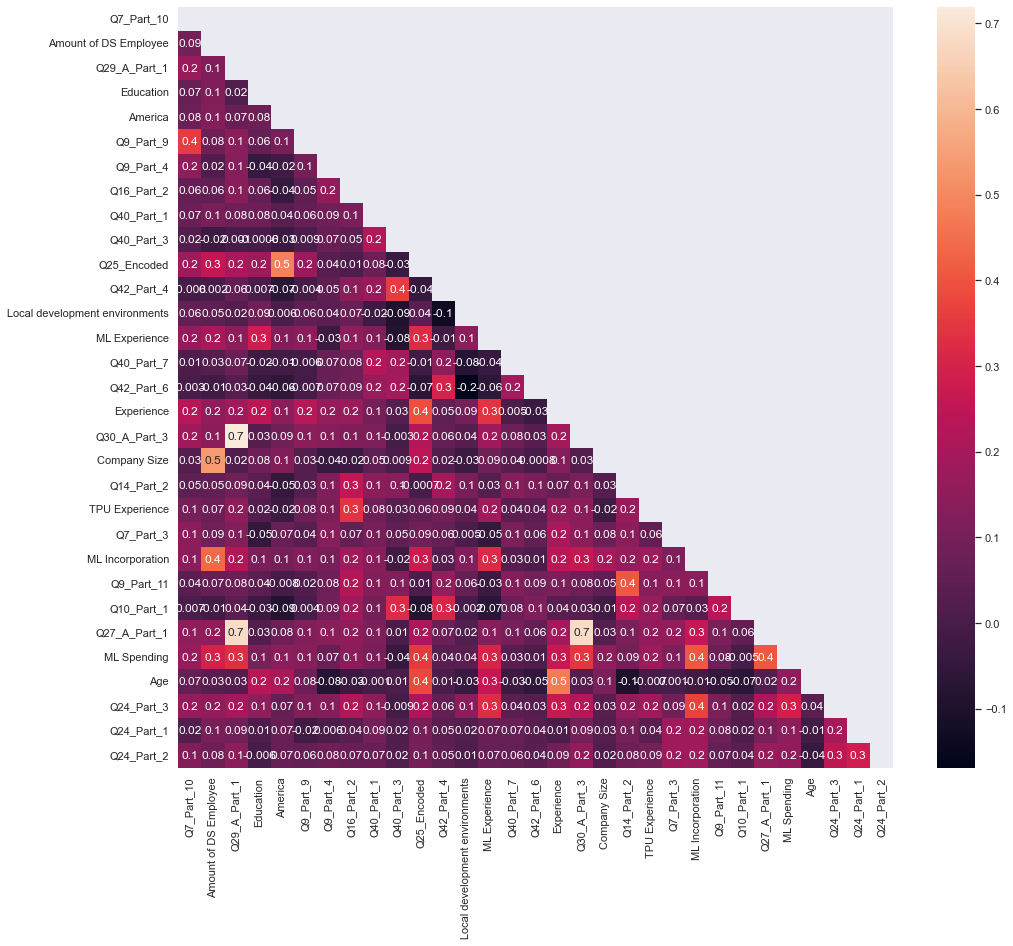

In [191]:
# Self Check: Heat map, making sure no features have a correlation above 0.75
mask = np.zeros_like(Final_Features.corr()*-1)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(16,14))
sns.heatmap(Final_Features.corr(), mask=mask, annot=True, fmt='0.1g')

We perform feature selection because removing irrelevant features results in a better performing model (impoves accuracy) as there is less noise and reduces the model dimensions. In addition, the model becomes easier to understand (improves interpretability) and reduces the execution time of the model (model runs faster). By doing this we can optimize our model and prevent learning from noise (prevent overfitting). 

### Step 3: Model Implementation

In [192]:
# Finding the amount of classes in the Target variable 
np.sort(DF_Top_corr["Q25_Encoded"].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#set up cross validation
def run_kfold(model):
    
    # Train dataset: 
    X = Final_Features.drop("Q25_Encoded", axis = 1)
    Y = Final_Features[["Q25_Encoded"]]
    
    Y['Q25_Encoded'] = Y['Q25_Encoded'].astype(float).astype(int)
    
    kf = KFold(n_splits=10) #n_splits previously n_folds
    
    # Accuracy list to house all the different accuracies across the different folds
    Accuracy_List_Train = []
    Accuracy_List_val = []
    fold = 0
    
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y.values[train_index], Y.values[test_index]
        
        # Scaling/standarizing the features 
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model.fit(X_train, Y_train)
        Trian_predictions = model.predict(X_train)
        
        # Finding the amount of unique target variables 
        Amount_Labels = len(Y["Q25_Encoded"].unique())
        
        # Creating array of zeros for the logistic regression 
        Y_Bucket_0_1 = np.zeros(Y_train.shape)
        # Empty array to house the probabilities of the different buckets 
        Bucket_Probabilities = np.zeros((Y_test.shape[0] ,Amount_Labels))
        
        # This array is made and used so we can substract the previous step's probability to obtain 
        # the probability of that respected class at the step 
        Bucket_0 = np.zeros(len(Y_test))
    
      
        for i in range (0, Amount_Labels-1): # Iterations equals length minus 1
            
            # Creating binary classification buckets for the multiple classification buckets
            Y_Bucket_0_1 = np.where(Y_train<=i, 0, 1)
            
            model.fit(X_train, Y_Bucket_0_1) # Model will be Sklearns binary logistic regression as per prof lecture notes
            
            # Finding the probability of teh bucket 0 and 1
            Binary_Bucket_probability = model.predict_proba(X_test)
            Binary_Bucket_prob_0 = Binary_Bucket_probability[:,0]
            
            # Probability of the element being in class 1 is 1 - the probability of the element
            # being in class 0, as the sum of the probability of class 1 + class 0 should be 1 
            Binary_Bucket_prob_1 = abs(Binary_Bucket_prob_0-1)
            
            # Housing the bucket probability for the different salary buckets 
            Bucket_Probabilities [:,i] = Binary_Bucket_prob_0 - Bucket_0
            Bucket_0 = np.copy(Binary_Bucket_prob_0)
            if i==13: 
                # Finding and storing the probabilirt of the last class 
                Bucket_Probabilities[:,-1] = Binary_Bucket_prob_1
            
        Bucket_Probability_1 = [] # Each value in the list will be the average value of all
                                  # the probabilities for that bucket
        
        # Finding the average probabulity for each bucket 
        k = 0 
        while k < Amount_Labels:
            Bucket_Probability_1.append(np.mean(Bucket_Probabilities[:,k], axis = 0))
            k += 1 
        
        print ("Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):")
        print (Bucket_Probability_1)

        target_pred = []
        # Finding the index of the maximum probability in each row in order to know which
        # bucket (0 to 14) is most likely our prediction 
        for i in range (0, Bucket_Probabilities.shape[0]):
            max_index = Bucket_Probabilities[i,:].tolist().index(max(Bucket_Probabilities[i,:].tolist()))
            target_pred.append (max_index)
        target_pred = np.asarray(target_pred)
        
        # Calculating the accuracy for the train dataset 
        
        Accuracy_Train = accuracy_score(Y_train,Trian_predictions)
        Accuracy_List_Train.append(Accuracy_Train)
        
        # Calculating the accuracies based on the the founded target_pred
        accuracy_val = accuracy_score(Y_test, target_pred) 
        Accuracy_List_val.append(accuracy_val)
        print("Fold {0} Validation Accuracy: {1}".format(fold, accuracy_val))
        print("---------------------------------------------------------------------")

    print("-------------------------------Trian Data------------------------")
    mean_accuracy_train = np.mean(Accuracy_List_Train)
    print("Mean Train Accuracy Across 10 folds: {0}".format(mean_accuracy_train)) 
    std_accuracy_train=np.std(Accuracy_List_Train)
    print("Train Standard Deviation: {0}".format(std_accuracy_train)) 
    var_accuracy_train=np.var(Accuracy_List_Train)
    print("Train Variance: {0}".format(var_accuracy_train))
    print("-------------------------------Validation Data-----------------")
    mean_accuracy_val = np.mean(Accuracy_List_val)
    print("Validation Mean Accuracy Across 10 folds: {0}".format(mean_accuracy_val)) 
    std_accuracy_val=np.std(Accuracy_List_val)
    print("Validation Standard Deviation: {0}".format(std_accuracy_val)) 
    var_accuracy_val=np.var(Accuracy_List_val)
    print("Validation Variance: {0}".format(var_accuracy_val)) 

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#set up cross validation
def run_kfold(model):
    
    # Train dataset: 
    X = Final_Features.drop("Q25_Encoded", axis = 1)
    Y = Final_Features[["Q25_Encoded"]]
    
    Y['Q25_Encoded'] = Y['Q25_Encoded'].astype(float).astype(int)
    
    kf = KFold(n_splits=10) #n_splits previously n_folds
    
    # Accuracy list to house all the different accuracies across the different folds
    Accuracy_List_Train = []
    Accuracy_List_val = []
    fold = 0
    
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y.values[train_index], Y.values[test_index]
        
        # Scaling/standarizing the features 
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model.fit(X_train, Y_train)
        Trian_predictions = model.predict(X_train)
        
        # Finding the amount of unique target variables 
        Amount_Labels = len(Y["Q25_Encoded"].unique())
        
        # Creating array of zeros for the logistic regression 
        Y_Bucket_0_1 = np.zeros(Y_train.shape)
        # Empty array to house the probabilities of the different buckets 
        Bucket_Probabilities = np.zeros((Y_test.shape[0] ,Amount_Labels))
        Bucket_Probabilities_Train = np.zeros((Y_train.shape[0] ,Amount_Labels))

        # This array is made and used so we can substract the previous step's probability to obtain 
        # the probability of that respected class at the step 
        Bucket_0 = np.zeros(len(Y_test))
        Bucket_0_Train = np.zeros(len(Y_train))    
      
        for i in range (0, Amount_Labels-1): # Iterations equals length minus 1
            
            # Creating binary classification buckets for the multiple classification buckets
            Y_Bucket_0_1 = np.where(Y_train<=i, 0, 1)

            model.fit(X_train, Y_Bucket_0_1) # Model will be Sklearns binary logistic regression as per prof lecture notes

            # Finding the probability of the bucket 0 and 1 for the train data
            Binary_Bucket_probability_Train = model.predict_proba(X_train)
            Binary_Bucket_prob_0_Train = Binary_Bucket_probability_Train[:,0]

            # For Train data: Probability of the element being in class 1 is 1 - the probability of the element
            # being in class 0, as the sum of the probability of class 1 + class 0 should be 1 
            Binary_Bucket_prob_1_Train = abs(Binary_Bucket_prob_0_Train-1) 

            # For Train data: Housing the bucket probability for the different salary buckets
            Bucket_Probabilities_Train [:,i] = Binary_Bucket_prob_0_Train - Bucket_0_Train
            Bucket_0_Train = np.copy(Binary_Bucket_prob_0_Train)
            if i==13: 
                # Finding and storing the probabilirt of the last class 
                Bucket_Probabilities_Train[:,-1] = Binary_Bucket_prob_1_Train
            
            # For Validation Set
            # Finding the probability of teh bucket 0 and 1
            Binary_Bucket_probability = model.predict_proba(X_test)
            Binary_Bucket_prob_0 = Binary_Bucket_probability[:,0]
            
            # Probability of the element being in class 1 is 1 - the probability of the element
            # being in class 0, as the sum of the probability of class 1 + class 0 should be 1 
            Binary_Bucket_prob_1 = abs(Binary_Bucket_prob_0-1)
            
            # Housing the bucket probability for the different salary buckets 
            Bucket_Probabilities [:,i] = Binary_Bucket_prob_0 - Bucket_0
            Bucket_0 = np.copy(Binary_Bucket_prob_0)
            if i==13: 
                # Finding and storing the probabilirt of the last class 
                Bucket_Probabilities[:,-1] = Binary_Bucket_prob_1
        
        Bucket_Probability_1_Train = []
        Bucket_Probability_1 = [] # Each value in the list will be the average value of all
                                  # the probabilities for that bucket
        
        # Finding the average probabulity for each bucket 
        k = 0 
        while k < Amount_Labels:
            Bucket_Probability_1.append(np.mean(Bucket_Probabilities[:,k], axis = 0))
            k += 1 
        print ("For Validation Data:")
        print ("Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):")
        print (Bucket_Probability_1)
        
        k = 0
        while k < Amount_Labels:
            Bucket_Probability_1_Train.append(np.mean(Bucket_Probabilities_Train[:,k], axis = 0))
            k += 1 

        target_pred_Val = []
        # Finding the index of the maximum probability in each row in order to know which
        # bucket (0 to 14) is most likely our prediction 
        for i in range (0, Bucket_Probabilities.shape[0]):
            max_index = Bucket_Probabilities[i,:].tolist().index(max(Bucket_Probabilities[i,:].tolist()))
            target_pred_Val.append (max_index)
        target_pred_Val = np.asarray(target_pred_Val)
        
        target_pred_Train = []
        # Finding the index of the maximum probability in each row in order to know which
        # bucket (0 to 14) is most likely our prediction for the train data
        for i in range (0, Bucket_Probabilities_Train.shape[0]):
            max_index = Bucket_Probabilities_Train[i,:].tolist().index(max(Bucket_Probabilities_Train[i,:].tolist()))
            target_pred_Train .append (max_index)
        target_pred_Train = np.asarray(target_pred_Train)
        # Calculating the accuracy for the train dataset 
        
        Accuracy_Train = accuracy_score(Y_train, target_pred_Train)
        Accuracy_List_Train.append(Accuracy_Train)
        
        # Calculating the accuracies based on the the founded target_pred
        accuracy_val = accuracy_score(Y_test, target_pred_Val) 
        Accuracy_List_val.append(accuracy_val)
        print("Fold {0} Validation Accuracy: {1}".format(fold, accuracy_val))
        print("---------------------------------------------------------------------")

    print("-------------------------------Trian Data------------------------")
    mean_accuracy_train = np.mean(Accuracy_List_Train)
    print("Mean Train Accuracy Across 10 folds: {0}".format(mean_accuracy_train)) 
    std_accuracy_train=np.std(Accuracy_List_Train)
    print("Train Standard Deviation: {0}".format(std_accuracy_train)) 
    var_accuracy_train=np.var(Accuracy_List_Train)
    print("Train Variance: {0}".format(var_accuracy_train))
    print("-------------------------------Validation Data-----------------")
    mean_accuracy_val = np.mean(Accuracy_List_val)
    print("Validation Mean Accuracy Across 10 folds: {0}".format(mean_accuracy_val)) 
    std_accuracy_val=np.std(Accuracy_List_val)
    print("Validation Standard Deviation: {0}".format(std_accuracy_val)) 
    var_accuracy_val=np.var(Accuracy_List_val)
    print("Validation Variance: {0}".format(var_accuracy_val)) 

In [195]:
# Initiating the logisitic regression model with all the default parameters
# Model 0:
LR_M0 = LogisticRegression(random_state=0)
LR_M0_Info = run_kfold(LR_M0)

For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.4489174869819166, 0.09984635812869304, 0.06928407877823486, 0.04962197965854746, 0.043991684340704613, 0.046070453112910165, 0.036064237514709704, 0.029996037133728407, 0.024542163784375456, 0.02288642068084659, 0.045869694703633355, 0.024486011654112447, 0.026103920653223176, 0.019224044389666836, 0.013095428484697353]
Fold 1 Validation Accuracy: 0.4650974025974026
---------------------------------------------------------------------
For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.45956261876570165, 0.09832826915390788, 0.06811327859134425, 0.049833577787222916, 0.04461823752705793, 0.045255737471780556, 0.03661619979742513, 0.029311750113869217, 0.024154487051305264, 0.022222153783122527, 0.04492248721407223, 0.025193192934513355, 0.024258127491832822, 0.016815527186736297, 0.0

The accuracies across the 10 folds varied approximately by 3-4%. 

Exploring Different Hyperparameters 

In [196]:
# Model 1: 
LR_M1 = LogisticRegression(penalty="l2", C =100, solver= "sag", random_state=0)
LR_M1_Info = run_kfold(LR_M1)

For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.44891843838451584, 0.09984299202746744, 0.06928761856465036, 0.04961341968971405, 0.04399726203493219, 0.04607018468237168, 0.036068626134846266, 0.02999575716817318, 0.024539242088171886, 0.022889046938611556, 0.04586669665069695, 0.02447938586406606, 0.02609913968529012, 0.019227218953732115, 0.01310497113276026]
Fold 1 Validation Accuracy: 0.4659090909090909
---------------------------------------------------------------------
For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.4595609857579642, 0.09833463837197946, 0.06811059849092445, 0.04983199636470912, 0.04462014204799772, 0.04525494630276639, 0.036621317726516986, 0.029309459686545487, 0.024150236618416688, 0.022225890820495708, 0.044912771879478265, 0.025196901638294474, 0.024258159542945287, 0.016820512002924844, 0.0107914

In [197]:
# Model 2: 
LR_M2 = LogisticRegression(penalty="l1", C =5000, solver= "liblinear", random_state=0)
LR_M2_Info = run_kfold(LR_M2)

For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.4489195178617301, 0.0998452653794153, 0.06928388405657088, 0.04961883511702224, 0.0439925992714948, 0.04606730998945914, 0.0360699550086629, 0.02999539574141593, 0.024542121310858412, 0.022884458852653486, 0.04586975836205839, 0.024480682042763775, 0.026098763713340797, 0.019227428171504985, 0.01310402512104888]
Fold 1 Validation Accuracy: 0.4659090909090909
---------------------------------------------------------------------
For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.4595680772118965, 0.09832566126403289, 0.06811339290471784, 0.049832242677174225, 0.04461487383460805, 0.045257973485437225, 0.03661793510028314, 0.029311842957506634, 0.02415333267104679, 0.022221265046302723, 0.04492058603845445, 0.02519345332355145, 0.02425703771713557, 0.01682042883583199, 0.01079189693202

In [198]:
# Model 3: 
LR_M3 = LogisticRegression(penalty="l1", C =10000, solver= "liblinear", random_state=0)
LR_M3_Info = run_kfold(LR_M3)

For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.4489195082665949, 0.09984528388993491, 0.06928388266263637, 0.04961883485198508, 0.04399259914493213, 0.046067310887698915, 0.03606995473460095, 0.029995396149568213, 0.0245421205042417, 0.02288445894254672, 0.04586975781563775, 0.024480678995668706, 0.02609876309897878, 0.019227430729126003, 0.013104019325848952]
Fold 1 Validation Accuracy: 0.4659090909090909
---------------------------------------------------------------------
For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.45956806894036, 0.0983256789963186, 0.06811339267413356, 0.04983224175418187, 0.04461487338430557, 0.04525797233944775, 0.03661793676922164, 0.02931184279075391, 0.024153333062839438, 0.022221268128879465, 0.044920584725440735, 0.025193453309658147, 0.024257035954383086, 0.016820433275477973, 0.0107918838945

In [199]:
# Model 4: 
LR_M4 = LogisticRegression(penalty="l2", C =0.1, solver= "newton-cg", random_state=0)
LR_M4_Info = run_kfold(LR_M4)

For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.44891215682125013, 0.09985171053191524, 0.0692872792051626, 0.04962070682025169, 0.04399503723154701, 0.04607204546930153, 0.03607044073077064, 0.029990285970373353, 0.02454278617860951, 0.02289084961312634, 0.045891125245894775, 0.024509741897194365, 0.02614163881749353, 0.019197540631941967, 0.013026654835167385]
Fold 1 Validation Accuracy: 0.4659090909090909
---------------------------------------------------------------------
For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.45954031667262146, 0.09832878412127097, 0.06812017582483801, 0.0498316671601064, 0.04461825172687006, 0.04526106073846347, 0.036618756482582906, 0.02931052139903746, 0.024155877141878734, 0.022227652105892944, 0.04493995344795781, 0.025194274659957144, 0.02426554935531136, 0.016773898210749757, 0.0108132609

In [200]:
# Model 5: 
LR_M5 = LogisticRegression(penalty="l2", C =100, solver= "newton-cg", random_state=0)
LR_M5_Info = run_kfold(LR_M5)

For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.4489177363363569, 0.09984642266193465, 0.06928467723173404, 0.04961987452451418, 0.04399288895936236, 0.04606627147685811, 0.036069627963731664, 0.029995478644079757, 0.02454223987217632, 0.0228844627847587, 0.04586908318608091, 0.024480978039036646, 0.026098906076581007, 0.019227406800041577, 0.013103945442753185]
Fold 1 Validation Accuracy: 0.4659090909090909
---------------------------------------------------------------------
For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.4595652732549073, 0.09832878390036531, 0.06811293104643805, 0.049833865362163214, 0.044613105604588324, 0.045257256079185716, 0.03661912097351554, 0.029311993357313937, 0.024153388429254526, 0.022220891991936262, 0.044920615736628755, 0.02519357404404146, 0.02425698822048098, 0.016820316811731077, 0.0107918

From the 6 models above I concluded that the validation accuracy varies slightly among all 6 model with model 4 achieving the highest accuracy. This is expected as logistic models unlike other machine learning models (e.g., multi-layer perceptron) does not really have any critical hyperparameters to tune.

### Step #4: Model Tuning

##### Identify all hyperparameters in your model.

With reference to Scikit Learn the following are the hyperparameters of Logisitic Regression: 

1- penalty: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’

2- dual: bool, default=False
    
3 - tol: float, default=1e-4
    
4- C: float, default=1.0
    
5- fit_intercept: bool, default=True

6- intercept_scaling: float, default=1

7- class_weight: dict or ‘balanced’, default=None

8- solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

9- max_iter: int, default=100

10- verbose: int, default=0

11- warm_start: bool, default=False

12- n_jobs: int, default=None

13- l1_ratio: float, default=None


#### Selecting two hyperparameters for model tuning based on the following reasons.

I selected C and solver for my two hyper parameters to tune the model.

1- C: This is our regularization parameter (1/λ). The balance between letting the model increase it's complexity with trying to keep it simple is regulated λ (i.e., if λ=0 -> model tend to overfit & if λ is too big -> model tend to underfit). C and λ have inverse relationship and therefore work oppositely. If C is a small value, the regularization strength is increased which creates simple models which may underfit the data. If C is a large value, the strength of regularization decrease which means the model is allowed to increase it's complexity, and may overfit the data.


2- solver: Sk-learn has five (‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’) unique solvers. The purpose of each solver is to locate the parameter weights that minimizes the cost function. 


F1 score was selected for finding the optimal model

In cases of imbalanced data, accuracy can be misleading, since even in high accuracies models, the accuracy metric tends to ignore the minority class which we wish to predict accurately. Better metrics to use in the case of imbalanced data would be precision, recall or F1 score. F1 score is a combination of precision (how many predicted samples are relevant) and recall (how well the model can predict all of the interested samples). F1 score considers both the prediction errors of the model as well as the type of errors that the model makes. Therefore, F1 score is the best metric to measure imbalanced data sets performance. 

In [201]:
# Defining a function to find the optimal model using F1_score
from sklearn.metrics import f1_score

X = Final_Features.drop("Q25_Encoded", axis = 1)
Y = Final_Features[["Q25_Encoded"]]
Y['Q25_Encoded'] = Y['Q25_Encoded'].astype(float).astype(int)

model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

# Defining variables used in codes below
best_model = model
best_params = {}
best_F1 = 0
best_std = 0
F1_List = []

# Looping through potential values of C and Solver to find the optimal hyper parameters 
for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100, 1000]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        F1 = np.zeros(10)
        np_idx = 0

        for train_idx, test_idx in kfold.split(X):
            
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            Y_train, Y_test = Y.values[train_idx], Y.values[test_idx]

            # Scaling/standarizing the features 
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model.fit(X_train, Y_train)
            predictions = model.predict(X_test)
            
            # Finding the amount of unique target variables 
            Amount_Labels = len(Y["Q25_Encoded"].unique())

            # Creating array of zeros for the logistic regression 
            Y_Bucket_0_1 = np.zeros(Y_train.shape)
            # Empty array to house the probabilities of the different buckets 
            Bucket_Probabilities = np.zeros((Y_test.shape[0] ,Amount_Labels))
            
            # This array is made and used so we can substract the previous step's probability to obtain 
            # the probability of that respected class at the step 
            Bucket_0 = np.zeros(len(Y_test))

            for i in range (0, Amount_Labels-1): # Iterations equals length minus 1

                # Creating binary classification buckets for the multiple classification buckets
                Y_Bucket_0_1 = np.where(Y_train<=i, 0, 1)

                model.fit(X_train, Y_Bucket_0_1) # Model will be Sklearns binary logistic regression as per prof lecture notes

                # Finding the probability of teh bucket 0 and 1
                Binary_Bucket_probability = model.predict_proba(X_test)
                Binary_Bucket_prob_0 = Binary_Bucket_probability[:,0]
                
                # Probability of the element being in class 1 is 1 - the probability of the element
                # being in class 0, as the sum of the probability of class 1 + class 0 should be 1
                Binary_Bucket_prob_1 = abs(Binary_Bucket_prob_0-1)
        
                # Housing the bucket probability for the different salary buckets 
                Bucket_Probabilities [:,i] = Binary_Bucket_prob_0 - Bucket_0
                Bucket_0 = np.copy(Binary_Bucket_prob_0)
                if i==13: 
                    # Finding and storing the probabilirt of the last class 
                    Bucket_Probabilities[:,-1] = Binary_Bucket_prob_1

            Bucket_Probability_1 = [] # Each value in the list will be the average value of all
                                      # the probabilities for that bucket

            target_pred = []
            # Finding the index of the maximum probability in each row in order to know which
            # bucket (0 to 14) is most likely our prediction 
            for i in range (0, Bucket_Probabilities.shape[0]):
                max_index = Bucket_Probabilities[i,:].tolist().index(max(Bucket_Probabilities[i,:].tolist()))
                target_pred.append (max_index)
            target_pred = np.asarray(target_pred)

            # Calculating the F1 score based on the the founded target_pred
            F1[np_idx] = f1_score(Y_test, target_pred, average = "weighted") 
            np_idx += 1
            
        if np.mean(F1) > best_F1:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_F1 = np.mean(F1)
            best_std = np.std(F1)
        
print (best_params)
print ("Best Score: {}%({}%)".format(round(best_F1,3),round(best_std,3)))      
print ("\nThe optimal model uses C={}, and a {} solver, and has a F1 score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_F1,3),round(best_std,3)))

{'C': 100, 'solver': 'newton-cg'}
Best Score: 0.331%(0.013%)

The optimal model uses C=100, and a newton-cg solver, and has a F1 score of 0.331% with a standard deviation of 0.013%


In [202]:
# The accuracy of the optimal model can be seen below
# Initiating the model
LR_F1 = LogisticRegression(C = 100, solver = "newton-cg")
LR_F1_Info = run_kfold(LR_F1)

For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.4489177363363569, 0.09984642266193465, 0.06928467723173404, 0.04961987452451418, 0.04399288895936236, 0.04606627147685811, 0.036069627963731664, 0.029995478644079757, 0.02454223987217632, 0.0228844627847587, 0.04586908318608091, 0.024480978039036646, 0.026098906076581007, 0.019227406800041577, 0.013103945442753185]
Fold 1 Validation Accuracy: 0.4659090909090909
---------------------------------------------------------------------
For Validation Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):
[0.4595652732549073, 0.09832878390036531, 0.06811293104643805, 0.049833865362163214, 0.044613105604588324, 0.045257256079185716, 0.03661912097351554, 0.029311993357313937, 0.024153388429254526, 0.022220891991936262, 0.044920615736628755, 0.02519357404404146, 0.02425698822048098, 0.016820316811731077, 0.0107918

In [203]:
# Defining a model to find the feature importance 
def run_kfold_Feature_Importance(model):
    
    # Train dataset
    X = Final_Features.drop("Q25_Encoded", axis = 1)
    Y = Final_Features[["Q25_Encoded"]]
    
    Y['Q25_Encoded'] = Y['Q25_Encoded'].astype(float).astype(int)
    
    kf = KFold(n_splits=10) #n_splits previously n_folds
    fold = 0
    
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y.values[train_index], Y.values[test_index]
        
        # Scaling/standarizing the features 
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model.fit(X_train, Y_train)
      
        Amount_Labels = len(Y["Q25_Encoded"].unique())
        
        Y_Bucket_0_1 = np.zeros(Y_train.shape)
        # Empty array to house the probabilities of the different buckets 
        Bucket_Probabilities = np.zeros((Y_test.shape[0] ,Amount_Labels))
        Bucket_0 = np.zeros(len(Y_test))
        
        Feature_importances = np.zeros(X.shape[1])
        
        for i in range (0, Amount_Labels-1): # Iterations equals length minus 1
            
            # Creating binary classification buckets for the multiple classification buckets
            Y_Bucket_0_1 = np.where(Y_train<=i, 0, 1)
            
            model.fit(X_train, Y_Bucket_0_1) # Model will be Sklearns binary logistic regression as per prof lecture notes
            # Finding the coefficients of the features 
            Feature_coeff = model.coef_
            # Feature importance averaged across the 10 folds
            Feature_importances = np.mean(np.array([Feature_importances,Feature_coeff]),axis=0)
        
    return (Feature_importances)

In [204]:
# Feature importance averaged across the 10 folds
LR_F_Features = LogisticRegression(C = 100, solver = "newton-cg")
Feature_Importance_Array =run_kfold_Feature_Importance(LR_F_Features)

In [205]:
Feature_Importance_Array # Printing the values of the feature importance

array([[ 0.00377587,  0.1963564 ,  0.29566019,  0.03858588,  0.56162592,
         0.02696789,  0.02106221, -0.07940459, -0.01501606, -0.1355563 ,
        -0.05267062, -0.09975569,  0.18006938, -0.1630706 , -0.00133694,
         0.24200123, -0.08814397,  0.13383134, -0.0685227 ,  0.12510513,
        -0.08809985,  0.20410178, -0.04971469,  0.04705177, -0.01050562,
         0.41537443,  0.20112421,  0.04988973,  0.08514048,  0.01771646]])

Text(0, 0.5, 'Feature Names')

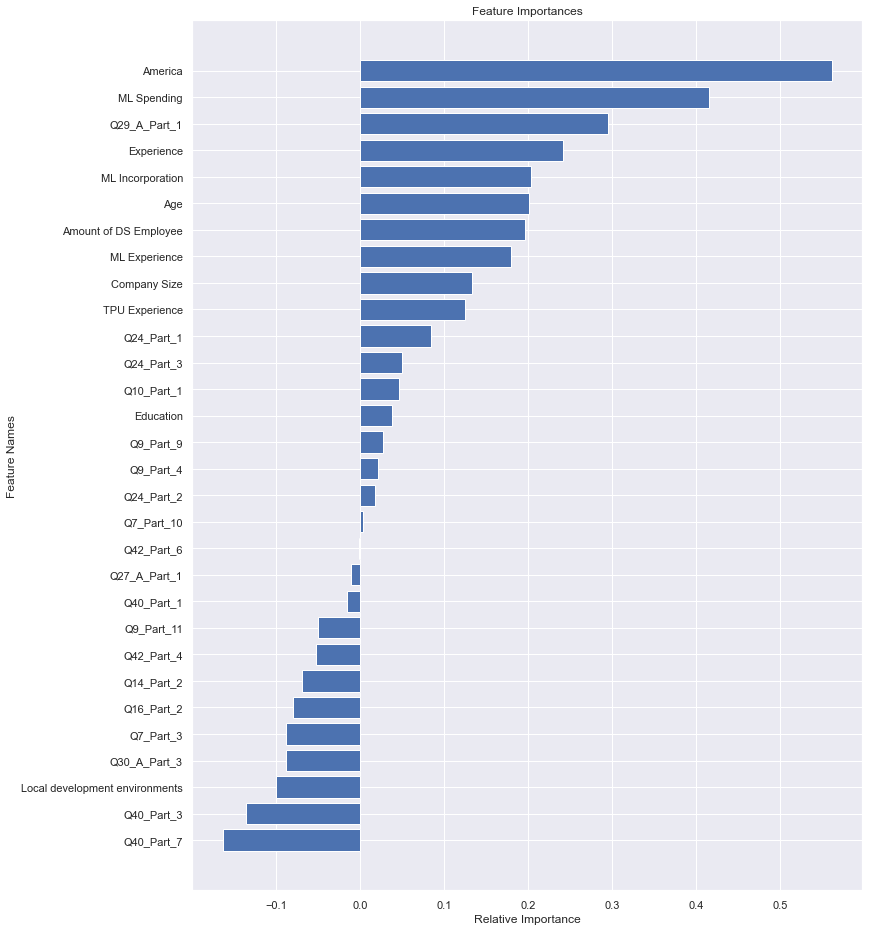

In [206]:
# Plotting the Feature Importance 

Feature_Names_Final =  X.columns.tolist()
# Sorting the feature names in accordance to the importance of the features  
importance_name_sorted = [x for _, x in sorted(zip(Feature_Importance_Array[0],\
                                                   Feature_Names_Final))]
fig,ax = plt.subplots(figsize=(12,16))
plt.barh(importance_name_sorted, np.sort(Feature_Importance_Array[0]))
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')

The features that were most determining in our model predictions are "America", "ML Spending", "Q29_A_Part_1" (refer to the survey list of question for discription), "Experience", "ML Incorporation", "Age", "Amount of DS Employee", ML Experience, "Company size" and so on. For the complete list see the graph above. When comparing the graph above with the feature importance graph found in question 2 of the assignment, we can see that the highest importance features have changed. In question 2, the most important feature was Age, where as here, although Age still has a high importance in our model, the highest importance is the feature "America". Same can be said for other features like ML Spending, company size experience and so on. However, we can see some feature here have a negative importance where they had a positive importance in part 2. An example of this is Q40_Part_7 where in in question 2 has a positive importance, however, here it has a high negative importance. 

### Step 5: Testing & Discussion

In [207]:
# Defining the model to predict on the test data. Not that this model is the same as the model
# in Q#3 with the kfold removed and metric F1 score added. 

def Model_Test(model):
    
    # Test Dataset is as below:
    
    # Getting all the correct features (found in Q#2 for the Train data) for the Test Data 
    Final_Features_Test = DF_test[unique] 
    X_test = Final_Features_Test.drop("Q25_Encoded", axis = 1) # Dropping the Target Variable
    y_test = Final_Features_Test[["Q25_Encoded"]] # y-test is only the Target Variable
    
    # Train Dataset is as below: 
    X_train = Final_Features.drop("Q25_Encoded", axis = 1)
    Y_train = Final_Features[["Q25_Encoded"]]
    
    # Accuracy and F1 lists to house thet scores founded
    Accuracy_List_Train = []
    Accuracy_List_test = []
    F1_List_test = []
    F1_List_Train = []
 
    # Scaling/standarizing the features 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, Y_train)
    
    # Finding the amount of unique target variables 
    Amount_Labels = len(Y["Q25_Encoded"].unique())
    
    # Creating array of zeros for the logistic regression 
    Y_Bucket_0_1 = np.zeros(Y_train.shape)
    
    # Empty array to house the probabilities of the different buckets for the train and test
    Bucket_Probabilities_Test = np.zeros((y_test.shape[0] ,Amount_Labels))
    Bucket_Probabilities_Train = np.zeros((Y_train.shape[0] ,Amount_Labels))
    
    # This array is made and used so we can substract the previous step's probability to obtain 
    # the probability of that respected class at the step 
    Bucket_0_Test = np.zeros(len(y_test))
    Bucket_0_Train = np.zeros(len(Y_train))
    
    for i in range (0, Amount_Labels-1): # Iterations equals length minus 1

        # Creating binary classification buckets for the multiple classification buckets
        Y_Bucket_0_1 = np.where(Y_train<=i, 0, 1)
        
        # Model will be Sklearns binary logistic regression as per prof lecture notes
        model.fit(X_train, Y_Bucket_0_1)
        
        # Finding the probability of the bucket 0 and 1 for the train data
        Binary_Bucket_probability_Train = model.predict_proba(X_train)
        Binary_Bucket_prob_0_Train = Binary_Bucket_probability_Train[:,0]
        
        # For Train data: Probability of the element being in class 1 is 1 - the probability of the element
        # being in class 0, as the sum of the probability of class 1 + class 0 should be 1 
        Binary_Bucket_prob_1_Train = abs(Binary_Bucket_prob_0_Train-1) 
        
        # For Train data: Housing the bucket probability for the different salary buckets
        Bucket_Probabilities_Train [:,i] = Binary_Bucket_prob_0_Train - Bucket_0_Train
        Bucket_0_Train = np.copy(Binary_Bucket_prob_0_Train)
        if i==13: 
            # Finding and storing the probabilirt of the last class 
            Bucket_Probabilities_Train[:,-1] = Binary_Bucket_prob_1_Train
        
        # Finding the probability of the bucket 0 and 1 for the test data
        Binary_Bucket_probability_Test = model.predict_proba(X_test)
        Binary_Bucket_prob_0_Test = Binary_Bucket_probability_Test[:,0]
        
        # For Test data: Probability of the element being in class 1 is 1 - the probability of the element
        # being in class 0, as the sum of the probability of class 1 + class 0 should be 1 
        Binary_Bucket_prob_1_Test = abs(Binary_Bucket_prob_0_Test-1)  
        
        # For Test data: Housing the bucket probability for the different salary buckets 
        Bucket_Probabilities_Test [:,i] = Binary_Bucket_prob_0_Test - Bucket_0_Test
        Bucket_0_Test = np.copy(Binary_Bucket_prob_0_Test)
        if i==13: 
            # Finding and storing the probabilirt of the last class 
            Bucket_Probabilities_Test[:,-1] = Binary_Bucket_prob_1_Test
    
    # Each value in the list will be the average value of all the probabilities for that bucket for the test and train data
    Bucket_Probability_1_Train = []
    Bucket_Probability_1_Test = [] 
        
    # Finding the average probabulity for each bucket for the train and test data
    k = 0 
    while k < Amount_Labels:
        Bucket_Probability_1_Test.append(np.mean(Bucket_Probabilities_Test[:,k], axis = 0))
        k += 1 

    k = 0 
    while k < Amount_Labels:
        Bucket_Probability_1_Train.append(np.mean(Bucket_Probabilities_Train[:,k], axis = 0))
        k += 1 
    
    print ("For Test Data:")
    print ("Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):")
    print("")
    print (Bucket_Probability_1_Test)

    target_pred_Test = []
    # Finding the index of the maximum probability in each row in order to know which
    # bucket (0 to 14) is most likely our prediction for the test data
    for i in range (0, Bucket_Probabilities_Test.shape[0]):
        max_index = Bucket_Probabilities_Test[i,:].tolist().index(max(Bucket_Probabilities_Test[i,:].tolist()))
        target_pred_Test.append (max_index)
    target_pred_Test = np.asarray(target_pred_Test)
    
    target_pred_Train = []
    # Finding the index of the maximum probability in each row in order to know which
    # bucket (0 to 14) is most likely our prediction for the train data
    for i in range (0, Bucket_Probabilities_Train.shape[0]):
        max_index = Bucket_Probabilities_Train[i,:].tolist().index(max(Bucket_Probabilities_Train[i,:].tolist()))
        target_pred_Train .append (max_index)
    target_pred_Train = np.asarray(target_pred_Train)
    
    # Calculating the accuracy for the train dataset 

    Accuracy_Train = accuracy_score(Y_train, target_pred_Train)
    Accuracy_List_Train.append(Accuracy_Train)

    # Calculating the accuracies based on the the founded target_pred for the test set 
    accuracy_test = accuracy_score(y_test, target_pred_Test) 
    Accuracy_List_test.append(accuracy_test)

    # Calculating F1 Score for the train and test set

    F1_Train = f1_score(Y_train, target_pred_Train, average = "weighted")
    F1_List_Train.append(F1_Train)

    F1_test = f1_score(y_test, target_pred_Test, average = "weighted") 
    F1_List_test.append(F1_test)

    print("-------------------------------Trian Data------------------------")
    
    print("Train Accuracy: {0}".format(Accuracy_List_Train[0])) 
    print("")
    print("Train F1 Score: {0}".format(F1_List_Train[0]))

    print("-------------------------------Test Data-------------------------")
    print("Test Accuracy: {0}".format(Accuracy_List_test[0]))
    print("")
    print("Test F1 Score: {0}".format(F1_List_test[0])) 

    # Plotting Train Set 
    
    fig,ax2 = plt.subplots()
    fig.set_figwidth(12)
    fig.set_figheight(6)
    
    # Finding the counts of every target element
    Y_train_values = Y_train['Q25_Encoded'].value_counts()
    # For the X axis data points I sorted the unique elements of the target variable from low
    # to high
    ax2.bar(np.sort(Y_train['Q25_Encoded'].unique())-0.2, Y_train_values ,width = 0.4, color='b', align='center', label='True Target Values')
    
    # Converting the numpy array to a dataframe 
    train_pred_df = pd.DataFrame(target_pred_Train, columns = ['train_pred'])
    # Finding the counts of every target element
    train_pred_df['train_pred'].value_counts()
    # For the X axis data points I sorted the unique elements of the target variable from low
    # to high
    ax2.bar(np.sort(train_pred_df['train_pred'].unique())+0.2, train_pred_df['train_pred'].value_counts(),width=0.4, color='r', align='center', label='Predicted Target Values')
    
    ax2.legend()
    ax2.set_title("Train Set: True Target Values Vs. Predicted Target Values ")
    ax2.set_ylabel('Frequency')
    ax2.set_xlabel('Different Salary Classes')

    # Plotting Test Set
    fig,ax = plt.subplots()
    fig.set_figwidth(12)
    fig.set_figheight(6)
    
    # Finding the counts of every target element
    Y_test_values = y_test['Q25_Encoded'].value_counts()
    # For the X axis data points I sorted the unique elements of the target variable from low
    # to high
    ax.bar(np.sort(y_test['Q25_Encoded'].unique())-0.2, Y_test_values ,width = 0.4, color='b', align='center', label='True Target Values')
    
    # Converting the numpy array to a dataframe 
    target_pred_df = pd.DataFrame(target_pred_Test, columns = ['target_pred'])
    # Finding the counts of every target element
    target_pred_df['target_pred'].value_counts()
    # For the X axis data points I sorted the unique elements of the target variable from low
    # to high
    ax.bar(np.sort(target_pred_df['target_pred'].unique())+0.2, target_pred_df['target_pred'].value_counts(),width=0.4, color='r', align='center', label='Predicted Target Values')

    ax.legend()
    ax.set_title("Test Set: True Target Values Vs. Predicted Target Values ")
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Different Salary Classes')

    plt.show()

For Test Data:
Proability of belonging to each salary buck (Left-most is 0 and incerases by 1 going to the right by 1):

[0.45909442907663245, 0.10034583579912454, 0.06899331382376554, 0.049716853215865824, 0.04387298762053957, 0.04570791991342891, 0.03537183578518099, 0.029148860915789353, 0.02431718273328718, 0.022228583690316744, 0.045154333066131605, 0.023974774234252448, 0.0244025035105425, 0.016310432177170223, 0.011360154437972204]
-------------------------------Trian Data------------------------
Train Accuracy: 0.47132878492527613

Train F1 Score: 0.3371037179531
-------------------------------Test Data-------------------------
Test Accuracy: 0.48327379019162064

Test F1 Score: 0.3476776734476452


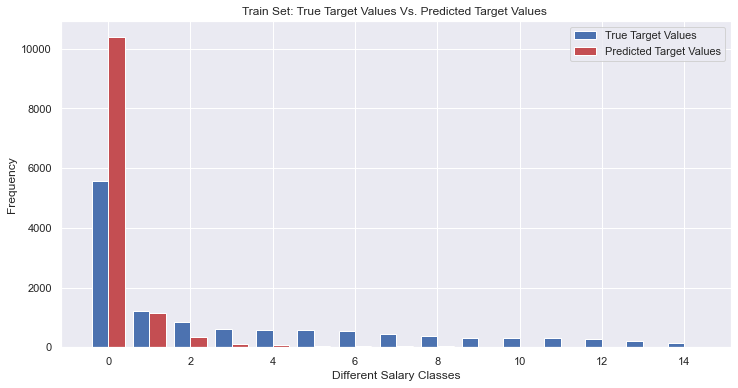

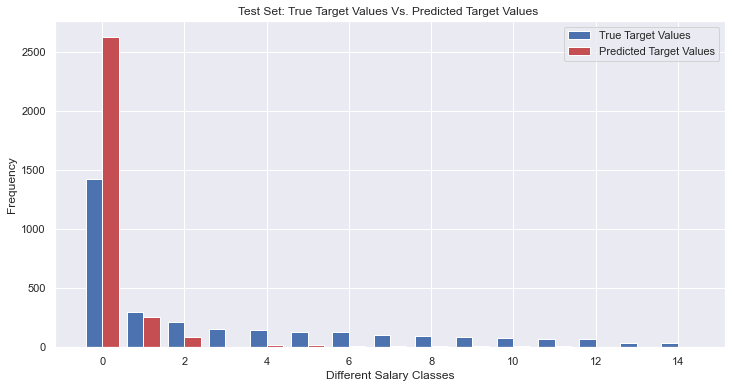

In [208]:
LR_Test_Final = LogisticRegression(C = 100, solver = "newton-cg")
Test_Data_Result = Model_Test(LR_Test_Final)

The two model outputs, training accuracy (47.1%) and test accuracy (48.3%), are approximately equal. Since the performance of both the training and test data are low, this implies that the model configuration cannot capture the complexity of the dataset. In other words, the model is underfitting meaning the model has a high bias and is too simple to learn useful trends in the data.

In addition, the model achieved a low F1 score on both the training and test set. The low F1 had a low precision (returning low result relevancy) and a low recall (returning low truly relevant results). 

A possible solution to increase the overall accuracy and performance of the model is to find more variables that have a high correlation with target but have a low correlation with one another and don’t have similar variances. Another technique to increase accuracy and performance for models with high bias is to do up sampling and/or down sampling. Up sampling is useful because one can oversample the minority class to achieve a balanced dataset with the majority class. The inverse (down sampling) is also useful to downsize the samples of the majority class to achieve a balanced dataset with the minority class. 

The insight I have gained from the dataset and the trained classification model is that most of my target predicted value belongs to class 0; see Figure 8 and 9. This is because of the heavily imbalanced dataset provided by Kaggle as seen in Figure 3. Because of this, the trained model heavily favours the 0 class and ignores the minority class which leads to not predicting classes 1 to 14 to the same degree. 